In [2]:
#Imports necessários

import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.style.use("seaborn-v0_8")
#Estilo

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (17,8)


[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open    Volume
Ticker          ^GSPC      ^GSPC      ^GSPC      ^GSPC     ^GSPC
Date                                                            
1970-01-02  93.000000  93.540001  91.790001  92.059998   8050000
1970-01-05  93.459999  94.250000  92.529999  93.000000  11490000
1970-01-06  92.820000  93.809998  92.129997  93.459999  11460000
1970-01-07  92.629997  93.379997  91.930000  92.820000  10010000
1970-01-08  92.680000  93.470001  91.989998  92.629997  10670000
1970-01-09  92.400002  93.250000  91.820000  92.680000   9380000
1970-01-12  91.699997  92.669998  91.199997  92.400002   8900000
1970-01-13  91.919998  92.610001  90.989998  91.699997   9870000
1970-01-14  91.650002  92.400002  90.879997  91.919998  10380000
1970-01-15  91.680000  92.349998  90.730003  91.650002  11120000
1970-01-16  90.919998  92.489998  90.360001  91.680000  11940000
1970-01-19  89.650002  90.720001  89.139999  90.720001   9500000
1970-01-20  89.830002  90

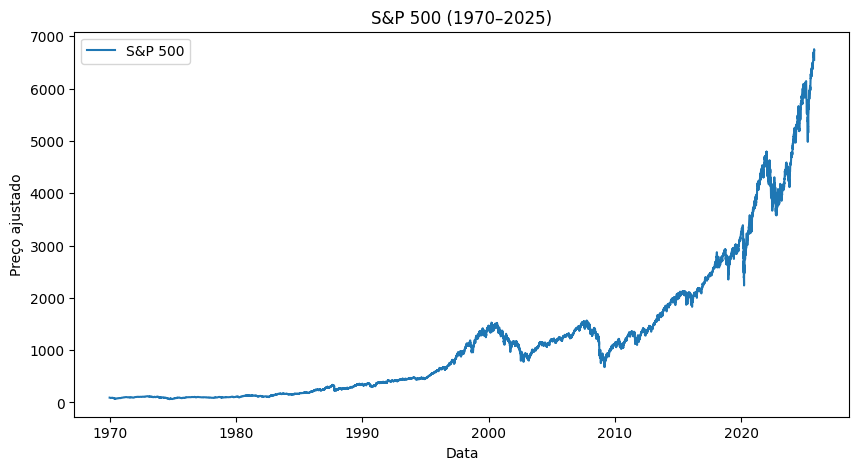

In [17]:
#Importando dados do SP&500 de 1970 até 2025
sp = yf.download("^GSPC", start="1970-01-01", end="2025-10-12", auto_adjust=True)

#Verificando o DataFrame Multiindex
print(sp.head(15))
print(sp.columns)

#Tirando valores inconsistentes
sp = sp["Close"].dropna()

#Plotando o gráfico da série histórica
plt.figure(figsize=(10,5))
plt.plot(sp, label="S&P 500")
plt.title("S&P 500 (1970–2025)")
plt.xlabel("Data")
plt.ylabel("Preço ajustado")
plt.legend()
plt.show()




[*********************100%***********************]  1 of 1 completed

Ticker           ^GSPC
Date                  
1990-01-02  359.690002
1990-01-03  358.760010
1990-01-04  355.670013
1990-01-05  352.200012
1990-01-08  353.790009
1990-01-09  349.619995
1990-01-10  347.309998
1990-01-11  348.529999
1990-01-12  339.929993
1990-01-15  337.000000
1990-01-16  340.750000
1990-01-17  337.399994
1990-01-18  338.190002
1990-01-19  339.149994
1990-01-22  330.380005
Index(['^GSPC'], dtype='object', name='Ticker')


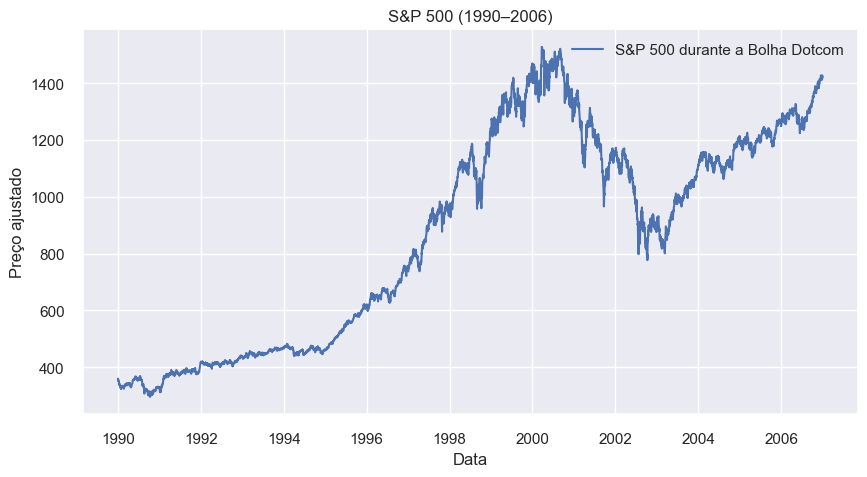

In [4]:
#Importando os dados do periodo de 1990 até 2006, a literatura economica indica que a bolha começou em meados dos anos 90 e foi até 2004
#Assim, pegamos esses dados para verificar o movimento que as pessoas viram na época.
sp = yf.download("^GSPC", start="1990-01-01", end="2006-12-31", auto_adjust=True)

#Retirando dados inconsistentes.
sp = sp["Close"].dropna()
print(sp.head(15))
print(sp.columns)


#Plotando a série.
plt.figure(figsize=(10,5))
plt.plot(sp, label="S&P 500 durante a Bolha Dotcom")
plt.title("S&P 500 (1990–2006)")
plt.xlabel("Data")
plt.ylabel("Preço ajustado")
plt.legend()
plt.show()

Baixando: XLF
Baixando: XLE
Baixando: XLV
Baixando: XLY
Baixando: XLK


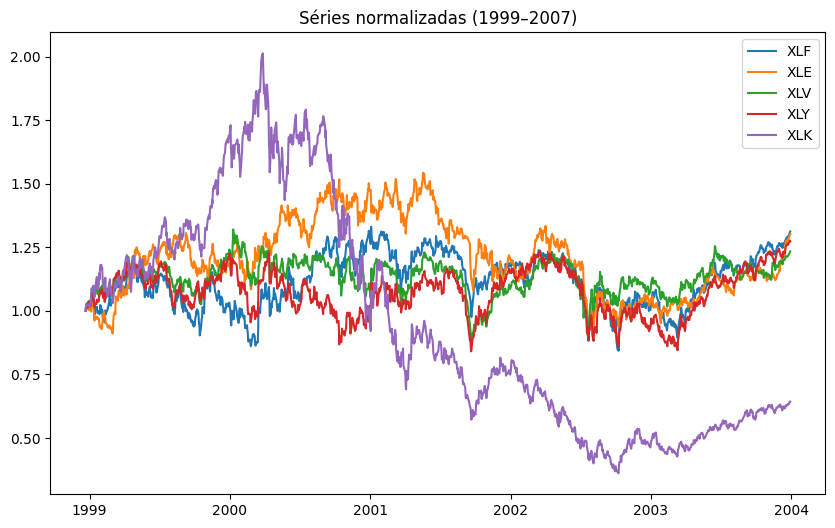

In [2]:
#Importando novamente(o Kernel tinha caido)
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Para uma primeira mostragem da relação gráfica de contágio, era mais correto utilizar os Indices Setorias e não apenas, as empresas dos setores como Proxys
#Para calcular as covariancias e as correlações, ai sim, utilizaremos as empresas.
tickers = ["XLF", "XLE", "XLV",'XLY','XLK']
start = "1990-01-01"
end = "2003-12-31"
#XLF=Setor Financeiro
#XLE=Energia
#XLV=Saúde
#XLY=Consumo(discricionário)
#XLK=Tecnologia(emgloba CISCO e as outras empresas da época, como EBAY, QCOM e outras , que também participaram da euforia,
#Infelizmente, essas empresas não tinham capital na bolsa até 1998 e 1999, se eu ajusta-se o periodo de tempo, perderia a clareza na evolução bolha,
#e o argumento de que bolhas não se formam do dia pra noite, mas sim uma crença viril da capacidade de fluxo de caixa da empresa, muitas vezes de forma iracional.

#Criando o DataFrame com os Indices
prices = pd.DataFrame()
#Função que para cada indice baixa a sua serie historica do periodo.
for t in tickers:
    print("Baixando:", t)
    df = yf.download(t, start=start, end=end, auto_adjust=True, progress=False)

    # pega só a coluna Close
    close = df["Close"]

    # adiciona ao dataframe final
    prices[t] = close

# limpeza mínima(chatooooo)
prices = prices.ffill().dropna(how="all")

# gráfico normalizado
normalized = prices / prices.iloc[0]
#Plotando o gráfico
plt.figure(figsize=(10,6))
plt.plot(normalized)
plt.title("Séries normalizadas (1999–2007)")
plt.legend(normalized.columns)
plt.show()


Baixando: XLF
Baixando: XLE
Baixando: XLV
Baixando: XLY
Baixando: XLK


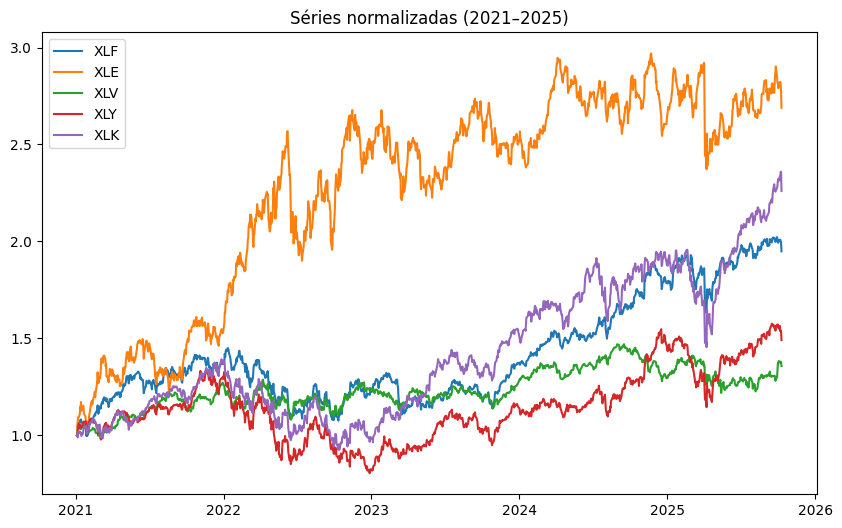

In [1]:
#Importando novamente essa m****
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Escolhendo os mesmos indices setorias de antes, mas ajustando para a nossa suposta bolha da IA
#Queremos verificar se encontramos um movimento parecido.
#Ajustei para 2021, por que a bolha só faz sentido pós lançamento do ChatGPT em 2022
tickers = ["XLF", "XLE", "XLV",'XLY','XLK']
start = "2021-01-01"
end = "2025-10-12"

#Criando o datafram
prices = pd.DataFrame()

#Para cada indice baixando sua serie historica
for t in tickers:
    print("Baixando:", t)
    df = yf.download(t, start=start, end=end, auto_adjust=True, progress=False)

    # pega só a coluna Close
    close = df["Close"]

    # adiciona ao dataframe final
    prices[t] = close

# limpeza mínima
prices = prices.ffill().dropna(how="all")

# gráfico normalizado
normalized = prices / prices.iloc[0]

#Plotando
plt.figure(figsize=(10,6))
plt.plot(normalized)
plt.title("Séries normalizadas (2021–2025)")
plt.legend(normalized.columns)
plt.show()

#Viu que legal? não teve o mesmo grafico que esperavamos, um XLK esticadasso igual em 2000, mas é possivel ver um
#descolamento se formando...
#Por que caralhos XLE explodiu tanto? Petroleo? Vou investigar...


Baixando: CSCO
Baixando: MSFT
Baixando: ORCL


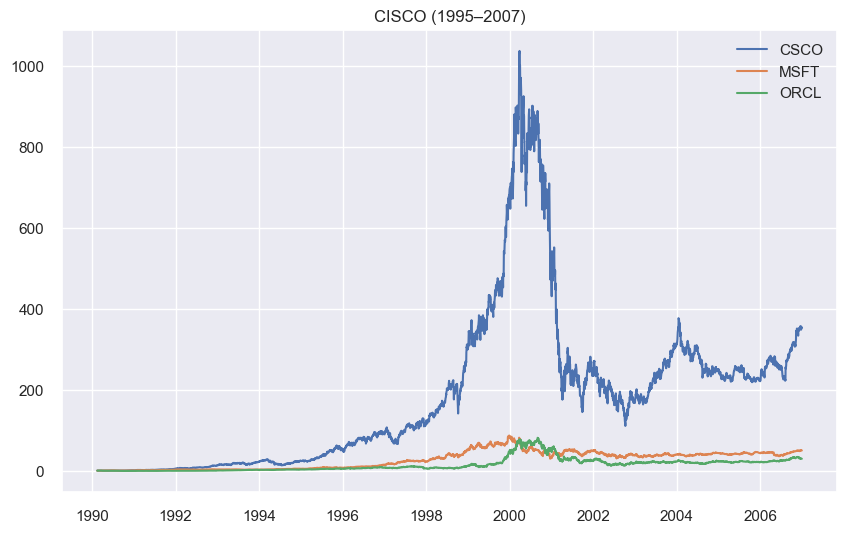

In [7]:
#Importando
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Agora vamos para as empresas, CSCO, MSFT e OCRL, as outras QCOM, EBAY não tinham as series em 1990, uma pena, 
#mas já da pra ver um resultado legal
tickers = ["CSCO",'MSFT','ORCL']
start = "1990-01-01"
end = "2006-12-31"

#Criando dataframe
prices = pd.DataFrame()

#Para cada empresa, baixando seus preços historicos ajustados
for t in tickers:
    print("Baixando:", t)
    df = yf.download(t, start=start, end=end, auto_adjust=True, progress=False)

    # pega só a coluna Close
    close = df["Close"]

    # adiciona ao dataframe final
    prices[t] = close

# limpeza mínima
prices = prices.ffill().dropna(how="all")

# gráfico normalizado
normalized = prices / prices.iloc[0]

#Plotando grafico
plt.figure(figsize=(10,6))
plt.plot(normalized)
plt.title("CISCO (1995–2007)")
plt.legend(normalized.columns)
plt.show()


Baixando: NVDA
Baixando: AAPL
Baixando: MSFT
Baixando: ORCL
Baixando: PLTR
Baixando: IBM
Baixando: AVGO


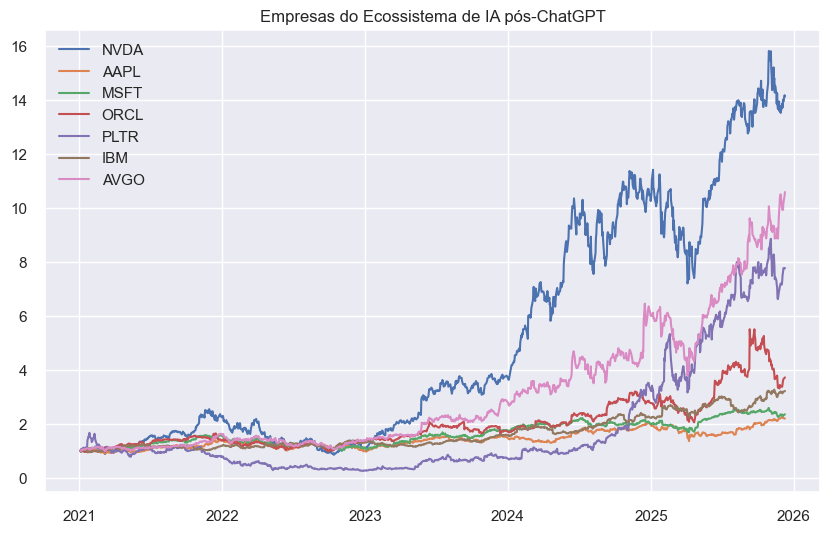

In [8]:
#Importando de novo
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Mesma coisa, porém selecionei algumas empresas diferentes que fazem parte do ecossistema da IA
#Isso facilita ver que é um movimento conjunto de um novo subsetor dentro do setor de tecnologia, o que dificulta a analise de bolha
#Afinal, os lucros dessas empresas juntas é colossal, em 2024, a NVIDIA teve lucro liquido de U$60Bilhões com crescimento de 126% em relação a 2023.
#Ai a gnt se pergunta, será que elas não valem de fato aquilo que estão sendo negociadas?
tickers = ["NVDA",'AAPL','MSFT','ORCL','PLTR','IBM','AVGO']
start = "2021-01-01"
end = "2025-12-10"

#criando dataframe
prices = pd.DataFrame()
#Para cada empresa, baixando seus preços historicos ajustados
for t in tickers:
    print("Baixando:", t)
    df = yf.download(t, start=start, end=end, auto_adjust=True, progress=False)

    # pega só a coluna Close
    close = df["Close"]

    # adiciona ao dataframe final
    prices[t] = close

# limpeza mínima
prices = prices.ffill().dropna(how="all")

# gráfico normalizado
normalized = prices / prices.iloc[0]
#Plotando o grafico
plt.figure(figsize=(10,6))
plt.plot(normalized)
plt.title("Empresas do Ecossistema de IA pós-ChatGPT")
plt.legend(normalized.columns)
plt.show()


Tipo csco: <class 'pandas.core.series.Series'>
csco head:
Date
1995-01-03    1.233265
1995-01-04    1.242301
1995-01-05    1.233265
1995-01-06    1.233265
1995-01-09    1.260370
Name: (Close, CSCO), dtype: float64

Tipo market: <class 'pandas.core.series.Series'>
market head:
Date
1995-01-03    459.109985
1995-01-04    460.709991
1995-01-05    460.339996
1995-01-06    460.679993
1995-01-09    460.829987
Name: (Close, ^GSPC), dtype: float64

Pico (csco idxmax): 2000-03-27 00:00:00 -> 2000-03-27

Retorno acumulado CSCO desde 1995-01-03 até 2000-03-27: 4123.08%
Retorno acumulado ^GSPC desde 1995-01-03 até 2000-03-27: 231.92%


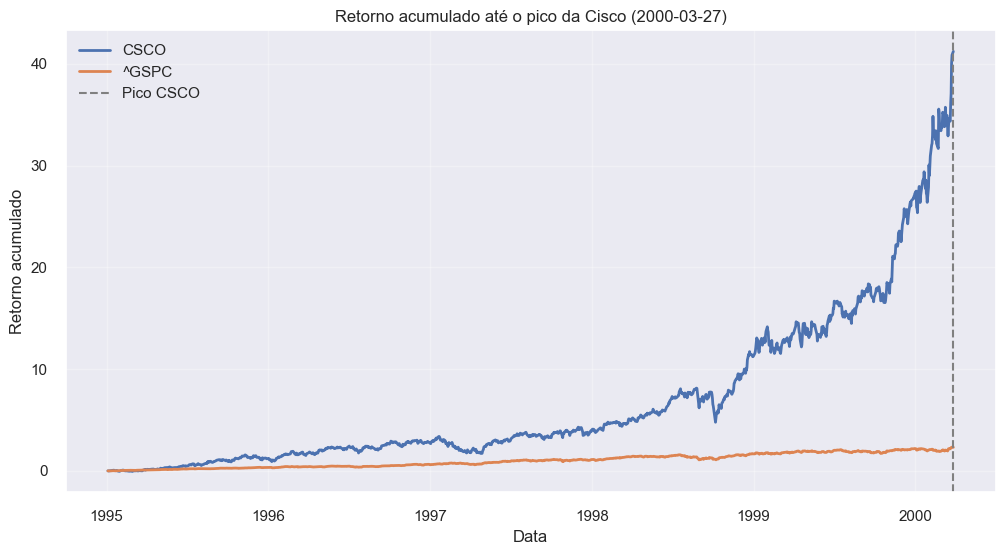

In [9]:
#Aqui começa a parte mais chata, calculo do retorno acumulado até o topo da bolha dotcom.
# Este código baixa os dados, garante o formato correto, encontra a data do pico,
# alinha a data do mercado e calcula o retorno acumulado até essa data.
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Função que sempre retorna uma Series com preços de fechamento.
# Isso é para evitar erros posteriores (como idxmax retornar Series, colunas faltando e tals).

def get_close_series(ticker, start, end):
    """
    Baixa preços e retorna UMA pandas.Series com preços de fechamento ajustados (ou close).
    Funciona para DataFrame simples, MultiIndex e Series.
    """
    df = yf.download(ticker, start=start, end=end, auto_adjust=True, progress=False)
    
    # Verifica se os dados vieram vazios — evita trabalhar com objetos inválidos
    if df is None or (isinstance(df, (pd.DataFrame, pd.Series)) and df.empty):
        raise ValueError(f"Sem dados para {ticker} no período {start} - {end}")

    # Caso 1 — df é Series (raro), já está no formato desejado.
    if isinstance(df, pd.Series):
        s = df.dropna()
        # se for uma série com índice de colunas (improvável) retorna direto
        return s

    # Caso 2 — df é DataFrame (o normal).
    # Esse bloco lida com DataFrames simples e MultiIndex.
    if isinstance(df, pd.DataFrame):
        # 1) MultiIndex (colunas tuple):  Caso 2 — df é DataFrame (o normal).
        # Devemos localizar a subcoluna 'Close' ou 'Adj Close'.
        if isinstance(df.columns, pd.MultiIndex):
            # normalizar níveis para checar
            matches = [col for col in df.columns if len(col) > 1 and str(col[1]).strip().lower() in ("close", "adj close", "adjclose")]
            if matches:
                s = df[matches[0]]
                # se por algum CARALHO de motivo ainda for DataFrame, pega a primeira coluna
                if isinstance(s, pd.DataFrame):
                    s = s.iloc[:, 0]
                return s.dropna()
            # Procuramos qualquer coluna cujo segundo nível seja 'Close'
            for col in df.columns:
                if str(col[1]).strip().lower() in ("close", "adj close", "adjclose"):
                    s = df[col]
                    if isinstance(s, pd.DataFrame):
                        s = s.iloc[:,0]
                    return s.dropna()
             # Último fallback: pega a primeira subcoluna disponível
            first_col = df.columns[0]
            s = df[first_col]
            if isinstance(s, pd.DataFrame):
                s = s.iloc[:, 0]
            return s.dropna()

        # 2) DataFrame normal (colunas planas)
        # Procuramos 'Close', depois 'Adj Close'. Senão usamos a primeira coluna.
        if "Close" in df.columns:
            return df["Close"].dropna()
        if "Adj Close" in df.columns:
            return df["Adj Close"].dropna()
        # fallback: primeira coluna
        return df.iloc[:, 0].dropna()

    # se chegou aqui, tentar converter pra Series(que inferno)
    return pd.Series(df).dropna()


#Parâmetros
#Vamo calcular o retorno da SP500 e da CSCO no periodo e ver o quão descolado, estava os retornos.
ticker_stock = "CSCO"
ticker_market = "^GSPC"
start = "1995-01-01"
end = "2006-12-31"

# Baixar séries que criamos pela função
csco = get_close_series(ticker_stock, start, end)
market = get_close_series(ticker_market, start, end)

# diagnóstico curto (pra ver se não deu merda na função de transformar dataframe em series)
print("Tipo csco:", type(csco))
print("csco head:")
print(csco.head())
print("\nTipo market:", type(market))
print("market head:")
print(market.head())

# Encontrar pico da Cisco (máxima) 
peak_date = csco.idxmax()
# garantir Timestamp scalar
peak_date = pd.to_datetime(peak_date)
print("\nPico (csco idxmax):", peak_date, "->", peak_date.date())

# Ajustar data do mercado (pregão anterior igual), apenas para verificar se está tudo certo com as datas do pregão no dia da máxima 
if peak_date in market.index:
    market_date = peak_date
else:
    pos = market.index.get_indexer([peak_date], method='ffill')[0]
    if pos == -1:
        # usar primeira data disponível no market
        market_date = market.index[0]
        print("Aviso: mercado não tem pregão anterior ao pico; usando primeira data do mercado:", market_date.date())
    else:
        market_date = market.index[pos]
        if market_date != peak_date:
            print("Mercado não tinha pregão exatamente no pico; usando pregão anterior:", market_date.date())

#  Calcular retorno acumulado (desde primeiro preço disponível de cada série)
cisco_start = csco.iloc[0]
market_start = market.iloc[0]

# Preços no pico
cisco_price_at_peak = csco.loc[peak_date]     
market_price_at_peak = market.loc[market_date]

# Fórmula: retorno = (preço_final / preço_inicial) - 1
cisco_ret = (cisco_price_at_peak / cisco_start) - 1
market_ret = (market_price_at_peak / market_start) - 1

print(f"\nRetorno acumulado CSCO desde {csco.index[0].date()} até {peak_date.date()}: {cisco_ret:.2%}")
print(f"Retorno acumulado {ticker_market} desde {market.index[0].date()} até {market_date.date()}: {market_ret:.2%}")

#Plot retorno acumulado até o pico 

# Calculamos retornos diários (pct_change)
returns_csco = csco.pct_change().dropna()
returns_market = market.pct_change().dropna()


# Convertendo para retorno acumulado: (1+r).cumprod() - 1
cum_csco = (1 + returns_csco).cumprod() - 1
cum_market = (1 + returns_market).cumprod() - 1

# Só plotamos até o menor limite entre as séries
end_plot = min(peak_date, market_date)

# Gráfico
plt.figure(figsize=(12,6))
plt.plot(cum_csco.loc[:end_plot].index, cum_csco.loc[:end_plot].values, label="CSCO", linewidth=2)
plt.plot(cum_market.loc[:end_plot].index, cum_market.loc[:end_plot].values, label=ticker_market, linewidth=2)
# Linha vertical no pico da Cisco
plt.axvline(peak_date, color='grey', linestyle='--', label='Pico CSCO')
plt.title(f"Retorno acumulado até o pico da Cisco ({peak_date.date()})")
plt.ylabel("Retorno acumulado")
plt.xlabel("Data")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


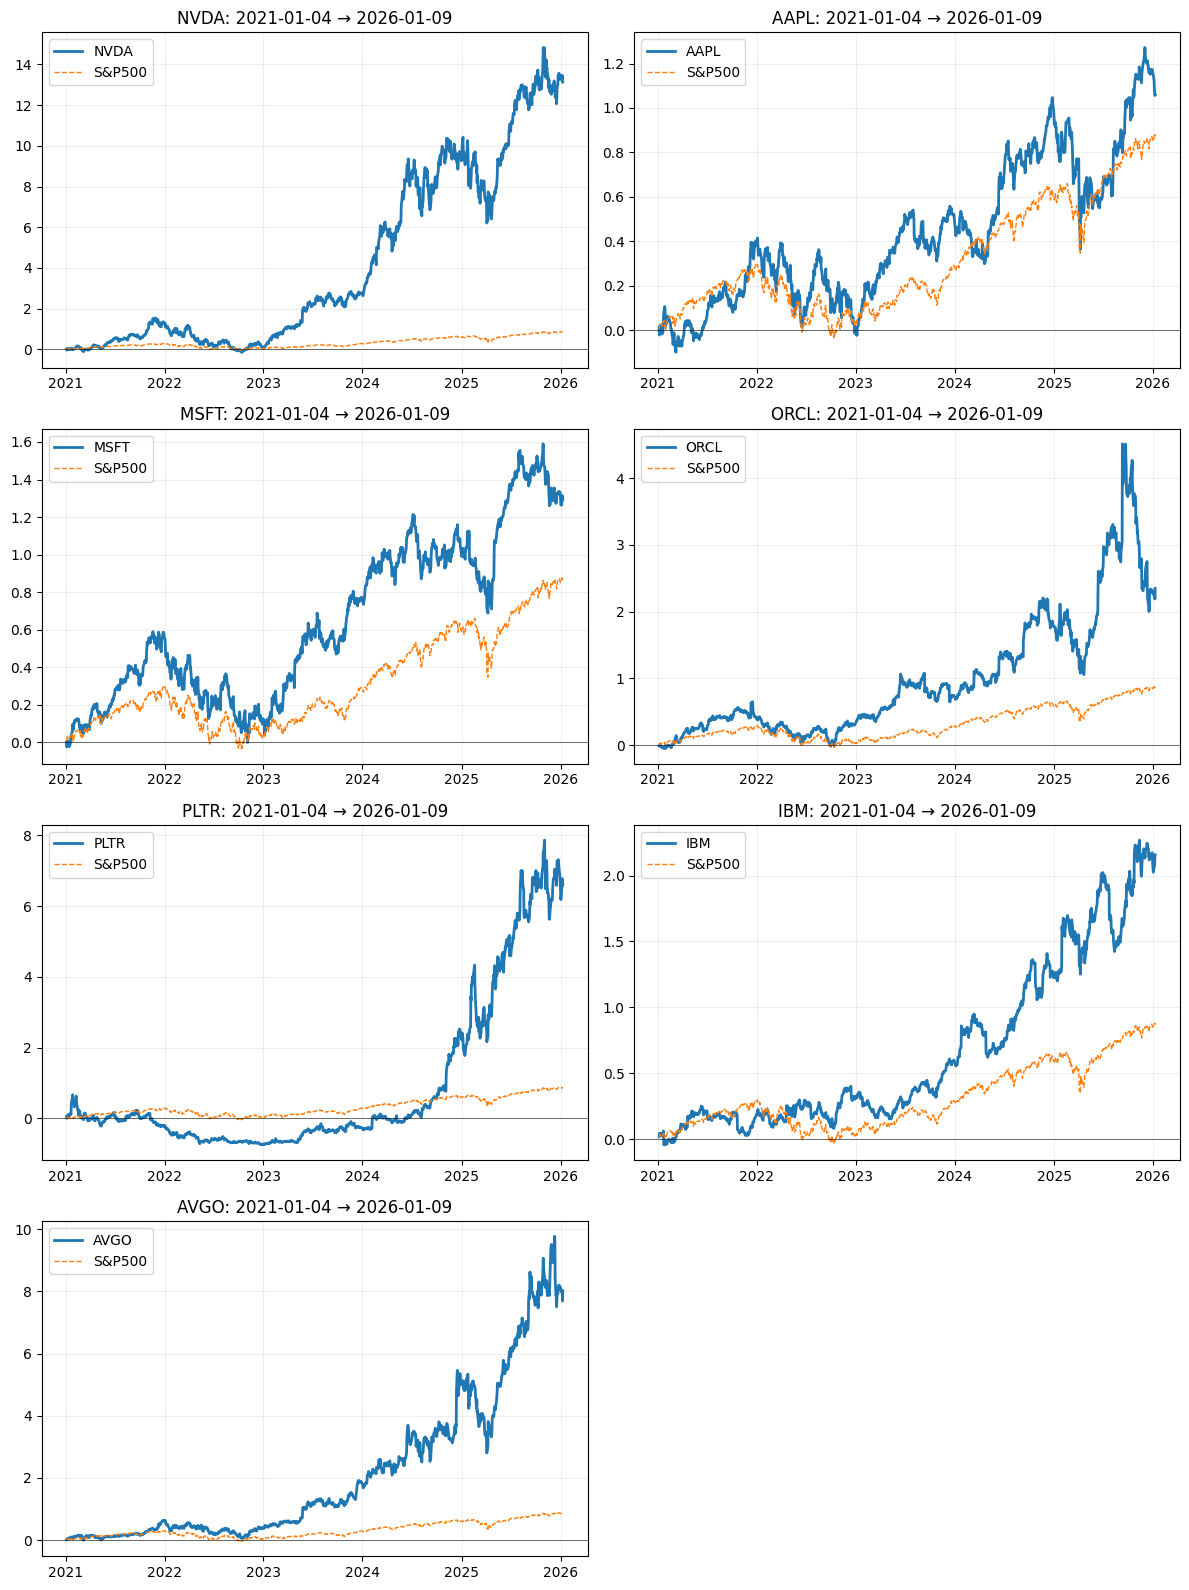

Ticker Stock_start   Stock_end Stock_return_% Market_start_for_stock  \
0   NVDA  2021-01-04  2026-01-09       1313.66%             2021-01-04   
1   AAPL  2021-01-04  2026-01-09        105.89%             2021-01-04   
2   MSFT  2021-01-04  2026-01-09        129.45%             2021-01-04   
3   ORCL  2021-01-04  2026-01-09        234.74%             2021-01-04   
4   PLTR  2021-01-04  2026-01-09        659.48%             2021-01-04   
5    IBM  2021-01-04  2026-01-09        215.79%             2021-01-04   
6   AVGO  2021-01-04  2026-01-09        801.81%             2021-01-04   

  Market_end_for_stock Market_return_%  
0           2026-01-09          88.24%  
1           2026-01-09          88.24%  
2           2026-01-09          88.24%  
3           2026-01-09          88.24%  
4           2026-01-09          88.24%  
5           2026-01-09          88.24%  
6           2026-01-09          88.24%

In [28]:
#retorno acumulado das empresas do "boom de IA" vs S&P500
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import math

# função para sempre retornar uma pandas.Series, é a mesma função de antes, sem estresse.
def get_close_series(ticker, start, end):
    df = yf.download(ticker, start=start, end=end, auto_adjust=True, progress=False)
    if df is None or (hasattr(df, "empty") and df.empty):
        raise ValueError(f"Sem dados para {ticker} no período {start} - {end}")
    if isinstance(df, pd.Series):
        return df.dropna()
    if isinstance(df, pd.DataFrame):
        # MultiIndex: procurar subcoluna Close/Adj Close
        if isinstance(df.columns, pd.MultiIndex):
            matches = [col for col in df.columns if len(col) > 1 and str(col[1]).strip().lower() in ("close", "adj close", "adjclose")]
            if matches:
                s = df[matches[0]]
                if isinstance(s, pd.DataFrame):
                    s = s.iloc[:,0]
                return s.dropna()
            # fallback: primeira subcoluna
            s = df[df.columns[0]]
            if isinstance(s, pd.DataFrame):
                s = s.iloc[:,0]
            return s.dropna()
        # DataFrame simples
        if "Close" in df.columns:
            return df["Close"].dropna()
        if "Adj Close" in df.columns:
            return df["Adj Close"].dropna()
        # fallback: primeira coluna
        return df.iloc[:,0].dropna()
    # fallback final
    return pd.Series(df).dropna()

# parâmetros
tickers = ["NVDA","AAPL","MSFT","ORCL","PLTR","IBM","AVGO"]
market_ticker = "^GSPC"
start = "2021-01-01"   
end = None             # None = até a última data disponível(curiosamente, HOJE)

# baixar série do mercado(SP&500) usando a função demoniaca, no caso vai funcionar como Benchmark
market = get_close_series(market_ticker, start, end)

results = []

# preparar figura de subplots (n linhas conforme número de tickers, que no caso são 7)
n = len(tickers)
cols = 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows), squeeze=False)
axes_flat = axes.flatten()

#Loop Principal: para cada ticker
for i, t in enumerate(tickers):
    ax = axes_flat[i]  # eixo correspondente ao subplot
    try:
        #Baixando a série da ação (sempre retorna Series)
        s = get_close_series(t, start, end)
    except Exception as e:
        # Se ocorrer erro no download, imprimir o aviso
        print(f"Erro ao baixar {t}: {e}")
        continue

    # intervalo da empresa
    s_start = s.index[0]
    s_end = s.index[-1]

    # localizar preços do mercado para o mesmo intervalo (usar pregões anteriores se necessário)
    # posição inicial do mercado (<= s_start)
    pos_start = market.index.get_indexer([s_start], method='ffill')[0]
    if pos_start == -1:
        # se não existir pregão anterior, usar o primeiro do market
        pos_start = 0
    market_start_date = market.index[pos_start]

    # posição final do mercado (<= s_end)
    pos_end = market.index.get_indexer([s_end], method='ffill')[0]
    if pos_end == -1:
        pos_end = len(market) - 1
    market_end_date = market.index[pos_end]

    #Preços iniciais e finais para cálculo do retorno acumulado
    stock_start_price = s.iloc[0]
    stock_end_price = s.iloc[-1]
    market_start_price = market.iloc[pos_start]
    market_end_price = market.iloc[pos_end]

    #Cálculo do retorno acumulado simples: (P_end / P_start) - 1
    stock_ret = (stock_end_price / stock_start_price) - 1
    market_ret = (market_end_price / market_start_price) - 1


     #Armazenar os resultados numa tabela final
    results.append({
        "Ticker": t,
        "Stock_start": s_start.date(),
        "Stock_end": s_end.date(),
        "Stock_return": stock_ret,
        "Market_start_for_stock": market_start_date.date(),
        "Market_end_for_stock": market_end_date.date(),
        "Market_return_on_same_period": market_ret
    })

    # construir séries de retorno acumulado alinhadas para plot
    stock_cum = (1 + s.pct_change().dropna()).cumprod() - 1
    # Alinhar o benchmark para as mesmas datas da ação usando reindex + ffill
    market_for_plot = market.reindex(s.index, method='ffill')
    market_cum_for_plot = (1 + market_for_plot.pct_change().dropna()).cumprod() - 1

    # Plotar no subplot: ação (linha sólida) vs S&P500 (linha tracejada)
    ax.plot(stock_cum.index, stock_cum.values, label=t, linewidth=2)
    ax.plot(market_cum_for_plot.index, market_cum_for_plot.values, label="S&P500", linewidth=1, linestyle='--')
    ax.set_title(f"{t}: {s_start.date()} → {s_end.date()}")
    ax.axhline(0, color='k', linewidth=0.4)
    ax.legend()
    ax.grid(alpha=0.2)

# Se houver subplots sobrando (quando n não é par), esconder os ax vazios
for j in range(i+1, len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.tight_layout()
plt.show()

#tabela resumida
res_df = pd.DataFrame(results)
# formatar percentuais
res_df["Stock_return_%"] = (res_df["Stock_return"] * 100).map(lambda x: f"{x:.2f}%")
res_df["Market_return_%"] = (res_df["Market_return_on_same_period"] * 100).map(lambda x: f"{x:.2f}%")
display(res_df[["Ticker","Stock_start","Stock_end","Stock_return_%","Market_start_for_stock","Market_end_for_stock","Market_return_%"]])


In [6]:
pip install tqdm

     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.7 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 57.7/57.7 kB 752.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\guilh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Baixando dados... isso pode levar alguns segundos.


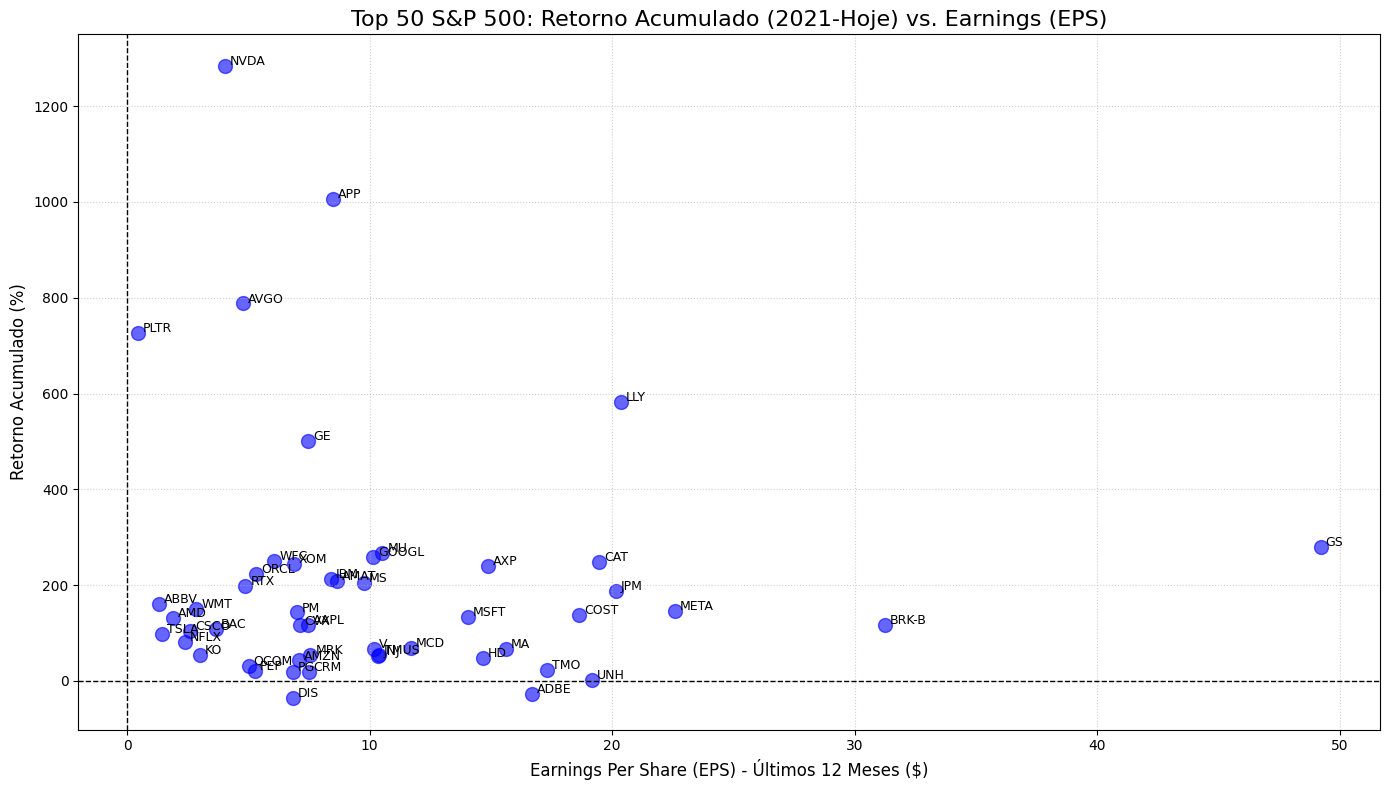

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1. Lista dos Top 50 Tickers (Baseada no SP500 atual)
tickers = [
    "NVDA", "AAPL", "MSFT", "AMZN", "GOOGL", "AVGO", "META", "TSLA", "BRK-B", "WMT",
    "LLY", "JPM", "V", "ORCL", "MA", "JNJ", "XOM", "PLTR", "NFLX", "BAC",
    "ABBV", "COST", "AMD", "HD", "PG", "CSCO", "UNH", "GE", "CVX", "KO",
    "CAT", "MU", "WFC", "IBM", "MS", "GS", "AXP", "MRK", "CRM", "APP",
    "RTX", "PM", "MCD", "TMUS", "TMO", "AMAT", "QCOM", "DIS", "PEP", "ADBE"
]

# Nota: O Yahoo Finance usa 'BRK-B' em vez de 'BRK.B'

data_list = []

print("Baixando dados... isso pode levar alguns segundos.")

# 2. Coleta de Dados
for ticker in tickers:
    try:
        # Instancia o objeto Ticker
        stock = yf.Ticker(ticker)
        
        # A) Calcular Retorno Acumulado desde 2021
        # Baixa histórico diário
        hist = stock.history(start="2021-01-01")
        
        if hist.empty:
            print(f"Dados não encontrados para {ticker}")
            continue
            
        price_start = hist['Close'].iloc[0] # Preço no primeiro dia de 2021
        price_end = hist['Close'].iloc[-1]  # Preço mais recente
        
        # Cálculo da variação percentual
        accumulated_return = ((price_end - price_start) / price_start) * 100
        
        # B) Obter Earnings (Lucro por Ação - TTM)
        # Tenta pegar o 'trailingEps' (EPS dos últimos 12 meses)
        eps = stock.info.get('trailingEps')
        
    
         #EPS é mais legível em escala.
        
        if eps is not None:
            data_list.append({
                'Ticker': ticker,
                'Returns_Pct': accumulated_return,
                'EPS': eps
            })
            
    except Exception as e:
        print(f"Erro ao processar {ticker}: {e}")

# Cria DataFrame
df = pd.DataFrame(data_list)

# 3. Criação do Scatterplot
plt.figure(figsize=(14, 8))

# Plota os pontos
plt.scatter(df['EPS'], df['Returns_Pct'], color='blue', alpha=0.6, s=100)

# Linhas de referência (Eixo 0)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(0, color='black', linewidth=1, linestyle='--')

# 4. Anotação (Colocar o nome dos tickers nos pontos)
# Usamos um loop para escrever o texto ao lado de cada ponto
for i, row in df.iterrows():
    plt.text(row['EPS'] + 0.2, row['Returns_Pct'] + 2, row['Ticker'], fontsize=9)

# Títulos e Labels
plt.title('Top 50 S&P 500: Retorno Acumulado (2021-Hoje) vs. Earnings (EPS)', fontsize=16)
plt.xlabel('Earnings Per Share (EPS) - Últimos 12 Meses ($)', fontsize=12)
plt.ylabel('Retorno Acumulado (%)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)

# Ajuste para evitar cortes
plt.tight_layout()

# Exibir
plt.show()

Baixando dados das 50 empresas... aguarde um momento.


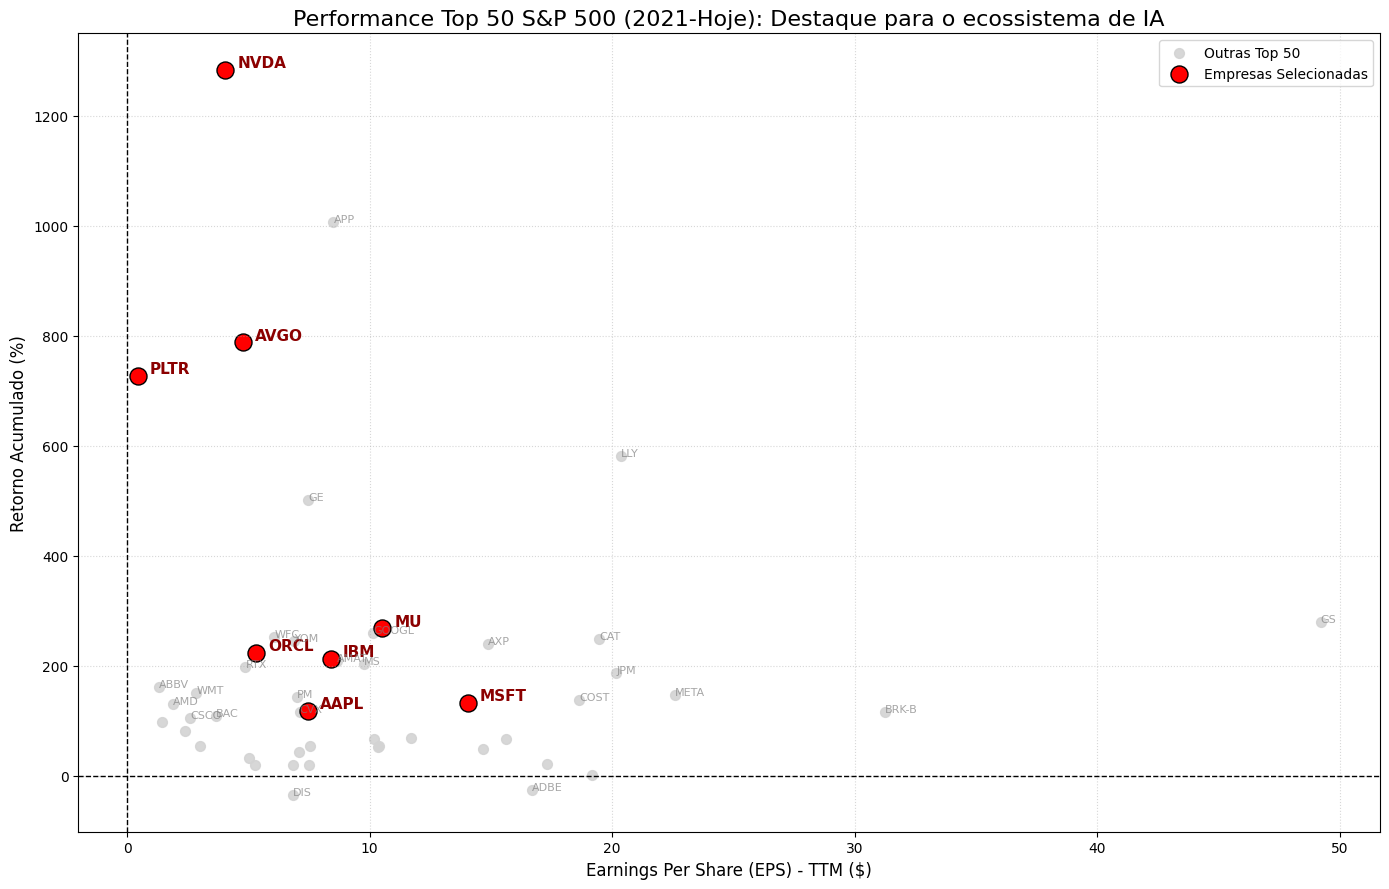

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1. Definição das Listas
# Lista completa das Top 50 (Contexto)
all_tickers = [
    "NVDA", "AAPL", "MSFT", "AMZN", "GOOGL", "AVGO", "META", "TSLA", "BRK-B", "WMT",
    "LLY", "JPM", "V", "ORCL", "MA", "JNJ", "XOM", "PLTR", "NFLX", "BAC",
    "ABBV", "COST", "AMD", "HD", "PG", "CSCO", "UNH", "GE", "CVX", "KO",
    "CAT", "MU", "WFC", "IBM", "MS", "GS", "AXP", "MRK", "CRM", "APP",
    "RTX", "PM", "MCD", "TMUS", "TMO", "AMAT", "QCOM", "DIS", "PEP", "ADBE"
]

# Lista de Destaque 
highlight_tickers = ["NVDA", "AAPL", "MSFT", "ORCL", "PLTR", "IBM", "AVGO",'MU']

data_list = []

print("Baixando dados das 50 empresas... aguarde um momento.")

# 2. Coleta de Dados
for ticker in all_tickers:
    try:
        stock = yf.Ticker(ticker)
        
        # Histórico desde 2021
        hist = stock.history(start="2021-01-01")
        
        if hist.empty:
            continue
            
        price_start = hist['Close'].iloc[0]
        price_end = hist['Close'].iloc[-1]
        accumulated_return = ((price_end - price_start) / price_start) * 100
        
        # EPS (Earnings Per Share)
        eps = stock.info.get('trailingEps')
        
        if eps is not None:
            # Identifica se é destaque ou não para facilitar a plotagem depois
            is_highlight = ticker in highlight_tickers
            
            data_list.append({
                'Ticker': ticker,
                'Returns_Pct': accumulated_return,
                'EPS': eps,
                'Type': 'Destaque' if is_highlight else 'Normal'
            })
            
    except Exception as e:
        print(f"Erro em {ticker}: {e}")

df = pd.DataFrame(data_list)

# 3. Configuração do Gráfico
plt.figure(figsize=(14, 9))

# Separar os dados em dois dataframes
df_normal = df[df['Type'] == 'Normal']
df_highlight = df[df['Type'] == 'Destaque']

# A) Plotar o grupo "Normal" (Fundo cinza, discreto)
plt.scatter(df_normal['EPS'], df_normal['Returns_Pct'], 
            color='lightgray', s=50, alpha=0.9, label='Outras Top 50')

# B) Plotar o grupo "Destaque" (Cor viva, maior destaque)
plt.scatter(df_highlight['EPS'], df_highlight['Returns_Pct'], 
            color='red', s=150, edgecolors='black', label='Empresas Selecionadas')

# 4. Adicionar Rótulos (Texto)
# Rótulos para os Destaques (Negrito e visível)
for i, row in df_highlight.iterrows():
    plt.text(row['EPS'] + 0.5, row['Returns_Pct'] + 5, row['Ticker'], 
             fontsize=11, fontweight='bold', color='darkred')

# (Opcional) Rótulos para as normais - apenas se quiser poluir menos, pode comentar isso
for i, row in df_normal.iterrows():
    # Só coloca nome nas normais se o retorno for muito alto para não sobrepor tudo
    if row['Returns_Pct'] > 100 or row['Returns_Pct'] < -20: 
        plt.text(row['EPS'], row['Returns_Pct'], row['Ticker'], 
                 fontsize=8, color='gray', alpha=0.7)

# Linhas de eixo zero
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(0, color='black', linewidth=1, linestyle='--')

# Cosmética final
plt.title('Performance Top 50 S&P 500 (2021-Hoje): Destaque para o ecossistema de IA', fontsize=16)
plt.xlabel('Earnings Per Share (EPS) - TTM ($)', fontsize=12)
plt.ylabel('Retorno Acumulado (%)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

Baixando dados em tempo real para 44 empresas...
Isso pode levar alguns segundos dependendo da sua conexão.


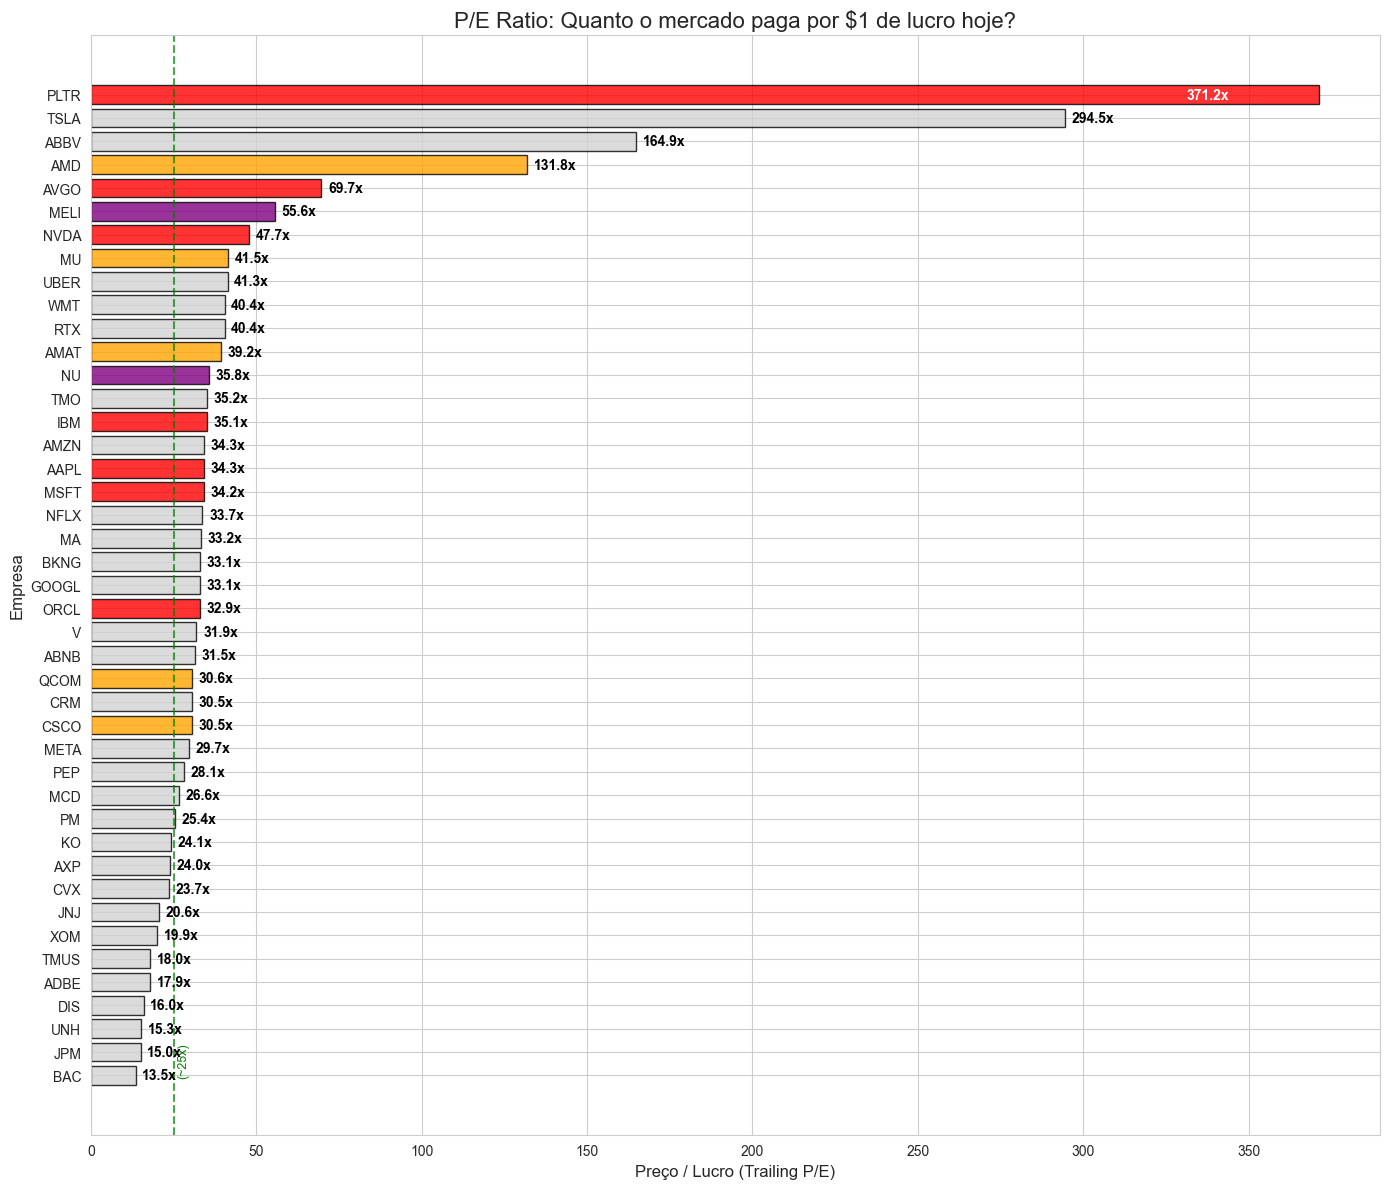


--- TOP 5 MAIORES MÚLTIPLOS---
   Ticker    PE_Ratio
4    PLTR  371.186040
10   TSLA  294.517000
39   ABBV  164.893940
12    AMD  131.828120
6    AVGO   69.690125


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Lista Expandida de Empresas (Seus destaques + Novas adições)
tickers = [
    # Seus Destaques
    "NVDA", "AAPL", "MSFT", "ORCL", "PLTR", "IBM", "AVGO",
    # Adições Relevantes (Big Tech, Semicondutores, Varejo, Finanças)
    "AMZN", "GOOGL", "META", "TSLA", "NFLX", "AMD", "QCOM", "INTC", 
    "MU", "CRM", "ADBE", "UBER", "ABNB", "BKNG", "DIS", "KO", "PEP", 
    "JPM", "V", "MA", "MELI", "NU", "WMT","AMAT","TMO","TMUS","MCD","PM","RTX","AXP", "CVX","CSCO",
    "ABBV","JNJ","XOM","BAC","UNH"
]

# Lista para destacar em Vermelho
destaques_user = ["NVDA", "AAPL", "MSFT", "ORCL", "PLTR", "IBM", "AVGO"]

print(f"Baixando dados em tempo real para {len(tickers)} empresas...")
print("Isso pode levar alguns segundos dependendo da sua conexão.")

data_list = []

# 2. Coleta de Dados ao Vivo
for t in tickers:
    try:
        stock = yf.Ticker(t)
        info = stock.info
        
        # Tentamos pegar o P/E já calculado (Trailing PE)
        pe_ratio = info.get('trailingPE')
        
        # Se não tiver P/E (ex: empresa com prejuízo recente ou dados ausentes), pulamos ou marcamos
        if pe_ratio is None:
            # Tenta calcular manualmente se tiver preço e EPS
            try:
                price = info.get('currentPrice') or info.get('regularMarketPreviousClose')
                eps = info.get('trailingEps')
                if price and eps and eps > 0:
                    pe_ratio = price / eps
                else:
                    pe_ratio = 0 # Marca como 0 para filtrar depois (sem lucro)
            except:
                pe_ratio = 0
        
        # Nome curto para o gráfico
        name = info.get('shortName', t).split()[0]
        
        # Categorização para cores
        if t in destaques_user:
            category = "Seus Destaques"
        elif t in ["MELI", "NU"]:
            category = "LatAm / Brasil"
        elif t in ["AMD", "QCOM", "MU", "INTC","AMAT", "CSCO"]:
            category = "Chips / Hardware"
        else:
            category = "Outros / Mercado"

        data_list.append({
            'Ticker': t,
            'Name': name,
            'PE_Ratio': pe_ratio,
            'Category': category
        })
        
    except Exception as e:
        print(f"Erro ao baixar {t}: {e}")

# Cria DataFrame e Limpa dados
df = pd.DataFrame(data_list)
# Remove empresas com P/E zerado (sem lucro/prejuízo) ou muito absurdo para o gráfico
df_clean = df[df['PE_Ratio'] > 0].sort_values('PE_Ratio', ascending=True)

# 3. Configuração Visual
plt.figure(figsize=(14, 12))
sns.set_style("whitegrid")

# Cores Personalizadas
palette = {
    "Seus Destaques": "red",      # Destaque máximo
    "LatAm / Brasil": "purple",   # Roxo para Nu/Meli
    "Chips / Hardware": "orange", # Laranja
    "Outros / Mercado": "lightgray" # Cinza para fundo
}

# Gráfico de Barras
bars = plt.barh(df_clean['Ticker'], df_clean['PE_Ratio'], 
                color=[palette[c] for c in df_clean['Category']], 
                edgecolor='black', alpha=0.8)

# 4. Anotações (Valores nas barras)
for bar in bars:
    width = bar.get_width()
    # Lógica para o texto não ficar cortado se a barra for muito longa
    label_x_pos = width + 2 if width < 300 else width - 40
    color_text = 'black' if width < 300 else 'white'
    
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}x', 
             va='center', fontweight='bold', fontsize=10, color=color_text)

# Linhas e Títulos
plt.axvline(25, color='green', linestyle='--', alpha=0.7)
plt.text(26, 0, '(~25x)', color='green', fontsize=9, rotation=90)

plt.title('P/E Ratio: Quanto o mercado paga por $1 de lucro hoje?', fontsize=16)
plt.xlabel('Preço / Lucro (Trailing P/E)', fontsize=12)
plt.ylabel('Empresa', fontsize=12)



plt.tight_layout()
plt.show()

# Exibe tabela rápida dos Top 5 mais caros
print("\n--- TOP 5 MAIORES MÚLTIPLOS---")
print(df_clean[['Ticker', 'PE_Ratio']].tail(5).sort_values('PE_Ratio', ascending=False))

C:\Users\guilh\AppData\Local\Temp\ipykernel_29888\665694271.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=df, x="Empresa", y="Net Income ($B)", palette=colors_cap)
C:\Users\guilh\AppData\Local\Temp\ipykernel_29888\665694271.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=df, x="Empresa", y="P/E Ratio", palette=colors_pe)


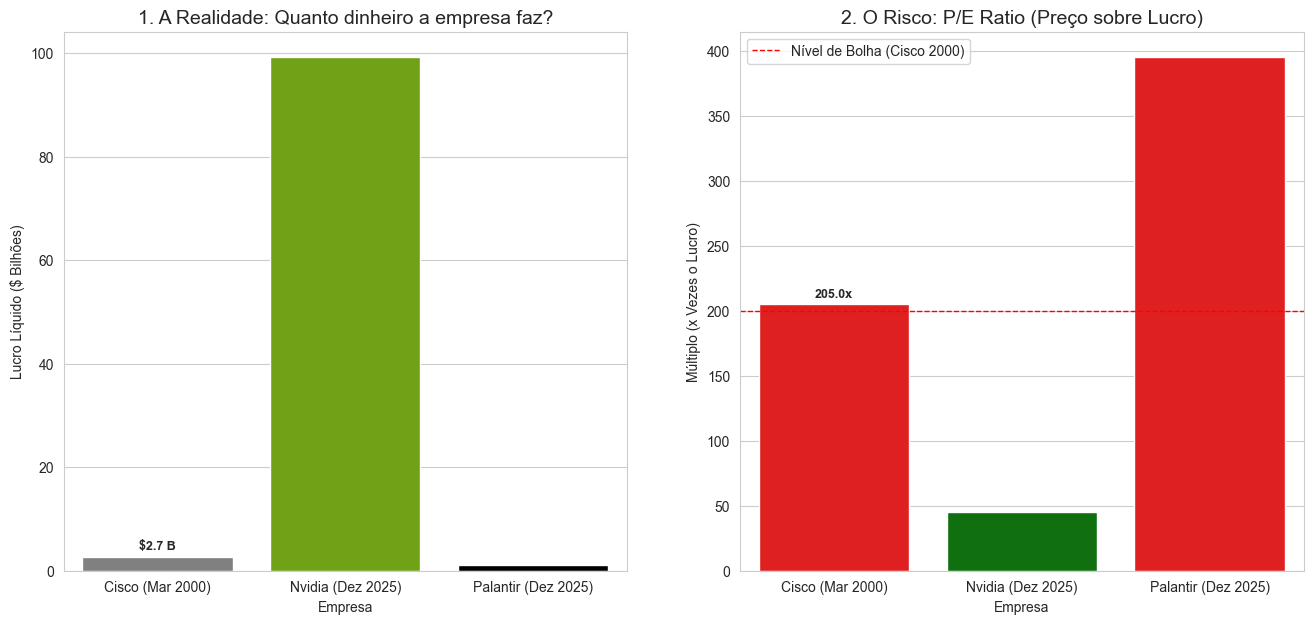

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados Históricos e Atuais
# Fontes: Relatórios Anuais da Cisco (2000) e Dados de Mercado Atuais (2025)
data = [
    {
        "Empresa": "Cisco (Mar 2000)", 
        "Cenário": "Bolha .com",
        "Market Cap ($B)": 555,   # Valor de Mercado no pico
        "Net Income ($B)": 2.7,   # Lucro Líquido Anual na época
        "P/E Ratio": 205.0        # Preço/Lucro no pico (>200x)
                                  #Não ajustei pela inflação esses valores, pois o que importa não é a comparação entre empresas, mas sim a relação market cap,PL e lucro liquido.
    },
    {
        "Empresa": "Nvidia (Dez 2025)", 
        "Cenário": "AI Boom",
        "Market Cap ($B)": 4500,  # ~$4.5 Trilhões
        "Net Income ($B)": 99.2,  # Lucro TTM 
        "P/E Ratio": 45.5         # Múltiplo atual (~45x)
    },
    {
        "Empresa": "Palantir (Dez 2025)", 
        "Cenário": "AI Boom",
        "Market Cap ($B)": 432,   # ~$430 Bilhões
        "Net Income ($B)": 1.1,   # Lucro TTM 
        "P/E Ratio": 395.0        # Múltiplo atual (~400x)
    }
]

df = pd.DataFrame(data)

# Configuração Visual: Criando 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
sns.set_style("whitegrid")

# Cores para destacar perigo
colors_pe = ["red" if x > 100 else "green" for x in df["P/E Ratio"]]
colors_cap = {"Cisco (Mar 2000)": "gray", "Nvidia (Dez 2025)": "#76b900", "Palantir (Dez 2025)": "black"}

# GRÁFICO 1: A Realidade (Lucro Líquido)
sns.barplot(ax=axes[0], data=df, x="Empresa", y="Net Income ($B)", palette=colors_cap)
axes[0].set_title("1. A Realidade: Quanto dinheiro a empresa faz?", fontsize=14)
axes[0].set_ylabel("Lucro Líquido ($ Bilhões)")
axes[0].bar_label(axes[0].containers[0], fmt='$%.1f B', padding=3, fontweight='bold', fontsize=9)

# GRÁFICO 2: A Expectativa (P/E Ratio)
sns.barplot(ax=axes[1], data=df, x="Empresa", y="P/E Ratio", palette=colors_pe)
axes[1].set_title("2. O Risco: P/E Ratio (Preço sobre Lucro)", fontsize=14)
axes[1].set_ylabel("Múltiplo (x Vezes o Lucro)")
axes[1].axhline(200, color='red', linestyle='--', linewidth=1, label="Nível de Bolha (Cisco 2000)")
axes[1].legend()
axes[1].bar_label(axes[1].containers[0], fmt='%.1fx', padding=3, fontweight='bold', fontsize=9)



plt.show()

Buscando dados de NVDA...
Buscando dados de AAPL...
Buscando dados de MSFT...
Buscando dados de ORCL...
Buscando dados de PLTR...
Buscando dados de IBM...
Buscando dados de AVGO...


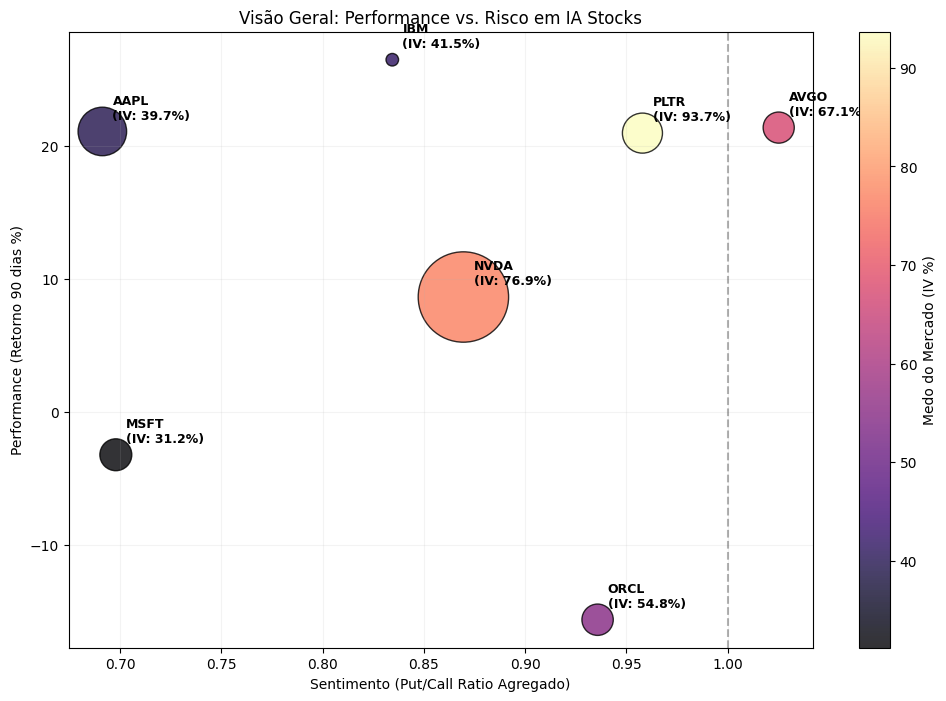

  Ticker  Retorno_90d  Full_PCR    Avg_IV    Total_OI
4   PLTR     0.209602  0.957940  0.936692   3324648.0
0   NVDA     0.086382  0.869496  0.768891  16940230.0
6   AVGO     0.213752  1.025254  0.670944   2010249.0
3   ORCL    -0.156243  0.935789  0.547516   2040138.0
5    IBM     0.264779  0.834373  0.415114    326544.0
1   AAPL     0.210854  0.691145  0.396721   4886658.0
2   MSFT    -0.032219  0.697804  0.311637   2114286.0


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# os ativos e a janela de dias.
tickers_ia = ["NVDA", "AAPL", "MSFT", "ORCL", "PLTR", "IBM", "AVGO"]
window_days = 90 

def get_close_series(ticker):
    # Puxa os preços do último ano. O 'auto_adjust' limpa dividendos e splits pra não sujar o gráfico.
    df = yf.download(ticker, period="1y", auto_adjust=True, progress=False)
    if df.empty: return pd.Series(dtype=float)
    if isinstance(df.columns, pd.MultiIndex):
        close_col = [c for c in df.columns if 'Close' in c[0]]
        return df[close_col[0]].dropna()
    return df["Close"].dropna()

rows = []

# -
for t in tickers_ia:
    print(f"Buscando dados de {t}...")
    
    # 1. Performance: quanto a ação subiu ou caiu nos últimos 90 dias.
    prices = get_close_series(t)
    if len(prices) < window_days: continue
    ret_90d = (prices.iloc[-1] / prices.iloc[-window_days]) - 1

    # 2. Opções:posicionamento em todos os vencimentos.
    tk = yf.Ticker(t)
    expirations = tk.options
    
    total_call_oi, total_put_oi, iv_weighted_sum, total_oi_for_iv = 0, 0, 0, 0
    
    # Passando por cada data de vencimento pra somar o volume e calcular o risco.
    for expiry in expirations:
        try:
            chain = tk.option_chain(expiry)
            calls = chain.calls.dropna(subset=['openInterest', 'impliedVolatility'])
            puts = chain.puts.dropna(subset=['openInterest', 'impliedVolatility'])
            
            # Somando o Open Interest (OI) - contratos abertos
            total_call_oi += calls["openInterest"].sum()
            total_put_oi += puts["openInterest"].sum()
            
            # Cálculo da IV ponderada: dá mais peso pra onde o smartmoney está.
            iv_weighted_sum += (calls['impliedVolatility'] * calls['openInterest']).sum()
            iv_weighted_sum += (puts['impliedVolatility'] * puts['openInterest']).sum()
            total_oi_for_iv += (calls['openInterest'].sum() + puts['openInterest'].sum())
        except:
            continue

    # 3. Consolidação: Gera o PCR (Put/Call Ratio) e a IV média.
    full_pcr = total_put_oi / total_call_oi if total_call_oi > 0 else np.nan
    avg_iv = (iv_weighted_sum / total_oi_for_iv) if total_oi_for_iv > 0 else np.nan

    rows.append({
        "Ticker": t, "Retorno_90d": ret_90d, "Full_PCR": full_pcr,
        "Avg_IV": avg_iv, "Total_OI": total_oi_for_iv
    })

df_final = pd.DataFrame(rows).dropna()
plt.figure(figsize=(12, 8))

# Criando as bolhas: o tamanho mostra a liquidez (OI) e a cor mostra a IV (o "medo").
scatter = plt.scatter(
    df_final["Full_PCR"], df_final["Retorno_90d"] * 100,
    s=df_final["Total_OI"] / 4000, c=df_final["Avg_IV"] * 100, 
    cmap="magma", edgecolors="black", alpha=0.8
)

# Colocando os nomes das empresas no gráfico.
for _, row in df_final.iterrows():
    plt.text(row["Full_PCR"] + 0.005, row["Retorno_90d"] * 100 + 0.7, 
             f"{row['Ticker']}\n(IV: {row['Avg_IV']*100:.1f}%)", 
             fontsize=9, fontweight='bold', va='bottom')

# Linha do PCR = 1 (divisória entre otimismo e proteção).
plt.axvline(1, color="black", linestyle="--", alpha=0.3)
plt.xlabel("Sentimento (Put/Call Ratio Agregado)")
plt.ylabel("Performance (Retorno 90 dias %)")
plt.title("Visão Geral: Performance vs. Risco em IA Stocks")
plt.colorbar(scatter).set_label("Medo do Mercado (IV %)")
plt.grid(alpha=0.15)
plt.show()

# Resumo rápido pra análise rápida no console.
print(df_final.sort_values(by="Avg_IV", ascending=False))

#Este gráfico cruza performance passada (Eixo Y) com a expectativa de risco futuro (Eixo X).
# A cor representa a Volatilidade Implícita (IV) - o "preço do medo".
#
# ANÁLISE DOS ATIVOS:
#
# 1. NVDA (O Eixo de Equilíbrio): 
#    Aparece centralizada, com o maior volume de dados.
#    Com retorno 9% e PCR 0.86, indica um cenário institucional maduro e equilibrado.
#    
#
# 2. PLTR & AVGO (Sinal de Alerta):
#    Apresentam retornos altos (>20%), mas o PCR está colado em 1.0.
#    Interpretação: O mercado está subindo, mas os investidores estão comprando proteção 
#    (Puts) de forma agressiva. Indica um rali "esticado" e risco de reversão brusca.
#
# 3. ORCL (Anomalia de Fraqueza):
#    Apresenta um comportamento divergente: retorno negativo com PCR alto (~0.90).
#    Diferente de uma correção saudável, o mercado de opções está confirmando a queda,
#    sinalizando baixa convicção em uma recuperação de curto prazo.
#
# 4. AAPL & MSFT (Otimismo e Complacência):
#    PCRs baixos (0.70) indicam que o mercado não está cobrando caro para proteger estes ativos.
#    Na AAPL, o sentimento é de otimismo puro. Na MSFT, sugere uma postura de "buy the dip".
#
# CONCLUSÃO PRELIMINAR: Ativos com PCR > 0.95 e Retorno > 20% (PLTR/AVGO) sugerem que o prêmio 
# de risco de cauda (tail risk) está ficando caro, indicando possível topo de mercado.

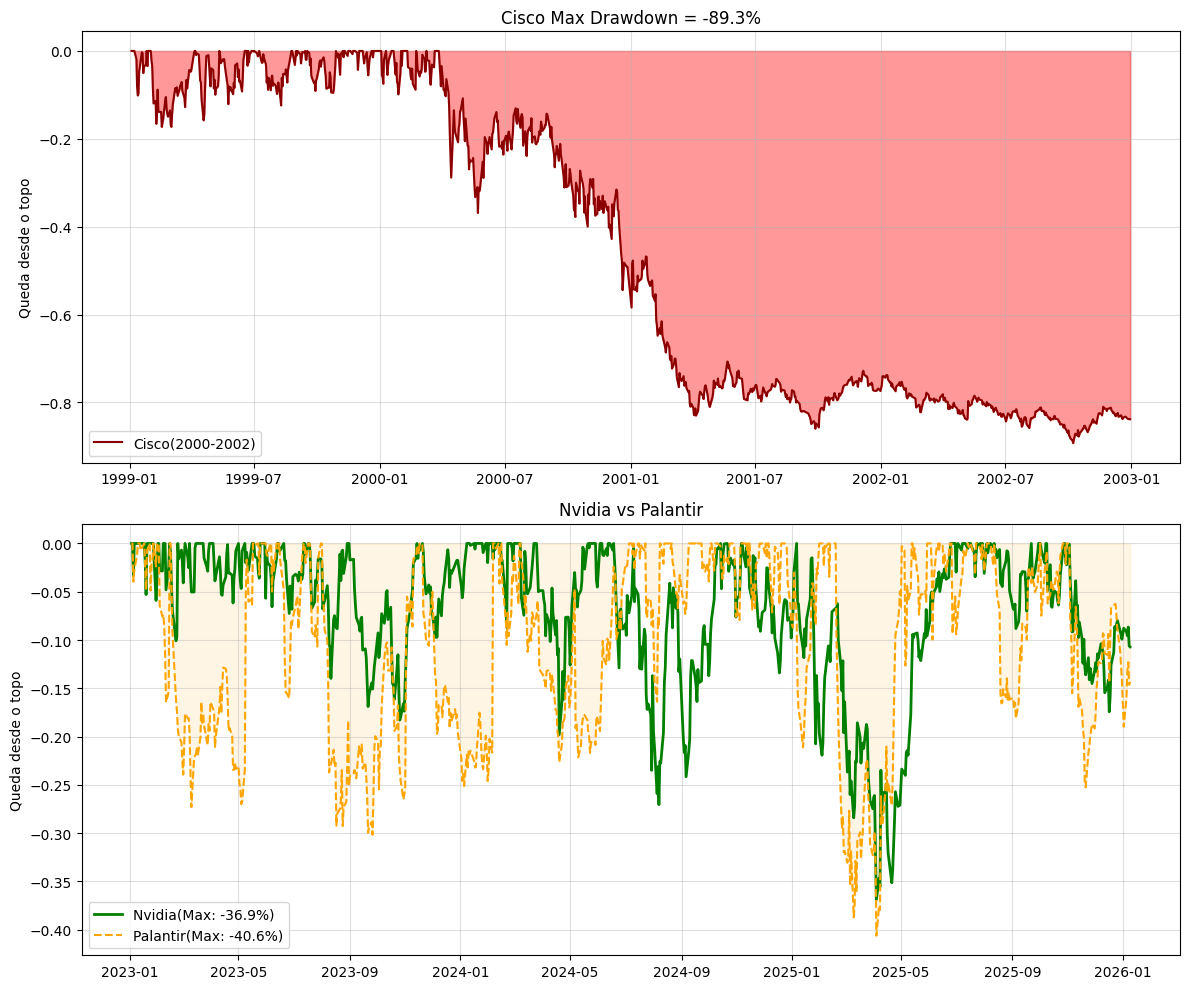

In [29]:

# Função pra calcular a série de drawdown e o drawdown máximo
def calculo_drawdown(series_precos):

    # Calcula o preço máximo acumulado até hoje
    maximo_acumulado = series_precos.cummax()

    # Calcula a queda percentual em relação ao topo
    drawdown = series_precos/maximo_acumulado - 1

    # Pico máximo de queda
    drawdown_maximo = drawdown.min() 

    return drawdown, drawdown_maximo

# Vamos baixar os dados do período da crise .com desde 1999 para ter o topo bem definido focando na queda 2000-2002

cisco = get_close_series('CSCO', '1999-01-01','2002-12-31')

# Para o período atual, focamos na Nvidia e na Palantir.
# Só faz sentido se pegarmos os dados pós lançamento do amigão gepeto em 22

nvidia = get_close_series   ('NVDA', '2023-01-01', None)
palantir = get_close_series('PLTR','2023-01-01', None)

# Calculos 
drawdown_cisco, max_drawdown_cisco = calculo_drawdown(cisco)
drawdown_nvidia, max_drawdown_nvidia = calculo_drawdown(nvidia)
drawdown_palantir, max_drawdown_palantir = calculo_drawdown(palantir)

# Plotagem do gráfico submarino 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize= (12,10))

# Benchmark histórico(Cisco)
ax1.fill_between(drawdown_cisco.index, drawdown_cisco, color='red', alpha=0.4)
ax1.plot(drawdown_cisco.index, drawdown_cisco, color='darkred', label=f'Cisco(2000-2002)')
ax1.set_title(f'Cisco Max Drawdown = {max_drawdown_cisco:.1%}')
ax1.set_ylabel('Queda desde o topo')
ax1.grid(True, alpha = 0.4)
ax1.legend()

# Cenário atual(Nvidia vs Palantir)
ax2.plot(drawdown_nvidia.index, drawdown_nvidia, label = f'Nvidia(Max: {max_drawdown_nvidia:.1%})', color = 'green', linewidth=2)
ax2.plot(drawdown_palantir.index, drawdown_palantir, label = f'Palantir(Max: {max_drawdown_palantir:.1%})', color='orange', linestyle='--')
ax2.fill_between(drawdown_palantir.index, drawdown_palantir, color = 'orange', alpha = 0.1)

ax2.set_title('Nvidia vs Palantir')
ax2.set_ylabel('Queda desde o topo')
ax2.grid(True, alpha = 0.4)
ax2.legend()

plt.tight_layout()
plt.show()


In [30]:
# Puxar os dados de fechamento no período pós lançamento do chatgpt
nvda = get_close_series('NVDA', '2023-01-01', None)
ibov = get_close_series('^BVSP', '2023-01-01', None)
btc = get_close_series('BTC-USD', '2023-01-01', None)

# Alinhando as datas e removendo linhas com dados faltantes 
df = pd.DataFrame({"NVDA": nvda, "BTC": btc, "IBOV": ibov}).pct_change().dropna()

# Extraindo os arrays
array_nvda = df['NVDA'].values
array_ibov = df['IBOV'].values
array_btc = df['BTC'].values


# Vamos fazer um teste de permutação para correlação entre Nvidia x Bitcoin e Nvidia x Ibov

# Hipótese nula: Não existe correlação real entre os ativos 

# 1)NVIDIA VS BTC  


#Correlação real observada Nvidia x BTC
rho_btc  = np.corrcoef(array_nvda,array_btc)[0,1]

# Array para armazenar as correlações das permutações
perm_reps_rho = np.empty(10000)

# Gera 10.000 replicas 
for i in range(10000):
    # Embaralhamento da Nvidia para quebrar relações temporais com o BTC
    scrambled_NVDA = np.random.permutation(array_nvda)
    # Calculo da correlação desse cenario
    perm_reps_rho[i] = np.corrcoef(scrambled_NVDA, array_btc)[0,1]

# Valor-P: Proporção de replicas que tem uma correlação de Pearson pelo menos tão grande quanto a que foi observada
p_val_btc = np.sum(perm_reps_rho >= rho_btc) / 10000

#2) NVIDIA VS IBOV

# Segue a mesma lógica

rho_ibov = np.corrcoef(array_nvda,array_ibov)[0,1]

perm_reps_rho_ibov = np.empty(10000)


for i in range(10000):
    scrambled_NVDA = np.random.permutation(array_nvda)
    perm_reps_rho_ibov[i] = np.corrcoef(scrambled_NVDA, array_ibov)[0,1]

p_val_ibov = np.sum(perm_reps_rho_ibov >= rho_ibov) / 10000

# RESULTADOS 

print("1) NVIDIA x BITCOIN")
print(f' - Correlação Real: {rho_btc:.4f}')
print(f' - Valor-P: {p_val_btc:.5f}')
if p_val_btc < 0.05:
    print('Rejeitamos a hipótese nula, há uma relação significativa')
else:
    print('Não há uma relação significativa')

print("\n2) NVIDIA x IBOVESPA")
print(f' - Correlação Real: {rho_ibov:.4f}')
print(f' - Valor-P: {p_val_ibov:.5f}')
if p_val_ibov < 0.05:
    print('Rejeitamos a hipótese nula, há uma relação significativa')
else:
    print('Não há uma relação significativa, pode ser só acaso')

# Um p-value inferior a 0.05 fornece evidência contra a hipótese nula, indicando relação real entre os ativos 

C:\Users\guilh\AppData\Local\Temp\ipykernel_16192\969091559.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df = pd.DataFrame({"NVDA": nvda, "BTC": btc, "IBOV": ibov}).pct_change().dropna()


1) NVIDIA x BITCOIN
 - Correlação Real: 0.1932
 - Valor-P: 0.00000
Rejeitamos a hipótese nula, há uma relação significativa

2) NVIDIA x IBOVESPA
 - Correlação Real: 0.1373
 - Valor-P: 0.00000
Rejeitamos a hipótese nula, há uma relação significativa


Puxando dados e calculando significância...


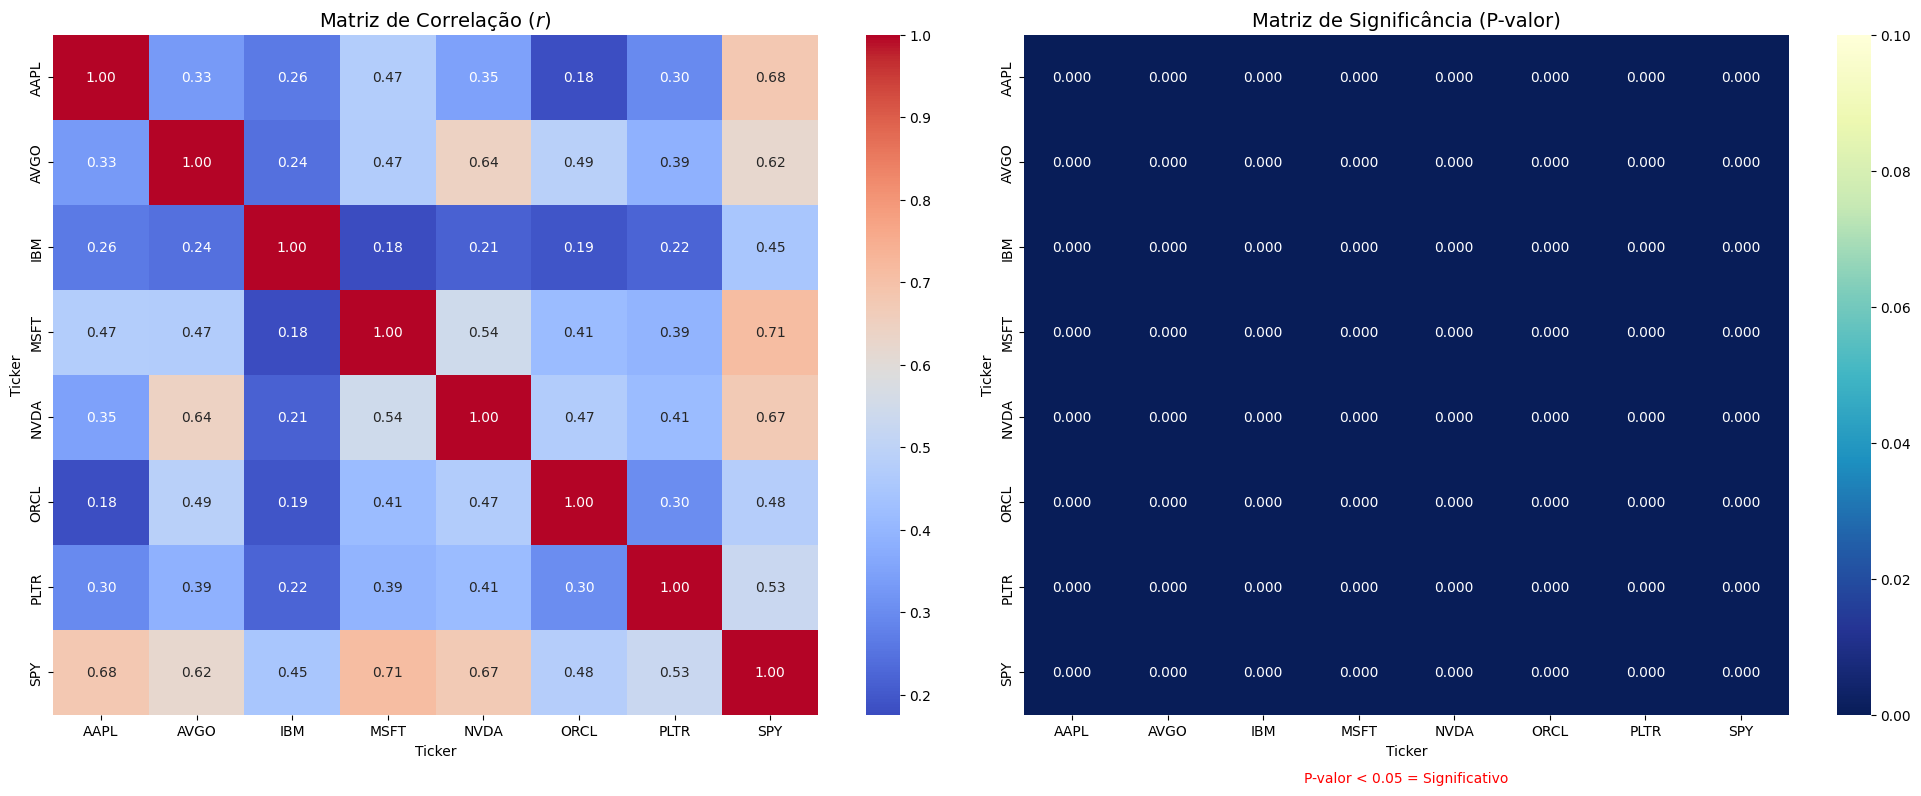


--- Relatório de Validação (Seção 2.5) ---
NVDA vs SPY: p-valor = 0.00000 (SIGNIFICATIVO)
AAPL vs SPY: p-valor = 0.00000 (SIGNIFICATIVO)
MSFT vs SPY: p-valor = 0.00000 (SIGNIFICATIVO)
ORCL vs SPY: p-valor = 0.00000 (SIGNIFICATIVO)
PLTR vs SPY: p-valor = 0.00000 (SIGNIFICATIVO)
IBM vs SPY: p-valor = 0.00000 (SIGNIFICATIVO)
AVGO vs SPY: p-valor = 0.00000 (SIGNIFICATIVO)
Baixando dados para Simulação de Monte Carlo...
Resultado NVDA x SPY: Real=0.6718 | P-valor=0.0000
Resultado MSFT x SPY: Real=0.7102 | P-valor=0.0000
Resultado AAPL x SPY: Real=0.6800 | P-valor=0.0000
Resultado PLTR x SPY: Real=0.5287 | P-valor=0.0000


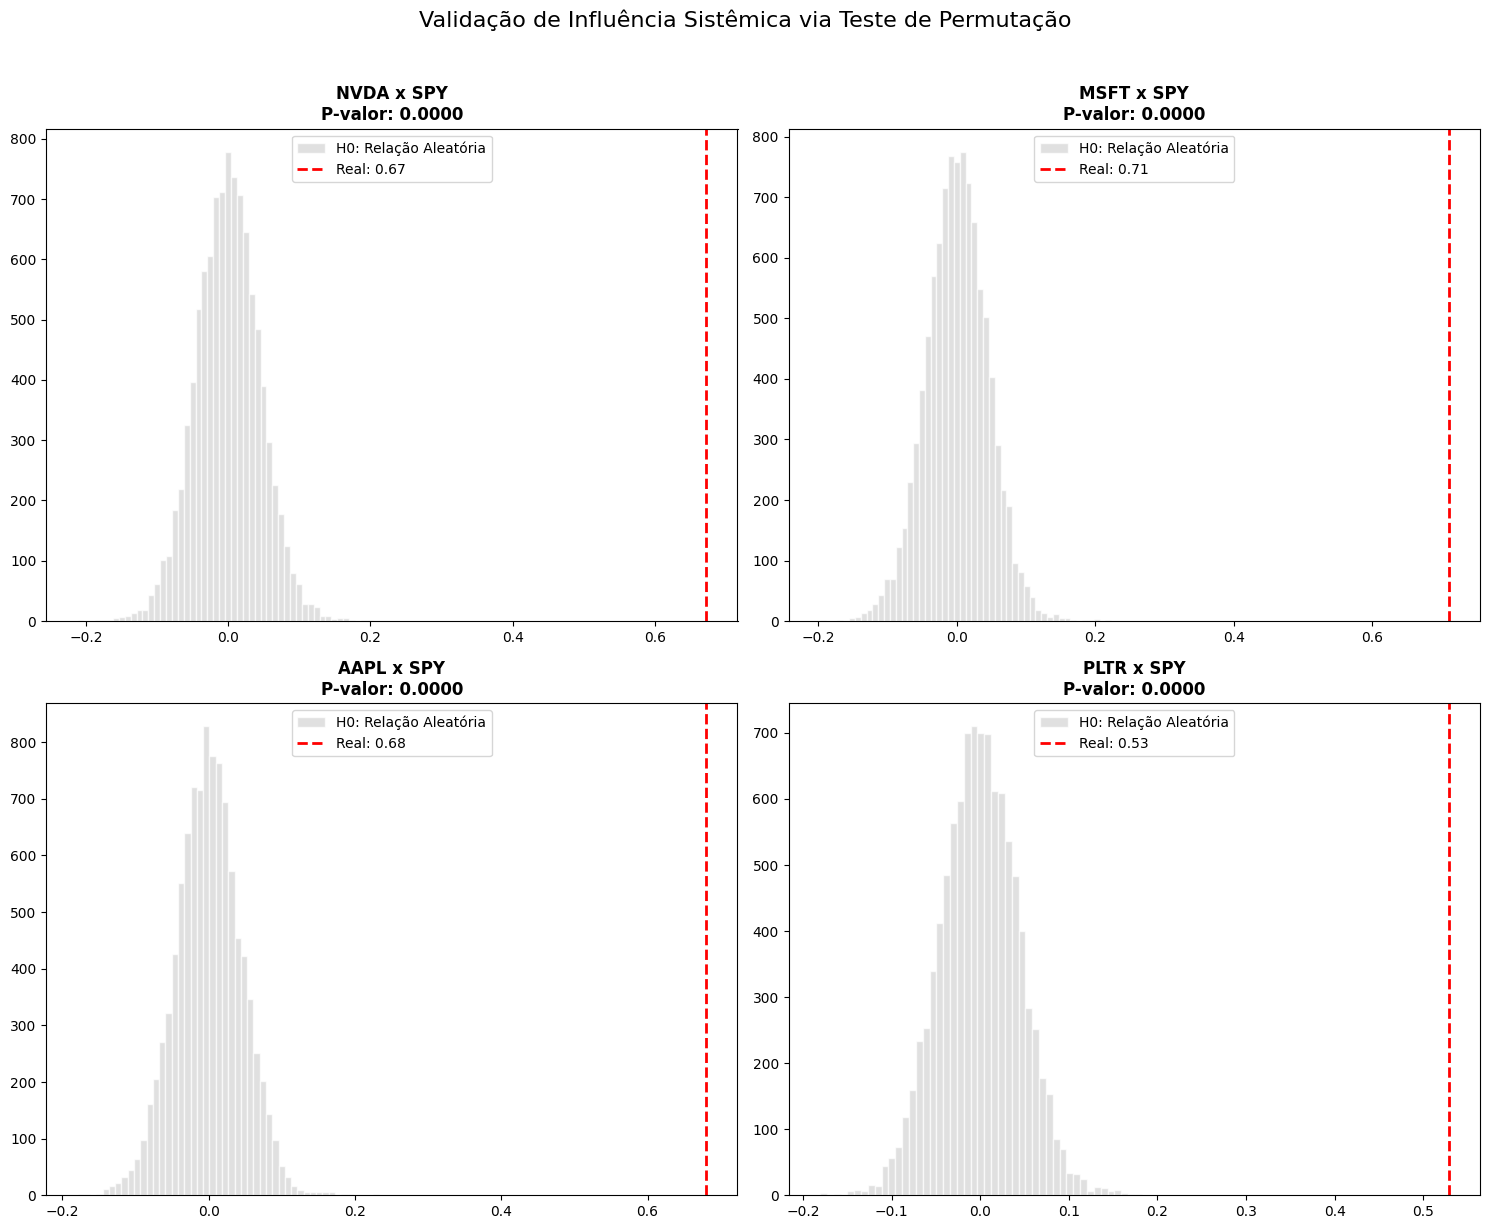

In [3]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# --- Setup e Ingestão ---
tickers_ia = ["NVDA", "AAPL", "MSFT", "ORCL", "PLTR", "IBM", "AVGO"]
benchmark = "SPY"
todos_ativos = tickers_ia + [benchmark]

print("Puxando dados e calculando significância...")
df = yf.download(todos_ativos, period="2y", auto_adjust=True, progress=False)['Close']
returns = df.pct_change().dropna()

# 1. Funções para calcular Correlação e P-valor
def calculate_p_values(df_returns):
    cols = df_returns.columns
    p_values = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    for i in cols:
        for j in cols:
            if i == j:
                p_values.loc[i, j] = 0.0 # Correlação consigo mesmo é sempre perfeita
            else:
                _, p = pearsonr(df_returns[i], df_returns[j])
                p_values.loc[i, j] = p
    return p_values

corr_matrix = returns.corr()
p_matrix = calculate_p_values(returns)

# --- Visualização de Significância ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico 1: Correlação Tradicional
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax1)
ax1.set_title("Matriz de Correlação ($r$)", fontsize=14)

# Gráfico 2: Matriz de Significância (P-valor)
# Usamos uma escala logarítmica ou cores binárias para destacar p < 0.05
sns.heatmap(p_matrix, annot=True, cmap='YlGnBu_r', fmt=".3f", ax=ax2, vmax=0.1)
ax2.set_title("Matriz de Significância (P-valor)", fontsize=14)
ax2.annotate('P-valor < 0.05 = Significativo', xy=(0.5, -0.1), xycoords='axes fraction', ha='center', color='red')

plt.tight_layout()
plt.show()

# Resumo para o seu relatório
print("\n--- Relatório de Validação (Seção 2.5) ---")
for t in tickers_ia:
    p_val = p_matrix.loc[t, benchmark]
    status = "SIGNIFICATIVO" if p_val < 0.05 else "NÃO SIGNIFICATIVO"
    print(f"{t} vs {benchmark}: p-valor = {p_val:.5f} ({status})")




import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Preparação dos Dados ---
tickers = ["NVDA", "MSFT", "AAPL", "PLTR", "SPY"]
print("Baixando dados para Simulação de Monte Carlo...")
df = yf.download(tickers, period="2y", auto_adjust=True, progress=False)['Close']
returns = df.pct_change().dropna()

# --- 2. Função do Teste de Permutação ---
def permutation_test(stock, benchmark, n_simulations=10000):
    # Correlação observada na vida real
    actual_corr = returns[stock].corr(returns[benchmark])
    
    # Simulações: embaralhando os retornos do benchmark
    simulated_corrs = []
    benchmark_returns = returns[benchmark].values
    
    for _ in range(n_simulations):
        shuffled_benchmark = np.random.permutation(benchmark_returns)
        sim_corr = np.corrcoef(returns[stock], shuffled_benchmark)[0, 1]
        simulated_corrs.append(sim_corr)
    
    # Cálculo do P-valor: qual a % de simulações superou a real?
    simulated_corrs = np.array(simulated_corrs)
    p_value = np.sum(np.abs(simulated_corrs) >= np.abs(actual_corr)) / n_simulations
    
    return actual_corr, simulated_corrs, p_value

# --- 3. Execução e Plotagem ---
pares = [("NVDA", "SPY"), ("MSFT", "SPY"), ("AAPL", "SPY"), ("PLTR", "SPY")]
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (stock, bench) in enumerate(pares):
    actual, simulated, p_val = permutation_test(stock, bench)
    
    # Plotagem da distribuição nula
    axes[i].hist(simulated, bins=50, alpha=0.7, color='lightgray', edgecolor='white', label='H0: Relação Aleatória')
    axes[i].axvline(actual, color='red', linestyle='--', linewidth=2, label=f'Real: {actual:.2f}')
    axes[i].set_title(f"{stock} x {bench}\nP-valor: {p_val:.4f}", fontsize=12, fontweight='bold')
    axes[i].legend()
    
    print(f"Resultado {stock} x {bench}: Real={actual:.4f} | P-valor={p_val:.4f}")

plt.suptitle("Validação de Influência Sistêmica via Teste de Permutação", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Baixando dados e iniciando 10.000 simulações por par...


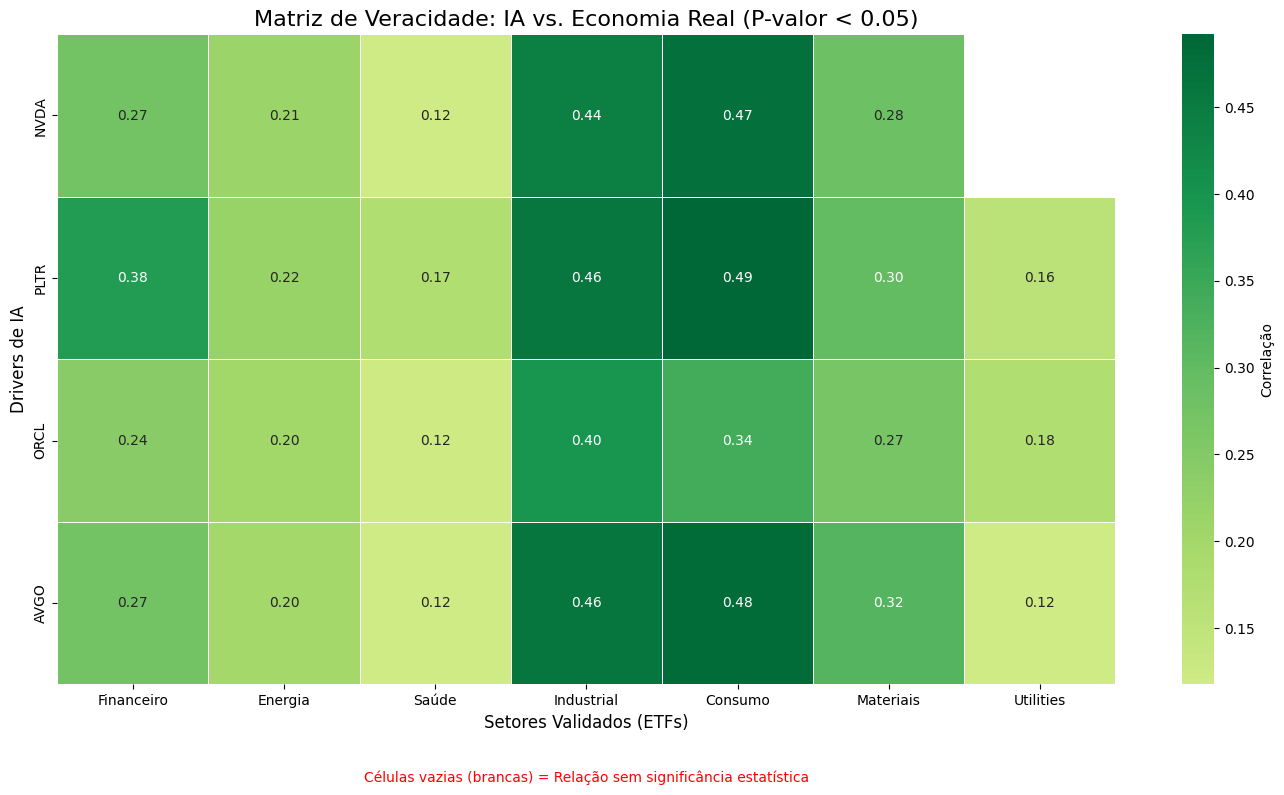


--- Diagnóstico de PLTR ---
PLTR x Financeiro: P-valor = 0.0000 -> REAL/SISTÊMICO
PLTR x Energia: P-valor = 0.0000 -> REAL/SISTÊMICO
PLTR x Saúde: P-valor = 0.0001 -> REAL/SISTÊMICO
PLTR x Industrial: P-valor = 0.0000 -> REAL/SISTÊMICO
PLTR x Consumo: P-valor = 0.0000 -> REAL/SISTÊMICO
PLTR x Materiais: P-valor = 0.0000 -> REAL/SISTÊMICO
PLTR x Utilities: P-valor = 0.0001 -> REAL/SISTÊMICO


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Setup e Ingestão ---
ia_stocks = ["NVDA", "PLTR", "ORCL", "AVGO"]
setores = {
    "XLF": "Financeiro", "XLE": "Energia", "XLV": "Saúde", 
    "XLI": "Industrial", "XLY": "Consumo", "XLB": "Materiais", "XLU": "Utilities"
}
tickers = ia_stocks + list(setores.keys())

print("Baixando dados e iniciando 10.000 simulações por par...")
df = yf.download(tickers, period="2y", auto_adjust=True, progress=False)['Close']
returns = df.pct_change().dropna()

# --- 2. Função de Permutação Otimizada ---
def get_permutation_p_value(s1, s2, n_sims=10000):
    actual_corr = s1.corr(s2)
    s2_values = s2.values
    count = 0
    for _ in range(n_sims):
        shuffled = np.random.permutation(s2_values)
        sim_corr = np.corrcoef(s1.values, shuffled)[0, 1]
        if abs(sim_corr) >= abs(actual_corr):
            count += 1
    return actual_corr, count / n_sims

# --- 3. Processamento das Matrizes ---
corr_data = []
p_data = []

for stock in ia_stocks:
    stock_corrs = []
    stock_ps = []
    for sector in setores.keys():
        r, p = get_permutation_p_value(returns[stock], returns[sector])
        stock_corrs.append(r)
        stock_ps.append(p)
    corr_data.append(stock_corrs)
    p_data.append(stock_ps)

df_corr = pd.DataFrame(corr_data, index=ia_stocks, columns=setores.values())
df_p = pd.DataFrame(p_data, index=ia_stocks, columns=setores.values())

# --- 4. Visualização da Matriz de Veracidade ---
plt.figure(figsize=(14, 8))

# Usamos o heatmap de correlação, mas marcamos com 'X' o que NÃO é significativo
mask = df_p > 0.05
sns.heatmap(df_corr, annot=True, cmap='RdYlGn', center=0, fmt=".2f", 
            linewidths=0.5, mask=mask, cbar_kws={'label': 'Correlação'})

plt.title("Matriz de Veracidade: IA vs. Economia Real (P-valor < 0.05)", fontsize=16)
plt.xlabel("Setores Validados (ETFs)", fontsize=12)
plt.ylabel("Drivers de IA", fontsize=12)
plt.annotate('Células vazias (brancas) = Relação sem significância estatística', 
             xy=(0.5, -0.15), xycoords='axes fraction', ha='center', color='red', fontsize=10)

plt.tight_layout()
plt.show()

# --- 5. Análise de PLTR  ---
print("\n--- Diagnóstico de PLTR ---")
pltr_results = df_p.loc['PLTR']
for setor, p in pltr_results.items():
    status = "REAL/SISTÊMICO" if p < 0.05 else "RUÍDO/ALEATÓRIO"
    print(f"PLTR x {setor}: P-valor = {p:.4f} -> {status}")

#o fato do par NVDA x utilities não ter aparecido é por falta de validação estatistica, pois p-value>0.05

ANÁLISE DE CORRELAÇÕES MÓVEIS COM SIGNIFICÂNCIA ESTATÍSTICA
Baixando dados de 2021-01-01 até 2026-01-19...
  Baixando AVGO... ✓ 1266 observações
  Baixando NVDA... ✓ 1266 observações
  Baixando PLTR... ✓ 1266 observações
  Baixando XLI... ✓ 1266 observações
  Baixando XLE... ✓ 1266 observações
  Baixando XLY... ✓ 1266 observações
  Baixando XLF... ✓ 1266 observações

Dados consolidados: 1266 observações
Tickers baixados: AVGO, NVDA, PLTR, XLI, XLE, XLY, XLF
Retornos calculados: 1265 observações

Calculando correlações móveis (janela=63 dias)...
  AVGO vs XLI...
  AVGO vs XLE...
  AVGO vs XLY...
  AVGO vs XLF...
  NVDA vs XLI...
  NVDA vs XLE...
  NVDA vs XLY...
  NVDA vs XLF...
  PLTR vs XLI...
  PLTR vs XLE...
  PLTR vs XLY...
  PLTR vs XLF...
Correlações calculadas com sucesso!

ESTATÍSTICAS RESUMIDAS
Ação ETF  Corr. Média  Corr. Mediana  Desvio Padrão  Corr. Mín  Corr. Máx  % Significativo  Corr. Atual  IC Atual Inferior  IC Atual Superior
AVGO XLI        0.504          0.474       

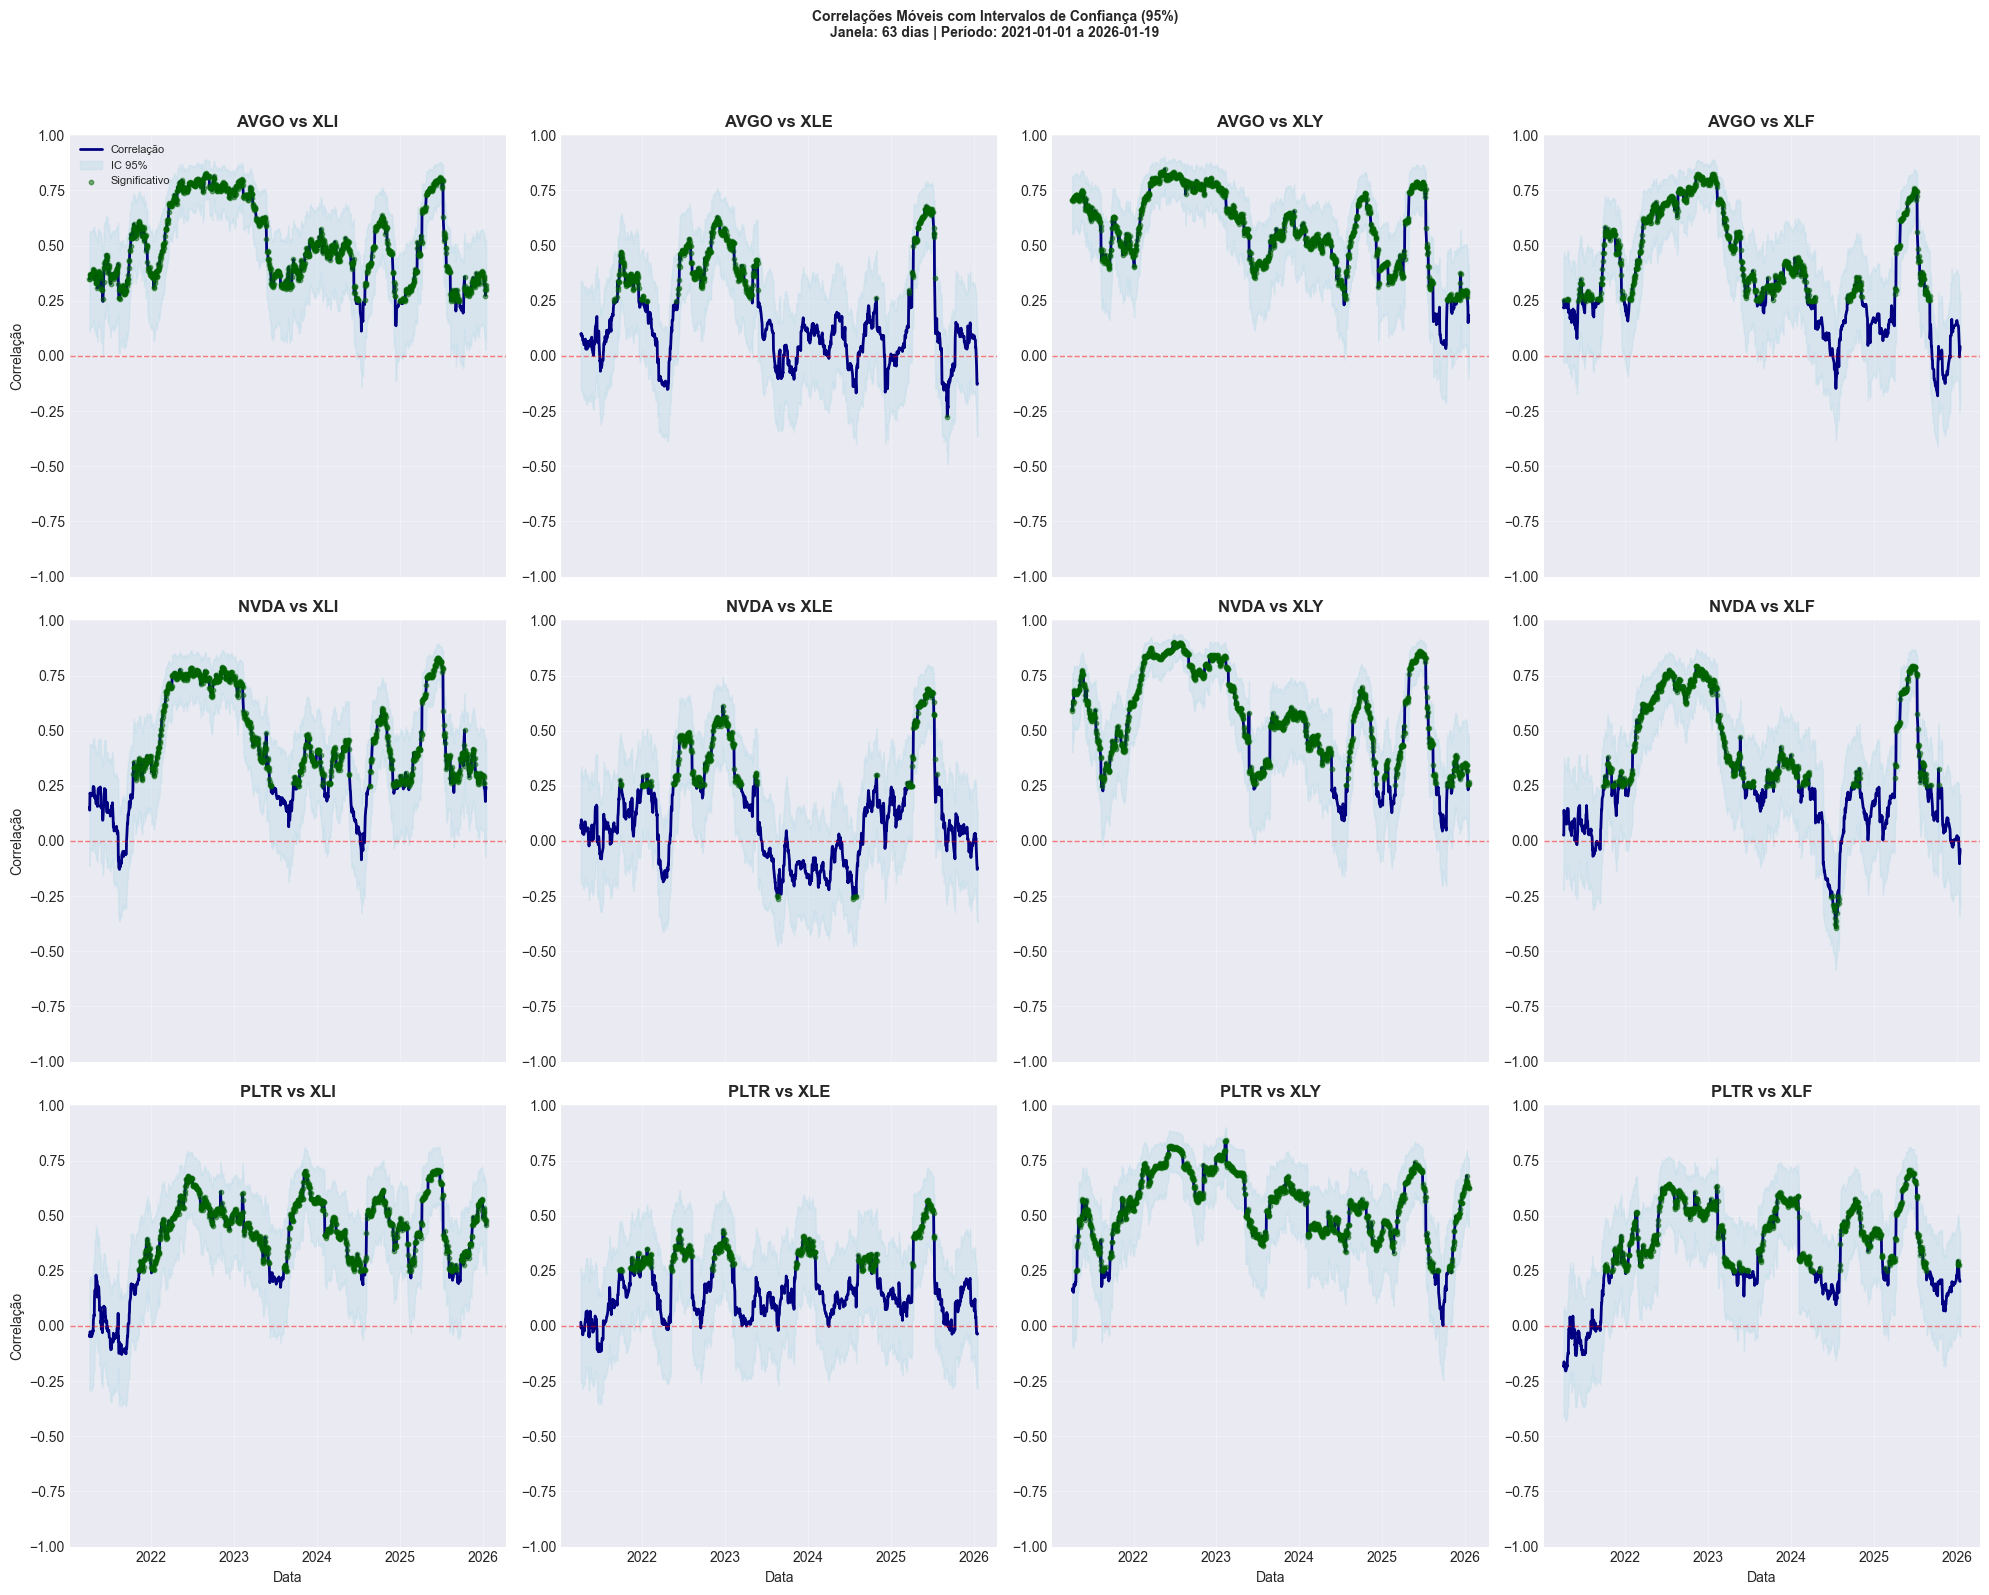


INTERPRETAÇÃO DOS RESULTADOS

METODOLOGIA:
• Correlação de Pearson móvel em retornos logarítmicos
• Fisher Z-transformation para intervalos de confiança (Fisher, 1915)
• IC 95% calculado via SE(Z) = 1/√(n-3)
• Correlação significativa quando IC não inclui zero

INTERPRETAÇÃO:
• Correlação > 0.7: muito forte
• Correlação 0.4-0.7: forte  
• Correlação 0.2-0.4: moderada
• Correlação < 0.2: fraca
• Pontos verdes: estatisticamente significativos (p < 0.05)

SETORES DOS ETFs:
• XLI: Industrial
• XLE: Energia
• XLY: Consumo Discricionário
• XLF: Financeiro



In [14]:
"""
Análise de Correlações Móveis com Significância Estatística
Ações (AVGO, NVDA, PLTR) vs ETFs Setoriais (XLI, XLE, XLY, XLF)
Período: 2021 até presente
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurações
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

class RollingCorrelationAnalysis:
    """
    Classe para análise de correlações móveis com intervalos de confiança
    usando o método de Fisher Z-transformation para validação estatística.
    """
    
    def __init__(self, start_date='2021-01-01', window=63, confidence_level=0.95):
        """
        Parâmetros:
        - start_date: data inicial da análise
        - window: janela móvel em dias úteis (63 ≈ 3 meses, 252 ≈ 1 ano)
        - confidence_level: nível de confiança para intervalos (padrão 95%)
        """
        self.start_date = start_date
        self.end_date = datetime.now().strftime('%Y-%m-%d')
        self.window = window
        self.confidence_level = confidence_level
        self.alpha = 1 - confidence_level
        
        # Ativos a analisar
        self.stocks = ['AVGO', 'NVDA', 'PLTR']
        self.etfs = ['XLI', 'XLE', 'XLY', 'XLF']
        
        self.data = None
        self.returns = None
        self.correlations = {}
        
    def download_data(self):
        """Baixa dados históricos ajustados de preços"""
        print(f"Baixando dados de {self.start_date} até {self.end_date}...")
        
        all_tickers = self.stocks + self.etfs
        
        # Baixa cada ticker individualmente para evitar problemas de estrutura
        data_list = []
        for ticker in all_tickers:
            try:
                print(f"  Baixando {ticker}...", end=' ')
                df = yf.download(ticker, start=self.start_date, 
                                end=self.end_date, progress=False, auto_adjust=True)
                
                # Com auto_adjust=True, a coluna 'Close' já é ajustada
                if len(df) > 0:
                    # Pega a coluna Close (que já está ajustada com auto_adjust=True)
                    if 'Close' in df.columns:
                        series = df['Close'].copy()
                        series.name = ticker
                    else:
                        # Se retornar como Series diretamente
                        series = df.copy()
                        series.name = ticker
                    
                    data_list.append(series)
                    print(f"✓ {len(series)} observações")
                else:
                    print(f"✗ Nenhum dado retornado")
                    
            except Exception as e:
                print(f"✗ Erro: {str(e)}")
                import traceback
                traceback.print_exc()
                continue
        
        if not data_list:
            raise ValueError("Nenhum dado foi baixado com sucesso. Verifique os tickers e a conexão com a internet.")
        
        # Combina todas as séries em um único DataFrame
        self.data = pd.concat(data_list, axis=1)
        
        # Verifica dados ausentes
        missing = self.data.isnull().sum()
        if missing.any():
            print(f"\nAtenção - Dados ausentes:\n{missing[missing > 0]}")
        
        print(f"\nDados consolidados: {len(self.data)} observações")
        print(f"Tickers baixados: {', '.join(self.data.columns.tolist())}")
        return self.data
    
    def calculate_returns(self):
        """Calcula retornos logarítmicos (mais apropriados para análise estatística)"""
        self.returns = np.log(self.data / self.data.shift(1)).dropna()
        print(f"Retornos calculados: {len(self.returns)} observações")
        return self.returns
    
    def fisher_z_transform(self, r):
        """
        Transformação Z de Fisher para correlações.
        Converte correlações em distribuição aproximadamente normal.
        Z = 0.5 * ln((1+r)/(1-r))
        """
        # Limita r para evitar divisão por zero
        r = np.clip(r, -0.9999, 0.9999)
        return 0.5 * np.log((1 + r) / (1 - r))
    
    def inverse_fisher_z(self, z):
        """Transformação inversa de Fisher"""
        return (np.exp(2 * z) - 1) / (np.exp(2 * z) + 1)
    
    def calculate_confidence_bands(self, correlation, n):
        """
        Calcula bandas de confiança usando Fisher Z-transformation.
        
        Método academicamente validado:
        - Fisher (1915, 1921): transformação para normalidade
        - Erro padrão: SE(Z) = 1/√(n-3)
        - Intervalo: Z ± z_crítico * SE(Z)
        """
        # Transformação Z de Fisher
        z = self.fisher_z_transform(correlation)
        
        # Erro padrão da transformação Z
        se_z = 1 / np.sqrt(n - 3)
        
        # Valor crítico da distribuição normal
        z_critical = stats.norm.ppf(1 - self.alpha / 2)
        
        # Intervalos de confiança em escala Z
        z_lower = z - z_critical * se_z
        z_upper = z + z_critical * se_z
        
        # Transformação inversa para escala de correlação
        ci_lower = self.inverse_fisher_z(z_lower)
        ci_upper = self.inverse_fisher_z(z_upper)
        
        return ci_lower, ci_upper
    
    def rolling_correlation_with_ci(self, stock, etf):
        """
        Calcula correlação móvel com intervalos de confiança.
        
        Retorna DataFrame com:
        - correlation: correlação de Pearson móvel
        - ci_lower: limite inferior do IC
        - ci_upper: limite superior do IC
        - significant: True se significativo (não inclui zero)
        """
        # Correlação móvel
        rolling_corr = self.returns[stock].rolling(window=self.window).corr(
            self.returns[etf]
        )
        
        # Calcula intervalos de confiança para cada janela
        ci_lower = []
        ci_upper = []
        
        for i in range(len(rolling_corr)):
            if pd.notna(rolling_corr.iloc[i]):
                lower, upper = self.calculate_confidence_bands(
                    rolling_corr.iloc[i], self.window
                )
                ci_lower.append(lower)
                ci_upper.append(upper)
            else:
                ci_lower.append(np.nan)
                ci_upper.append(np.nan)
        
        # Monta DataFrame resultado
        result = pd.DataFrame({
            'correlation': rolling_corr,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper
        })
        
        # Determina significância estatística
        # Correlação é significativa se o IC não inclui zero
        result['significant'] = (
            (result['ci_lower'] > 0) | (result['ci_upper'] < 0)
        )
        
        return result
    
    def calculate_all_correlations(self):
        """Calcula todas as combinações de correlações"""
        print(f"\nCalculando correlações móveis (janela={self.window} dias)...")
        
        for stock in self.stocks:
            self.correlations[stock] = {}
            for etf in self.etfs:
                print(f"  {stock} vs {etf}...")
                self.correlations[stock][etf] = self.rolling_correlation_with_ci(
                    stock, etf
                )
        
        print("Correlações calculadas com sucesso!")
        return self.correlations
    
    def plot_correlation_grid(self, figsize=(20, 15)):
        """
        Visualiza todas as correlações em grade com bandas de confiança.
        Áreas sombreadas indicam IC 95%.
        """
        fig, axes = plt.subplots(len(self.stocks), len(self.etfs), 
                                 figsize=figsize, sharex=True)
        
        for i, stock in enumerate(self.stocks):
            for j, etf in enumerate(self.etfs):
                ax = axes[i, j]
                data = self.correlations[stock][etf]
                
                # Plota correlação
                ax.plot(data.index, data['correlation'], 
                       label='Correlação', linewidth=2, color='navy')
                
                # Banda de confiança
                ax.fill_between(data.index, data['ci_lower'], data['ci_upper'],
                               alpha=0.3, color='lightblue', 
                               label=f'IC {int(self.confidence_level*100)}%')
                
                # Linha de referência em zero
                ax.axhline(y=0, color='red', linestyle='--', 
                          linewidth=1, alpha=0.5)
                
                # Destaca períodos de correlação significativa
                sig_periods = data[data['significant']]
                if len(sig_periods) > 0:
                    ax.scatter(sig_periods.index, sig_periods['correlation'],
                             color='darkgreen', s=10, alpha=0.5, 
                             label='Significativo', zorder=5)
                
                # Formatação
                ax.set_title(f'{stock} vs {etf}', fontweight='bold', fontsize=12)
                ax.set_ylim(-1, 1)
                ax.grid(True, alpha=0.3)
                
                if i == len(self.stocks) - 1:
                    ax.set_xlabel('Data', fontsize=10)
                if j == 0:
                    ax.set_ylabel('Correlação', fontsize=10)
                
                if i == 0 and j == 0:
                    ax.legend(loc='upper left', fontsize=8)
        
        plt.tight_layout()
        plt.suptitle(
            f'Correlações Móveis com Intervalos de Confiança ({self.confidence_level*100:.0f}%)\n'
            f'Janela: {self.window} dias | Período: {self.start_date} a {self.end_date}',
            fontsize=10, fontweight='bold', y=1.06
        )
        
        return fig
    
    def generate_summary_statistics(self):
        """Gera estatísticas resumidas das correlações"""
        summary = []
        
        for stock in self.stocks:
            for etf in self.etfs:
                data = self.correlations[stock][etf].dropna()
                
                summary.append({
                    'Ação': stock,
                    'ETF': etf,
                    'Corr. Média': data['correlation'].mean(),
                    'Corr. Mediana': data['correlation'].median(),
                    'Desvio Padrão': data['correlation'].std(),
                    'Corr. Mín': data['correlation'].min(),
                    'Corr. Máx': data['correlation'].max(),
                    '% Significativo': (data['significant'].sum() / len(data)) * 100,
                    'Corr. Atual': data['correlation'].iloc[-1],
                    'IC Atual Inferior': data['ci_lower'].iloc[-1],
                    'IC Atual Superior': data['ci_upper'].iloc[-1]
                })
        
        df_summary = pd.DataFrame(summary)
        
        # Formatação
        numeric_cols = df_summary.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if col == '% Significativo':
                df_summary[col] = df_summary[col].round(1)
            else:
                df_summary[col] = df_summary[col].round(3)
        
        return df_summary
    
    def run_full_analysis(self):
        """Executa análise completa"""
        print("="*70)
        print("ANÁLISE DE CORRELAÇÕES MÓVEIS COM SIGNIFICÂNCIA ESTATÍSTICA")
        print("="*70)
        
        # 1. Download e processamento
        self.download_data()
        self.calculate_returns()
        
        # 2. Cálculo de correlações
        self.calculate_all_correlations()
        
        # 3. Estatísticas resumidas
        print("\n" + "="*70)
        print("ESTATÍSTICAS RESUMIDAS")
        print("="*70)
        summary = self.generate_summary_statistics()
        print(summary.to_string(index=False))
        
        # 4. Visualização
        print("\nGerando visualizações...")
        fig = self.plot_correlation_grid()
        
        return summary, fig


# EXECUÇÃO DA ANÁLISE
# ===================

# Inicializa análise com janela de 63 dias (aproximadamente 3 meses)
# Janelas comuns: 21 (1 mês), 63 (3 meses), 126 (6 meses), 252 (1 ano)
analyzer = RollingCorrelationAnalysis(
    start_date='2021-01-01',
    window=63,  # Altere conforme necessário
    confidence_level=0.95
)

# Executa análise completa
summary_stats, figure = analyzer.run_full_analysis()

# Salva resultados
print("\n" + "="*70)
print("Salvando resultados...")
summary_stats.to_csv('correlacoes_resumo.csv', index=False)
figure.savefig('correlacoes_moveis.png', dpi=300, bbox_inches='tight')
print("Arquivos salvos: correlacoes_resumo.csv e correlacoes_moveis.png")

plt.show()

print("\n" + "="*70)
print("INTERPRETAÇÃO DOS RESULTADOS")
print("="*70)
print("""
METODOLOGIA:
• Correlação de Pearson móvel em retornos logarítmicos
• Fisher Z-transformation para intervalos de confiança (Fisher, 1915)
• IC 95% calculado via SE(Z) = 1/√(n-3)
• Correlação significativa quando IC não inclui zero

INTERPRETAÇÃO:
• Correlação > 0.7: muito forte
• Correlação 0.4-0.7: forte  
• Correlação 0.2-0.4: moderada
• Correlação < 0.2: fraca
• Pontos verdes: estatisticamente significativos (p < 0.05)

SETORES DOS ETFs:
• XLI: Industrial
• XLE: Energia
• XLY: Consumo Discricionário
• XLF: Financeiro
""")

Calculando métricas atuariais de risco de cauda...


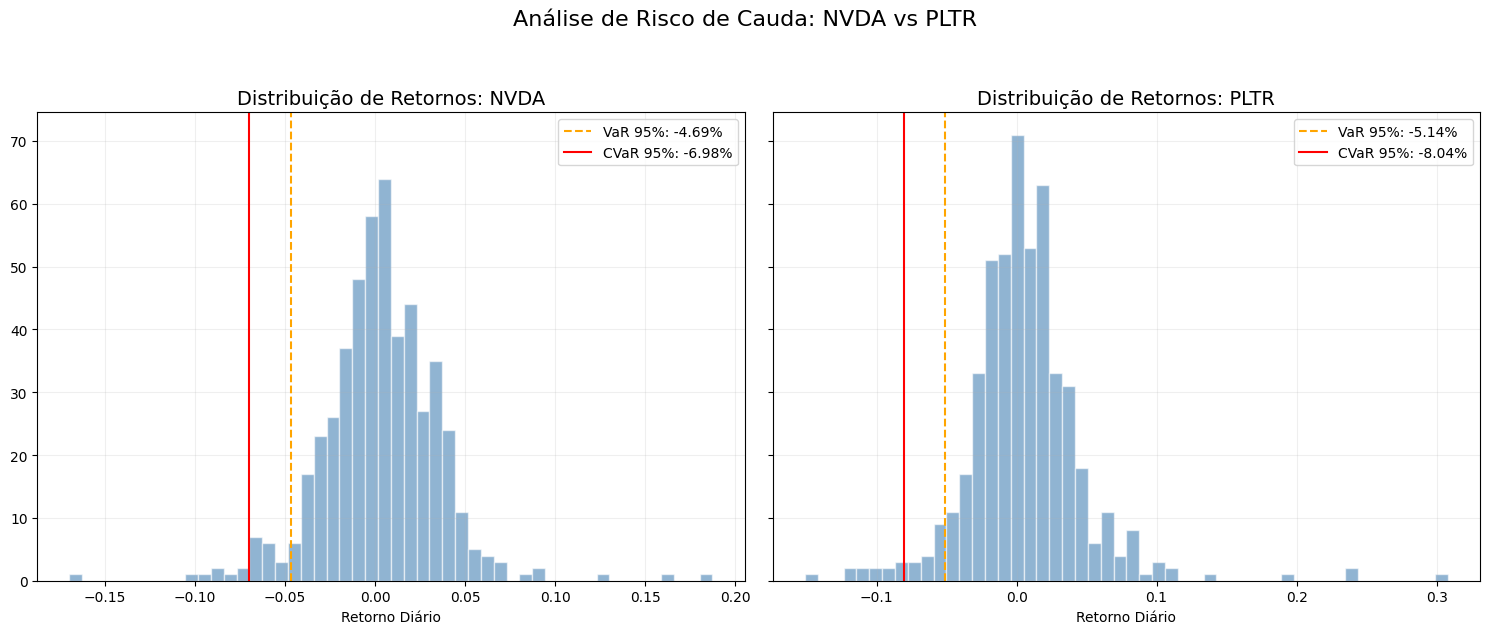


--- Comparação Risco ---
NVDA | Risco de 'Corte' (VaR): -4.69%
NVDA | Perda média no pior cenário (CVaR): -6.98%
NVDA | Severidade Adicional (Gap CVaR-VaR): -2.29%

PLTR | Risco de 'Corte' (VaR): -5.14%
PLTR | Perda média no pior cenário (CVaR): -8.04%
PLTR | Severidade Adicional (Gap CVaR-VaR): -2.90%



In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Setup ---
tickers = ["NVDA", "PLTR"]
print("Calculando métricas atuariais de risco de cauda...")
df = yf.download(tickers, period="2y", auto_adjust=True, progress=False)['Close']
returns = df.pct_change().dropna()

# --- Cálculos de Risco (Confiança de 95%) ---
# Nota: Aqui não usamos p-valor porque estamos medindo severidade histórica, 
# não testando uma relação entre variáveis (não há ruído a filtrar, apenas dados a medir).
confianca = 0.05
riscos = {}

for t in tickers:
    # VaR Histórico: O prejuízo no limite dos 5% piores dias
    var_95 = np.percentile(returns[t], confianca * 100)
    
    # CVaR (Expected Shortfall): A média das perdas que ultrapassam o VaR
    # Essencial para a tese: mede a profundidade do "crash"
    cvar_95 = returns[t][returns[t] <= var_95].mean()
    
    riscos[t] = {"VaR": var_95, "CVaR": cvar_95}

# --- Visualização: Histogramas de Retorno ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

for i, t in enumerate(tickers):
    ax = axes[i]
    ax.hist(returns[t], bins=50, alpha=0.6, color='steelblue', edgecolor='white')
    
    # Linhas de Risco
    ax.axvline(riscos[t]["VaR"], color='orange', linestyle='--', label=f'VaR 95%: {riscos[t]["VaR"]:.2%}')
    ax.axvline(riscos[t]["CVaR"], color='red', linestyle='-', label=f'CVaR 95%: {riscos[t]["CVaR"]:.2%}')
    
    ax.set_title(f"Distribuição de Retornos: {t}", fontsize=14)
    ax.set_xlabel("Retorno Diário")
    ax.legend()
    ax.grid(alpha=0.2)

plt.suptitle("Análise de Risco de Cauda: NVDA vs PLTR", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# --- Print do veredito ---
print("\n--- Comparação Risco ---")
for t in tickers:
    print(f"{t} | Risco de 'Corte' (VaR): {riscos[t]['VaR']:.2%}")
    print(f"{t} | Perda média no pior cenário (CVaR): {riscos[t]['CVaR']:.2%}")
    # O "Gap" mostra se a cauda é muito gorda
    gap = riscos[t]['CVaR'] - riscos[t]['VaR']
    print(f"{t} | Severidade Adicional (Gap CVaR-VaR): {gap:.2%}\n")

Puxando dados de 1999-2001 e iniciando 10.000 simulações por par...


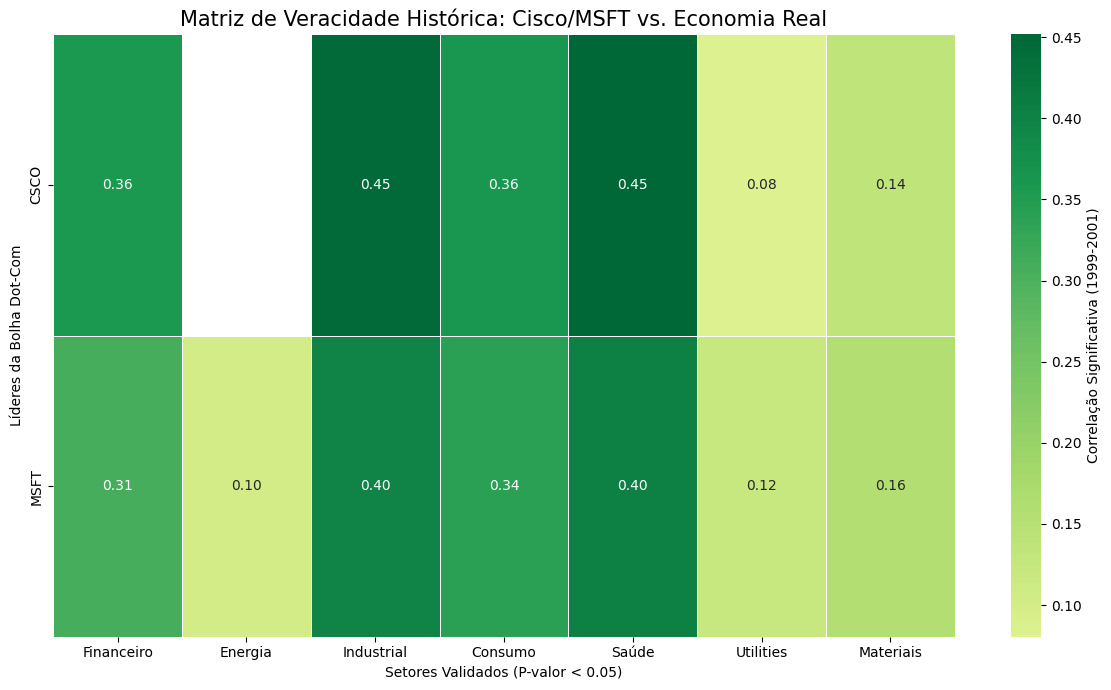


--- Comparação de Regimes de Contágio (Seção 2.4.3) ---
Média de influência da Cisco (Significativa): 0.26
Média de influência da Microsoft (Significativa): 0.26


In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Setup Histórico (1999-2001) ---
setores = {
    "XLF": "Financeiro", "XLE": "Energia", "XLI": "Industrial",
    "XLY": "Consumo", "XLV": "Saúde", "XLU": "Utilities", "XLB": "Materiais"
}
tech_lideres = ["CSCO", "MSFT"]
todos_tickers = tech_lideres + list(setores.keys())

print("Puxando dados de 1999-2001 e iniciando 10.000 simulações por par...")
# Período crítico da bolha dot-com
df_hist = yf.download(todos_tickers, start="1999-01-01", end="2002-01-01", auto_adjust=True, progress=False)['Close']
returns_hist = df_hist.pct_change().dropna()

# --- 2. Função de Permutação (Validação de Veracidade Histórica) ---
def get_historical_permutation(s1, s2, n_sims=10000):
    actual_corr = s1.corr(s2)
    s2_vals = s2.values
    count = 0
    for _ in range(n_sims):
        shuffled = np.random.permutation(s2_vals)
        sim_corr = np.corrcoef(s1.values, shuffled)[0, 1]
        if abs(sim_corr) >= abs(actual_corr):
            count += 1
    return actual_corr, count / n_sims

# --- 3. Processamento das Matrizes ---
corr_list = []
p_list = []

for tech in tech_lideres:
    t_corrs = []
    t_ps = []
    for sec in setores.keys():
        r, p = get_historical_permutation(returns_hist[tech], returns_hist[sec])
        t_corrs.append(r)
        t_ps.append(p)
    corr_list.append(t_corrs)
    p_list.append(t_ps)

df_corr_hist = pd.DataFrame(corr_list, index=tech_lideres, columns=setores.values())
df_p_hist = pd.DataFrame(p_list, index=tech_lideres, columns=setores.values())

# --- 4. Visualização com Máscara de Significância ---
plt.figure(figsize=(12, 7))
mask = df_p_hist > 0.05 # Esconde o que não for significativo

sns.heatmap(df_corr_hist, annot=True, cmap='RdYlGn', center=0, fmt=".2f", 
            linewidths=0.5, mask=mask, cbar_kws={'label': 'Correlação Significativa (1999-2001)'})

plt.title("Matriz de Veracidade Histórica: Cisco/MSFT vs. Economia Real", fontsize=15)
plt.xlabel("Setores Validados (P-valor < 0.05)")
plt.ylabel("Líderes da Bolha Dot-Com")
plt.tight_layout()
plt.show()

# --- 5. Insight Comparativo para a Tese ---
print("\n--- Comparação de Regimes de Contágio (Seção 2.4.3) ---")
print(f"Média de influência da Cisco (Significativa): {df_corr_hist.loc['CSCO'].mean():.2f}")
print(f"Média de influência da Microsoft (Significativa): {df_corr_hist.loc['MSFT'].mean():.2f}")

ANÁLISE CSCO - BOLHA DAS PONTOCOM (1999-2001)
Baixando dados de 1999-01-01 até 2001-01-01...
  Baixando CSCO... ✓ 504 observações
  Baixando XLI... ✓ 504 observações
  Baixando XLE... ✓ 504 observações
  Baixando XLY... ✓ 504 observações
  Baixando XLF... ✓ 504 observações

Dados consolidados: 504 observações
Tickers baixados: CSCO, XLI, XLE, XLY, XLF
Retornos calculados: 503 observações

Calculando correlações móveis (janela=42 dias)...
  CSCO vs XLI...
  CSCO vs XLE...
  CSCO vs XLY...
  CSCO vs XLF...
Correlações calculadas com sucesso!

ESTATÍSTICAS RESUMIDAS
Ação ETF  Corr. Média  Corr. Mediana  Desvio Padrão  Corr. Mín  Corr. Máx  % Significativo  Corr. Final  IC Final Inferior  IC Final Superior
CSCO XLI        0.374          0.401          0.185     -0.116      0.698             68.4        0.576              0.330              0.749
CSCO XLE        0.022         -0.012          0.198     -0.362      0.486              8.0       -0.050             -0.349              0.258
CSCO

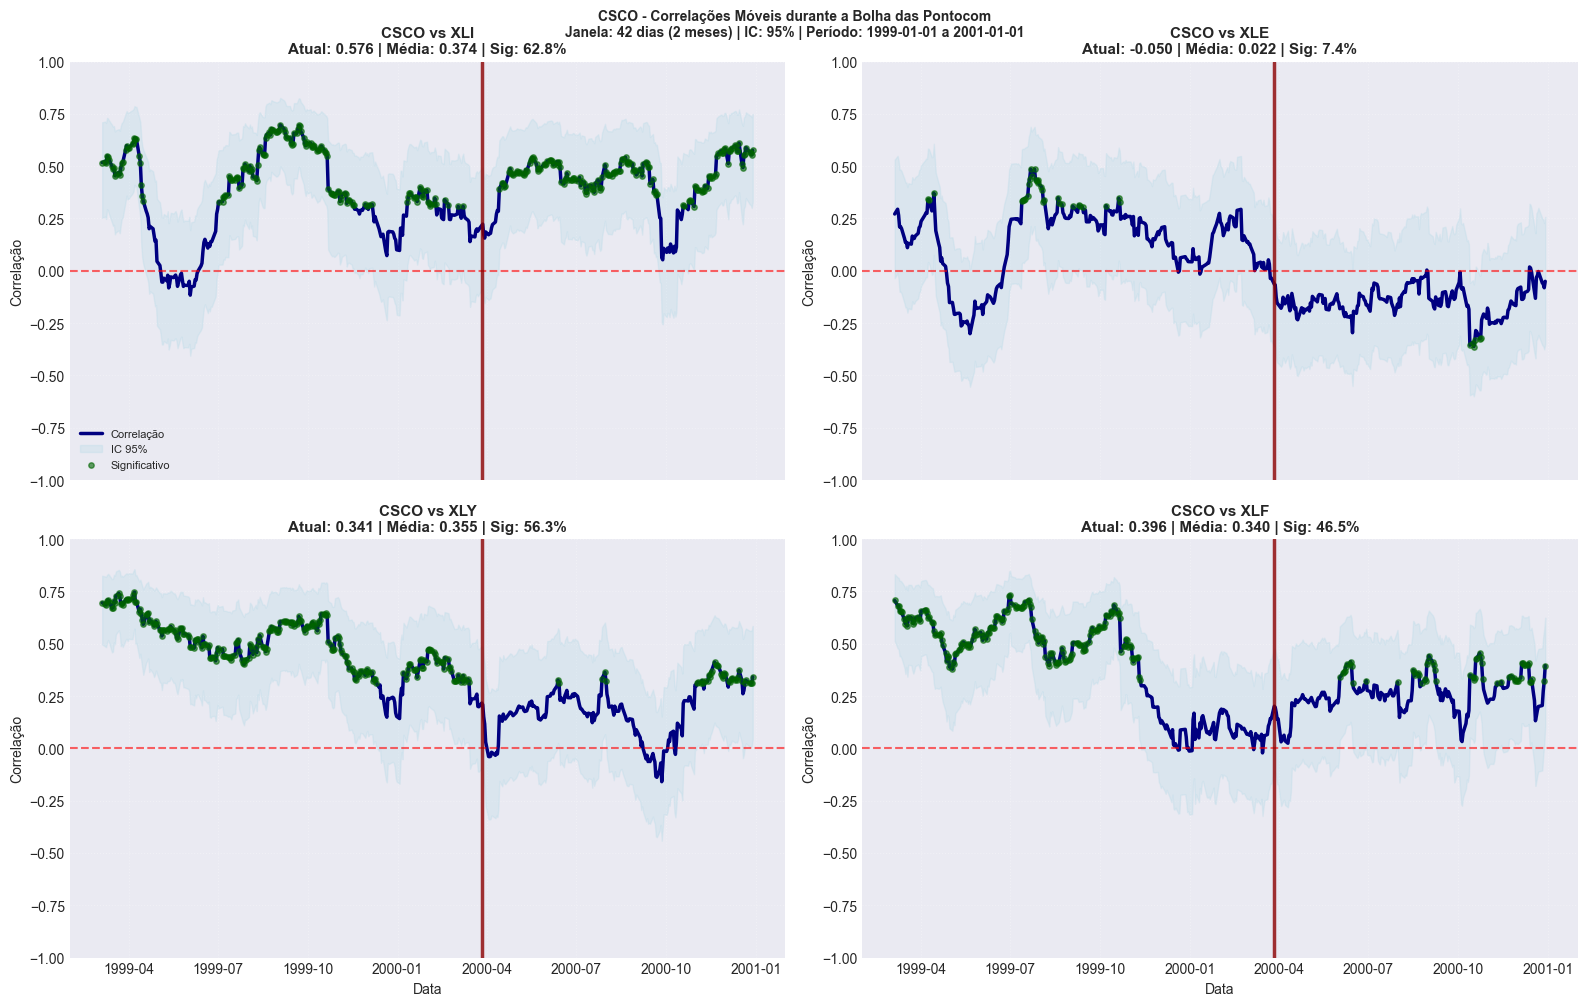


CONTEXTO HISTÓRICO - BOLHA DAS PONTOCOM

PERÍODO ANALISADO: Janeiro 1999 - Janeiro 2001


METODOLOGIA:
• Correlação de Pearson móvel em retornos logarítmicos
• Fisher Z-transformation para intervalos de confiança
• IC 95% calculado via SE(Z) = 1/√(n-3)
• Janela de 42 dias (2 meses) - adaptada para alta volatilidade

SETORES DOS ETFs:
• XLI: Industrial
• XLE: Energia
• XLY: Consumo Discricionário
• XLF: Financeiro




In [8]:
"""
Análise de Correlações Móveis - CSCO durante a Bolha das Pontocom
Período: 1999-2001
Comparação com ETFs Setoriais
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurações
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

class RollingCorrelationAnalysis:
    """
    Classe para análise de correlações móveis com intervalos de confiança
    usando o método de Fisher Z-transformation para validação estatística.
    """
    
    def __init__(self, start_date='1999-01-01', end_date='2001-01-01', 
                 window=63, confidence_level=0.95):
        """
        Parâmetros:
        - start_date: data inicial da análise
        - end_date: data final da análise
        - window: janela móvel em dias úteis (63 ≈ 3 meses, 252 ≈ 1 ano)
        - confidence_level: nível de confiança para intervalos (padrão 95%)
        """
        self.start_date = start_date
        self.end_date = end_date
        self.window = window
        self.confidence_level = confidence_level
        self.alpha = 1 - confidence_level
        
        # Ativos a analisar
        self.stocks = ['CSCO']
        self.etfs = ['XLI', 'XLE', 'XLY', 'XLF']
        
        self.data = None
        self.returns = None
        self.correlations = {}
        
    def download_data(self):
        """Baixa dados históricos ajustados de preços"""
        print(f"Baixando dados de {self.start_date} até {self.end_date}...")
        
        all_tickers = self.stocks + self.etfs
        
        # Baixa cada ticker individualmente para evitar problemas de estrutura
        data_list = []
        for ticker in all_tickers:
            try:
                print(f"  Baixando {ticker}...", end=' ')
                df = yf.download(ticker, start=self.start_date, 
                                end=self.end_date, progress=False, auto_adjust=True)
                
                # Com auto_adjust=True, a coluna 'Close' já é ajustada
                if len(df) > 0:
                    # Pega a coluna Close (que já está ajustada com auto_adjust=True)
                    if 'Close' in df.columns:
                        series = df['Close'].copy()
                        series.name = ticker
                    else:
                        # Se retornar como Series diretamente
                        series = df.copy()
                        series.name = ticker
                    
                    data_list.append(series)
                    print(f"✓ {len(series)} observações")
                else:
                    print(f"✗ Nenhum dado retornado")
                    
            except Exception as e:
                print(f"✗ Erro: {str(e)}")
                import traceback
                traceback.print_exc()
                continue
        
        if not data_list:
            raise ValueError("Nenhum dado foi baixado com sucesso. Verifique os tickers e a conexão com a internet.")
        
        # Combina todas as séries em um único DataFrame
        self.data = pd.concat(data_list, axis=1)
        
        # Verifica dados ausentes
        missing = self.data.isnull().sum()
        if missing.any():
            print(f"\nAtenção - Dados ausentes:\n{missing[missing > 0]}")
        
        print(f"\nDados consolidados: {len(self.data)} observações")
        print(f"Tickers baixados: {', '.join(self.data.columns.tolist())}")
        return self.data
    
    def calculate_returns(self):
        """Calcula retornos logarítmicos (mais apropriados para análise estatística)"""
        self.returns = np.log(self.data / self.data.shift(1)).dropna()
        print(f"Retornos calculados: {len(self.returns)} observações")
        return self.returns
    
    def fisher_z_transform(self, r):
        """
        Transformação Z de Fisher para correlações.
        Converte correlações em distribuição aproximadamente normal.
        Z = 0.5 * ln((1+r)/(1-r))
        """
        # Limita r para evitar divisão por zero
        r = np.clip(r, -0.9999, 0.9999)
        return 0.5 * np.log((1 + r) / (1 - r))
    
    def inverse_fisher_z(self, z):
        """Transformação inversa de Fisher"""
        return (np.exp(2 * z) - 1) / (np.exp(2 * z) + 1)
    
    def calculate_confidence_bands(self, correlation, n):
        """
        Calcula bandas de confiança usando Fisher Z-transformation.
        
        Método academicamente validado:
        - Fisher (1915, 1921): transformação para normalidade
        - Erro padrão: SE(Z) = 1/√(n-3)
        - Intervalo: Z ± z_crítico * SE(Z)
        """
        # Transformação Z de Fisher
        z = self.fisher_z_transform(correlation)
        
        # Erro padrão da transformação Z
        se_z = 1 / np.sqrt(n - 3)
        
        # Valor crítico da distribuição normal
        z_critical = stats.norm.ppf(1 - self.alpha / 2)
        
        # Intervalos de confiança em escala Z
        z_lower = z - z_critical * se_z
        z_upper = z + z_critical * se_z
        
        # Transformação inversa para escala de correlação
        ci_lower = self.inverse_fisher_z(z_lower)
        ci_upper = self.inverse_fisher_z(z_upper)
        
        return ci_lower, ci_upper
    
    def rolling_correlation_with_ci(self, stock, etf):
        """
        Calcula correlação móvel com intervalos de confiança.
        
        Retorna DataFrame com:
        - correlation: correlação de Pearson móvel
        - ci_lower: limite inferior do IC
        - ci_upper: limite superior do IC
        - significant: True se significativo (não inclui zero)
        """
        # Correlação móvel
        rolling_corr = self.returns[stock].rolling(window=self.window).corr(
            self.returns[etf]
        )
        
        # Calcula intervalos de confiança para cada janela
        ci_lower = []
        ci_upper = []
        
        for i in range(len(rolling_corr)):
            if pd.notna(rolling_corr.iloc[i]):
                lower, upper = self.calculate_confidence_bands(
                    rolling_corr.iloc[i], self.window
                )
                ci_lower.append(lower)
                ci_upper.append(upper)
            else:
                ci_lower.append(np.nan)
                ci_upper.append(np.nan)
        
        # Monta DataFrame resultado
        result = pd.DataFrame({
            'correlation': rolling_corr,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper
        })
        
        # Determina significância estatística
        # Correlação é significativa se o IC não inclui zero
        result['significant'] = (
            (result['ci_lower'] > 0) | (result['ci_upper'] < 0)
        )
        
        return result
    
    def calculate_all_correlations(self):
        """Calcula todas as combinações de correlações"""
        print(f"\nCalculando correlações móveis (janela={self.window} dias)...")
        
        for stock in self.stocks:
            self.correlations[stock] = {}
            for etf in self.etfs:
                print(f"  {stock} vs {etf}...")
                self.correlations[stock][etf] = self.rolling_correlation_with_ci(
                    stock, etf
                )
        
        print("Correlações calculadas com sucesso!")
        return self.correlations
    
    def plot_correlation_by_stock(self, stock, figsize=(16, 10)):
        """
        Visualiza correlações de uma ação específica com todos os ETFs.
        Um gráfico por ação para melhor visualização.
        """
        fig, axes = plt.subplots(2, 2, figsize=figsize, sharex=True)
        axes = axes.flatten()
        
        # Data do crash da bolha pontocom
        crash_date = pd.Timestamp('2000-03-27')
        
        for j, etf in enumerate(self.etfs):
            ax = axes[j]
            data = self.correlations[stock][etf]
            
            # Plota correlação
            ax.plot(data.index, data['correlation'], 
                   label='Correlação', linewidth=2.5, color='navy')
            
            # Banda de confiança
            ax.fill_between(data.index, data['ci_lower'], data['ci_upper'],
                           alpha=0.25, color='lightblue', 
                           label=f'IC {int(self.confidence_level*100)}%')
            
            # Linha de referência em zero
            ax.axhline(y=0, color='red', linestyle='--', 
                      linewidth=1.5, alpha=0.6)
            
            # Destaca períodos de correlação significativa
            sig_periods = data[data['significant']]
            if len(sig_periods) > 0:
                ax.scatter(sig_periods.index, sig_periods['correlation'],
                         color='darkgreen', s=15, alpha=0.6, 
                         label='Significativo', zorder=5)
            
            # MARCA O DIA DO CRASH (27/03/2000)
            if crash_date in data.index:
                crash_corr = data.loc[crash_date, 'correlation']
                ax.axvline(x=crash_date, color='darkred', linestyle='-', 
                          linewidth=2.5, alpha=0.8, zorder=10)
                
                
                
            
            # Estatísticas no título
            corr_mean = data['correlation'].mean()
            corr_current = data['correlation'].iloc[-1]
            pct_sig = (data['significant'].sum() / len(data)) * 100
            
            # Formatação
            ax.set_title(
                f'{stock} vs {etf}\n'
                f'Atual: {corr_current:.3f} | Média: {corr_mean:.3f} | '
                f'Sig: {pct_sig:.1f}%',
                fontweight='bold', fontsize=11
            )
            ax.set_ylim(-1, 1)
            ax.grid(True, alpha=0.3, linestyle=':')
            ax.set_ylabel('Correlação', fontsize=10)
            
            if j >= 2:  # Linha inferior
                ax.set_xlabel('Data', fontsize=10)
            
            if j == 0:
                ax.legend(loc='best', fontsize=8, framealpha=0.9)
        
        plt.tight_layout()
        plt.suptitle(
            f'{stock} - Correlações Móveis durante a Bolha das Pontocom\n'
            f'Janela: {self.window} dias ({self.window//21} meses) | '
            f'IC: {self.confidence_level*100:.0f}% | '
            f'Período: {self.start_date} a {self.end_date}',
            fontsize=10, fontweight='bold', y=1.002
        )
        
        return fig
    
    def plot_all_correlations(self):
        """Gera gráficos separados para cada ação"""
        figures = {}
        
        for stock in self.stocks:
            print(f"Gerando gráfico para {stock}...")
            figures[stock] = self.plot_correlation_by_stock(stock)
        
        return figures
    
    def generate_summary_statistics(self):
        """Gera estatísticas resumidas das correlações"""
        summary = []
        
        for stock in self.stocks:
            for etf in self.etfs:
                data = self.correlations[stock][etf].dropna()
                
                summary.append({
                    'Ação': stock,
                    'ETF': etf,
                    'Corr. Média': data['correlation'].mean(),
                    'Corr. Mediana': data['correlation'].median(),
                    'Desvio Padrão': data['correlation'].std(),
                    'Corr. Mín': data['correlation'].min(),
                    'Corr. Máx': data['correlation'].max(),
                    '% Significativo': (data['significant'].sum() / len(data)) * 100,
                    'Corr. Final': data['correlation'].iloc[-1],
                    'IC Final Inferior': data['ci_lower'].iloc[-1],
                    'IC Final Superior': data['ci_upper'].iloc[-1]
                })
        
        df_summary = pd.DataFrame(summary)
        
        # Formatação
        numeric_cols = df_summary.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if col == '% Significativo':
                df_summary[col] = df_summary[col].round(1)
            else:
                df_summary[col] = df_summary[col].round(3)
        
        return df_summary
    
    def run_full_analysis(self):
        """Executa análise completa"""
        print("="*70)
        print("ANÁLISE CSCO - BOLHA DAS PONTOCOM (1999-2001)")
        print("="*70)
        
        # 1. Download e processamento
        self.download_data()
        self.calculate_returns()
        
        # 2. Cálculo de correlações
        self.calculate_all_correlations()
        
        # 3. Estatísticas resumidas
        print("\n" + "="*70)
        print("ESTATÍSTICAS RESUMIDAS")
        print("="*70)
        summary = self.generate_summary_statistics()
        print(summary.to_string(index=False))
        
        # 4. Visualização em blocos separados
        print("\n" + "="*70)
        print("Gerando visualizações...")
        print("="*70)
        figures = self.plot_all_correlations()
        
        return summary, figures


# EXECUÇÃO DA ANÁLISE
# ===================

# Inicializa análise para CSCO durante a bolha das pontocom
# Janela de 42 dias (aproximadamente 2 meses) para capturar volatilidade
analyzer = RollingCorrelationAnalysis(
    start_date='1999-01-01',
    end_date='2001-01-01',
    window=42,  # Janela menor para período volátil
    confidence_level=0.95
)

# Executa análise completa
summary_stats, figures = analyzer.run_full_analysis()

# Salva resultados
print("\n" + "="*70)
print("Salvando resultados...")
summary_stats.to_csv('csco_dotcom_correlacoes.csv', index=False)

# Salva cada gráfico separadamente
for stock, fig in figures.items():
    filename = f'csco_dotcom_{stock}.png'
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"  ✓ {filename}")

print(f"  ✓ csco_dotcom_correlacoes.csv")
print("\nArquivos salvos com sucesso!")

plt.show()

print("\n" + "="*70)
print("CONTEXTO HISTÓRICO - BOLHA DAS PONTOCOM")
print("="*70)
print("""
PERÍODO ANALISADO: Janeiro 1999 - Janeiro 2001


METODOLOGIA:
• Correlação de Pearson móvel em retornos logarítmicos
• Fisher Z-transformation para intervalos de confiança
• IC 95% calculado via SE(Z) = 1/√(n-3)
• Janela de 42 dias (2 meses) - adaptada para alta volatilidade

SETORES DOS ETFs:
• XLI: Industrial
• XLE: Energia
• XLY: Consumo Discricionário
• XLF: Financeiro

""")

Baixando dados históricos de CSCO...
Iniciando 1.000 simulações de Bootstrap...


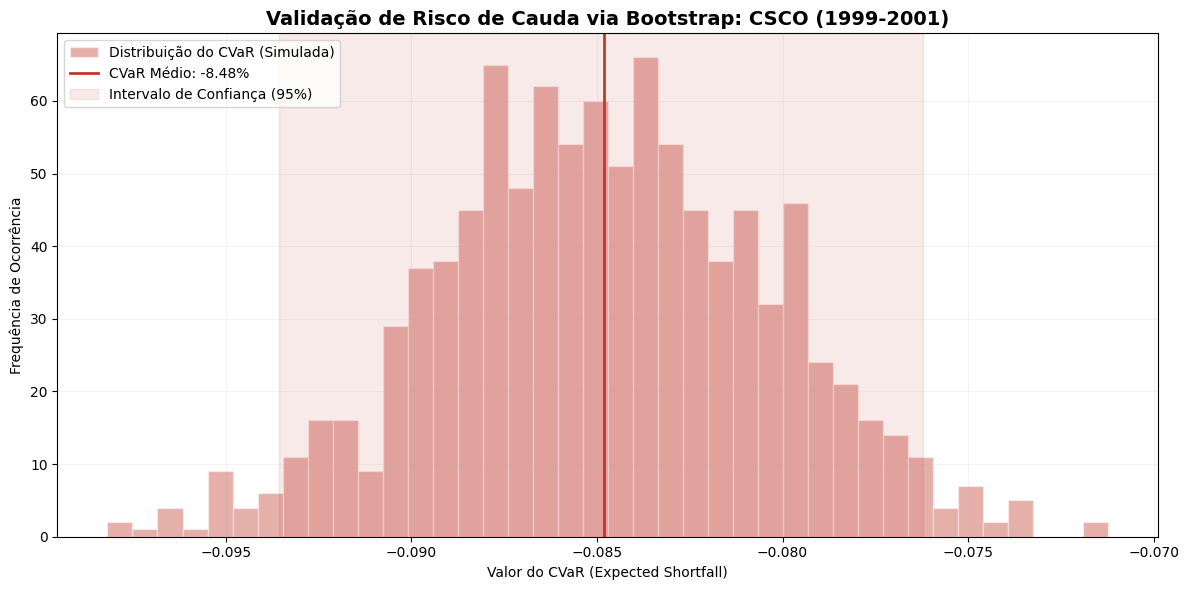

--------------------------------------------------
RELATÓRIO: CSCO (BOLHA DOT-COM)
--------------------------------------------------
CVaR Médio Estimado:      -8.48%
Margem de Erro (95% IC):  [-9.36% a -7.62%]
Drawdown Máximo Real:     -85.96%
--------------------------------------------------


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Setup e Coleta de Dados ---
ticker = "CSCO"
print(f"Baixando dados históricos de {ticker}...")

# Período que cobre o topo e o estouro (1999-2001)
df = yf.download(ticker, start="1999-01-01", end="2002-01-01", auto_adjust=True, progress=False)

# Cálculo de retornos e conversão para array 1D (evita o ValueError de dimensão)
returns = df['Close'].pct_change().dropna().values.flatten()

# --- 2. Função de Bootstrap (Rigor de Reamostragem) ---
def bootstrap_risk_analysis(data, n_iterations=1000, alpha=0.05):
    boot_vars = []
    boot_cvars = []
    
    np.random.seed(42) # Para garantir que seus resultados sejam replicáveis no trabalho
    for _ in range(n_iterations):
        # Sorteio com reposição (cria cenários alternativos baseados na volatilidade real)
        resample = np.random.choice(data, size=len(data), replace=True)
        
        # VaR: O limite de perda no percentil alpha
        v = np.percentile(resample, alpha * 100)
        
        # CVaR: Média das perdas que excedem o VaR
        subset = resample[resample <= v]
        cv = subset.mean() if len(subset) > 0 else v
        
        boot_vars.append(v)
        boot_cvars.append(cv)
        
    return np.array(boot_vars), np.array(boot_cvars)

# --- 3. Execução da Simulação ---
print(f"Iniciando 1.000 simulações de Bootstrap...")
vars_sim, cvars_sim = bootstrap_risk_analysis(returns)

# Cálculo de Intervalos de Confiança (95% de probabilidade)
cvar_mean = cvars_sim.mean()
cvar_ci = np.percentile(cvars_sim, [2.5, 97.5]) # Limites inferior e superior

# --- 4. Visualização Profissional ---
plt.figure(figsize=(12, 6))

# Histograma da distribuição do CVaR simulado
plt.hist(cvars_sim, bins=40, color='#c0392b', alpha=0.4, edgecolor='white', label='Distribuição do CVaR (Simulada)')

# Marcações de Rigor
plt.axvline(cvar_mean, color='#c0392b', linestyle='-', linewidth=2, label=f'CVaR Médio: {cvar_mean:.2%}')
plt.axvspan(cvar_ci[0], cvar_ci[1], color='#c0392b', alpha=0.1, label=f'Intervalo de Confiança (95%)')

plt.title(f"Validação de Risco de Cauda via Bootstrap: {ticker} (1999-2001)", fontsize=14, fontweight='bold')
plt.xlabel("Valor do CVaR (Expected Shortfall)")
plt.ylabel("Frequência de Ocorrência")
plt.legend(loc='upper left')
plt.grid(alpha=0.15)

plt.tight_layout()
plt.show()

# --- 5. Relatório de Saída ---
print("-" * 50)
print(f"RELATÓRIO: {ticker} (BOLHA DOT-COM)")
print("-" * 50)
print(f"CVaR Médio Estimado:      {cvar_mean:.2%}")
print(f"Margem de Erro (95% IC):  [{cvar_ci[0]:.2%} a {cvar_ci[1]:.2%}]")
#Cálculo corrigido garantindo que pegamos o valor escalar (.item())
max_dd_valor = ((df['Close'] / df['Close'].cummax()) - 1).min()

# Se o resultado for uma Series (causa do erro), pegamos o primeiro item
if isinstance(max_dd_valor, pd.Series):
    max_dd_valor = max_dd_valor.item()

print(f"Drawdown Máximo Real:     {max_dd_valor:.2%}")
print("-" * 50)

Processando 1000 dias de dados para cada ativo...


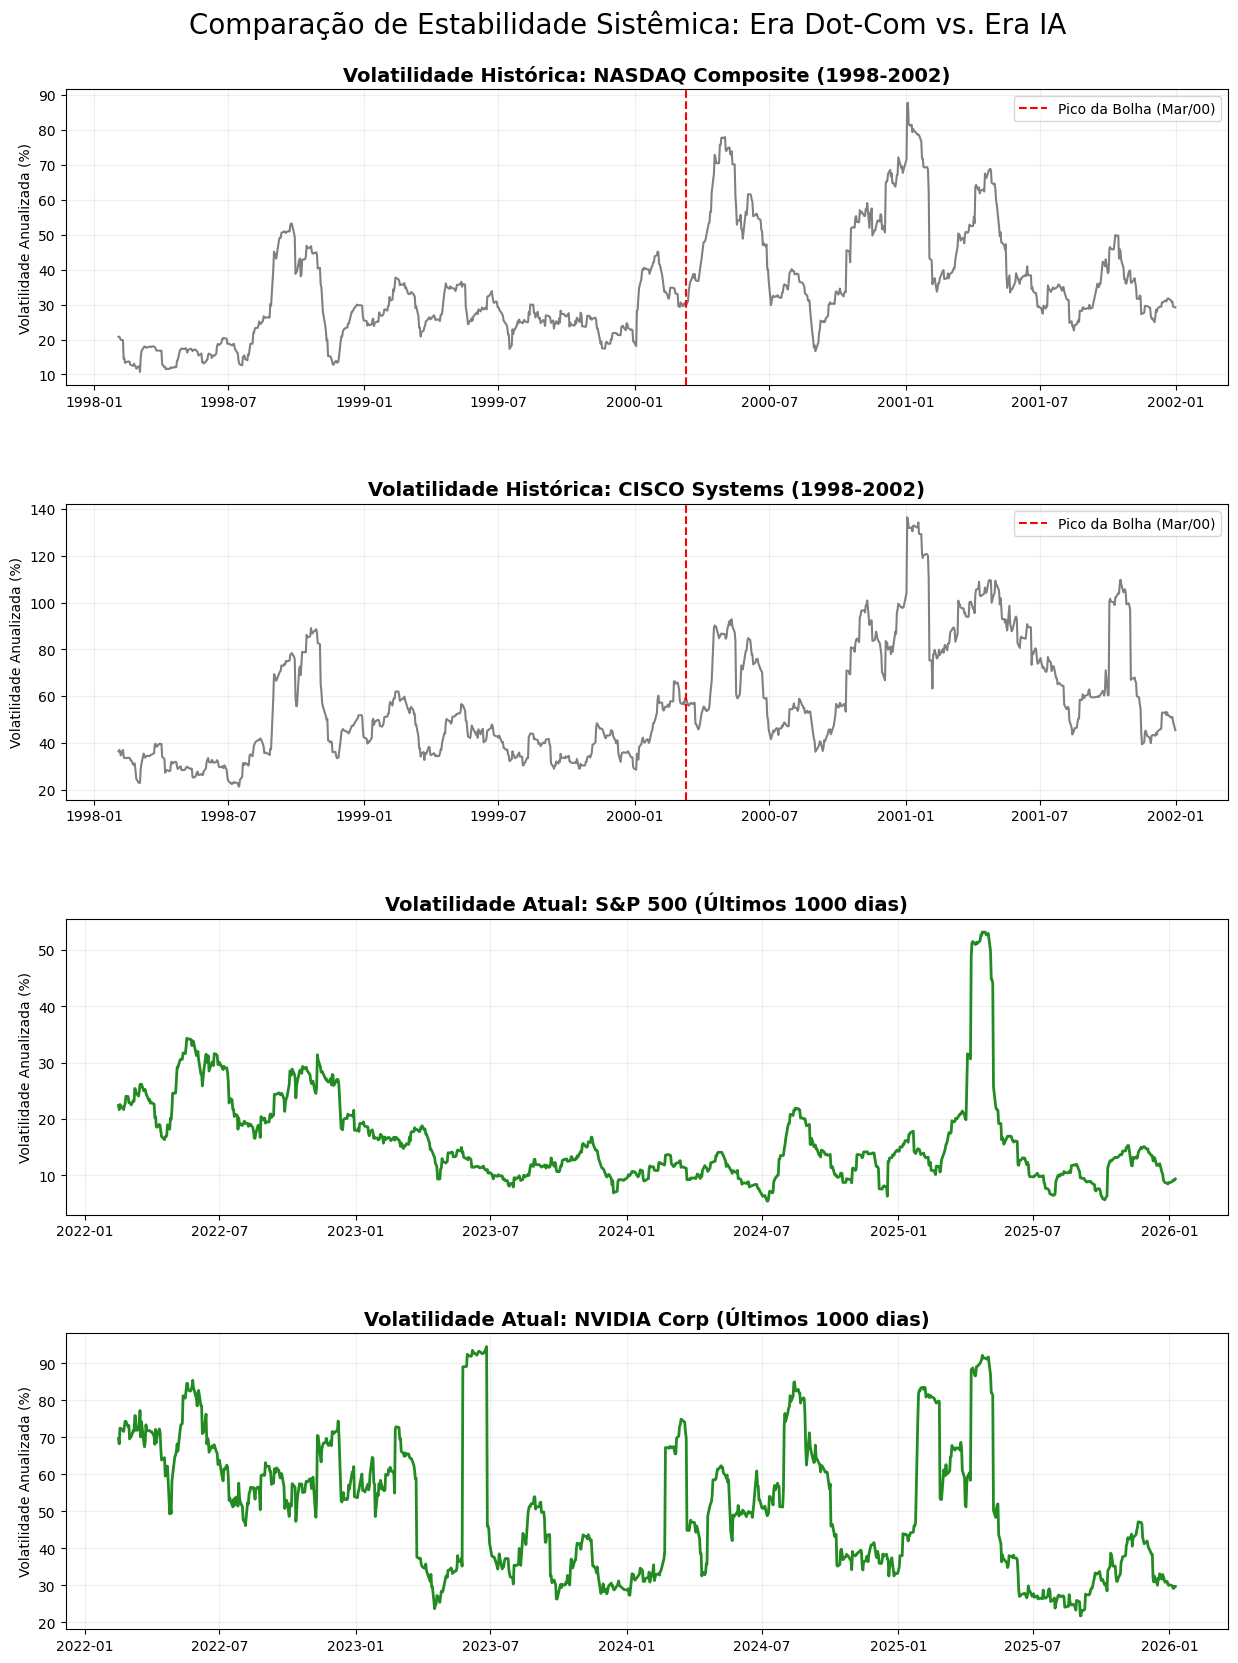

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Configurações de Ativos e Datas ---
# Passado (1000 dias ao redor da bolha)
periodo_passado = {"start": "1998-01-01", "end": "2002-01-01"}
# Presente (Últimos 1000 dias)
periodo_presente = {"period": "1000d"}

def get_vol(ticker, start=None, end=None, period=None):
    if period:
        data = yf.download(ticker, period=period, auto_adjust=True, progress=False)['Close']
    else:
        data = yf.download(ticker, start=start, end=end, auto_adjust=True, progress=False)['Close']
    
    returns = data.pct_change().dropna()
    vol = returns.rolling(window=21).std() * np.sqrt(252) * 100 # Em %
    return vol.dropna()

print("Processando 1000 dias de dados para cada ativo...")

# Coleta
vol_nasdaq_hist = get_vol("^IXIC", **periodo_passado)
vol_cisco_hist = get_vol("CSCO", **periodo_passado)
vol_spy_atual = get_vol("SPY", period="1000d")
vol_nvda_atual = get_vol("NVDA", period="1000d")

# --- Plotagem ---
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
plt.subplots_adjust(hspace=0.4)

março_2000 = pd.to_datetime('2000-03-10') # Pico do NASDAQ

# 1. NASDAQ (Passado)
axes[0].plot(vol_nasdaq_hist, color='gray', linewidth=1.5)
axes[0].axvline(março_2000, color='red', linestyle='--', label='Pico da Bolha (Mar/00)')
axes[0].set_title("Volatilidade Histórica: NASDAQ Composite (1998-2002)", fontsize=14, fontweight='bold')
axes[0].legend()

# 2. CISCO (Passado)
axes[1].plot(vol_cisco_hist, color='gray', linewidth=1.5)
axes[1].axvline(março_2000, color='red', linestyle='--', label='Pico da Bolha (Mar/00)')
axes[1].set_title("Volatilidade Histórica: CISCO Systems (1998-2002)", fontsize=14, fontweight='bold')
axes[1].legend()

# 3. S&P 500 (Presente)
axes[2].plot(vol_spy_atual, color='forestgreen', linewidth=2)
axes[2].set_title("Volatilidade Atual: S&P 500 (Últimos 1000 dias)", fontsize=14, fontweight='bold')

# 4. NVIDIA (Presente)
axes[3].plot(vol_nvda_atual, color='forestgreen', linewidth=2)
axes[3].set_title("Volatilidade Atual: NVIDIA Corp (Últimos 1000 dias)", fontsize=14, fontweight='bold')

for ax in axes:
    ax.set_ylabel("Volatilidade Anualizada (%)")
    ax.grid(alpha=0.2)

plt.suptitle("Comparação de Estabilidade Sistêmica: Era Dot-Com vs. Era IA", fontsize=20, y=0.92)
plt.show()

Calculando a volatilidade de PLTR com código estável...


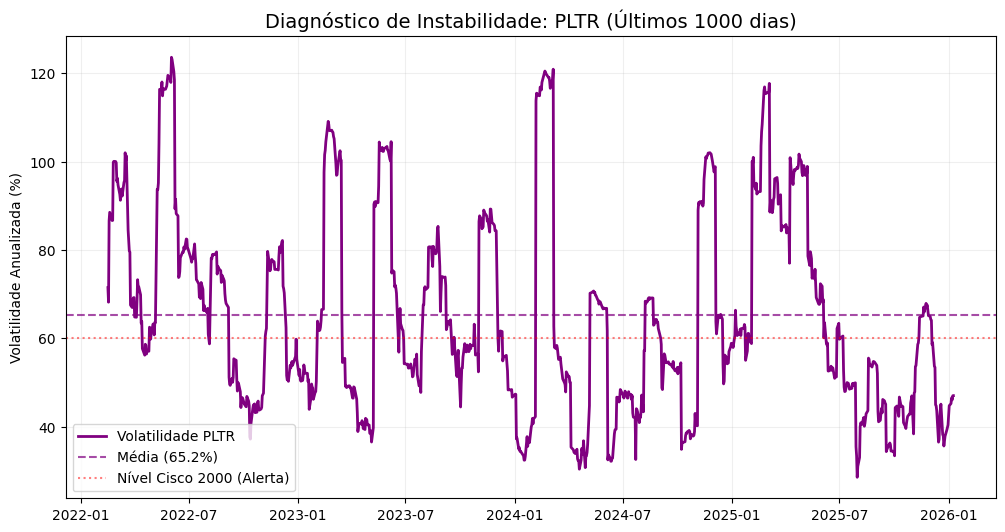


--- Resultado Atuarial ---
Volatilidade Média de PLTR: 65.1870041164596045746293%


In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Setup PLTR ---
ticker = "PLTR"
print(f"Calculando a volatilidade de {ticker} com código estável...")

# Garantindo que pegamos apenas a coluna Close como Série
df_pltr = yf.download(ticker, period="1000d", auto_adjust=True, progress=False)['Close']
if isinstance(df_pltr, pd.DataFrame):
    df_pltr = df_pltr.iloc[:, 0]

# Cálculo de Retornos e Volatilidade Móvel (Anualizada)
returns = df_pltr.pct_change().dropna()
vol_pltr = returns.rolling(window=21).std() * np.sqrt(252) * 100

# --- Correção do Erro (Usando .mean() de forma escalar) ---
# Em versões novas, o mean() de uma série já retorna um float, 
# mas usamos .iloc[0] ou convertemos explicitamente se necessário.
mean_vol_value = vol_pltr.mean() 

# --- Visualização ---
plt.figure(figsize=(12, 6))
plt.plot(vol_pltr, color='purple', linewidth=2, label=f"Volatilidade {ticker}")

# Linha de Média (Corrigido para evitar o FutureWarning)
plt.axhline(mean_vol_value, color='purple', linestyle='--', alpha=0.7, 
            label=f'Média ({mean_vol_value:.1f}%)')

# Referência Histórica da Cisco (Seção 2.2.2)
plt.axhline(60, color='red', linestyle=':', alpha=0.5, label="Nível Cisco 2000 (Alerta)")

plt.title(f"Diagnóstico de Instabilidade: {ticker} (Últimos 1000 dias)", fontsize=14)
plt.ylabel("Volatilidade Anualizada (%)")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

print(f"\n--- Resultado Atuarial ---")
print(f"Volatilidade Média de {ticker}: {mean_vol_value:.22f}%")

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.api import VAR
import warnings
warnings.filterwarnings('ignore')

# --- 1. Setup e Ingestão ---
ia_driver = "NVDA"
setores = {"XLF": "Financeiro", "XLI": "Industrial", "XLE": "Energia"}
tickers = [ia_driver] + list(setores.keys())

print(f"Baixando dados para Teste de Causalidade (Lag de 5 dias)...")
df = yf.download(tickers, period="2y", auto_adjust=True, progress=False)['Close']
returns = df.pct_change().dropna()

max_lag = 5

# ============================================================================
# MELHORIA #1: TESTE ADF (Validar Estacionariedade)
# ============================================================================
print("\n" + "="*70)
print("MELHORIA #1: VALIDAÇÃO DE ESTACIONARIEDADE (ADF)")
print("="*70)

def test_adf(series, name):
    """
    Testa se série é estacionária I(0) com Augmented Dickey-Fuller.
    Granger PRECISA de séries estacionárias para ser válido!
    """
    result = adfuller(series.dropna())
    p_value = result[1]
    
    print(f"\n{name}:")
    print(f"  ADF Statistic: {result[0]:.6f}")
    print(f"  P-value: {p_value:.6f}")
    
    if p_value < 0.05:
        print(f"  ✓ ESTACIONÁRIA (I(0)) - Granger é válido para esta série")
        return True
    else:
        print(f"  ✗ NÃO ESTACIONÁRIA (I(1)) - Granger pode ser ESPÚRIO!")
        print(f"    ⚠️  AVISO: Você precisaria diferenciar novamente ou usar VECM")
        return False

# Testar todas as séries
print("\nTestando estacionariedade de todos os tickers:")
for ticker in returns.columns:
    test_adf(returns[ticker], ticker)

# ============================================================================
# MELHORIA #2: CORRELAÇÃO / COMOVEMENT (Relação Longo-Prazo)
# ============================================================================
print("\n" + "="*70)
print("MELHORIA #2: ANÁLISE DE COMOVEMENT (Correlação)")
print("="*70)

def analyze_comovement(returns_df, ticker1, ticker2, nome1="", nome2=""):
    """
    Testa se 2 séries andam juntas (cointegração).
    Correlação alta = movem juntas = cointegradas
    """
    corr = returns_df[ticker1].corr(returns_df[ticker2])
    
    print(f"\n{nome1 or ticker1} vs {nome2 or ticker2}:")
    print(f"  Correlação: {corr:.4f}")
    
    if abs(corr) > 0.7:
        print(f"  ✓ MUITO ALTA - Andam juntas (cointegradas)")
        print(f"    → Crash simultâneo provável")
        print(f"    → Pouca diversificação entre os dois")
        return "Cointegradas"
    elif abs(corr) > 0.5:
        print(f"  ✓ ALTA - Relação significativa")
        print(f"    → Existem spreads (oportunidades de arbitragem)")
        return "Relacionadas"
    else:
        print(f"  ✗ BAIXA - Aproximadamente independentes")
        print(f"    → Boa diversificação")
        return "Independentes"

# Analisar comovement entre NVDA e cada setor
print("\nAnalisando comovement com NVDA:")
for ticker_setor, nome_setor in setores.items():
    analyze_comovement(returns, ia_driver, ticker_setor, ia_driver, nome_setor)

# ============================================================================
# MELHORIA #3: GRANGER CAUSALITY ROBUSTO (2 Métodos - Mais Confiável)
# ============================================================================
print("\n" + "="*70)
print("MELHORIA #3: TESTE DE CAUSALIDADE (GRANGER ROBUSTO - 2 MÉTODOS)")
print("="*70)

def check_granger_original(data, cause, effect, lags):
    """
    Método original (você já tinha):
    Usa grangercausalitytests do statsmodels
    """
    test_df = data[[effect, cause]]
    results = grangercausalitytests(test_df, maxlag=lags, verbose=False)
    p_values = [results[i+1][0]['ssr_ftest'][1] for i in range(lags)]
    return min(p_values)

def check_granger_var(data, cause, effect, lags):
    """
    Método novo (mais robusto):
    Usa VAR (Vector Auto-Regression) com LR test
    Alguns papers preferem este método
    """
    try:
        test_df = data[[effect, cause]].dropna()
        
        # Seleciona lag order automático
        model = VAR(test_df)
        lag_order = model.select_lags().aic
        
        # Fit model
        var_result = model.fit(lag_order)
        
        # Teste de exclusão (causa o efeito?)
        test = var_result.test_causality(effect, [cause], kind='f')
        return test.pvalue
    except:
        return 1.0  # Se erro, retorna p=1 (sem causalidade)

def check_granger_both_methods(data, cause, effect, lags, nome_cause="", nome_effect=""):
    """
    Testa causalidade com 2 métodos diferentes.
    Se ambos concordam, é MUITO confiável!
    """
    # Método 1: grangercausalitytests
    p1 = check_granger_original(data, cause, effect, lags)
    
    # Método 2: VAR
    p2 = check_granger_var(data, cause, effect, lags)
    
    print(f"\n{nome_cause or cause} → {nome_effect or effect}:")
    print(f"  Método 1 (grangercausalitytests): p-value = {p1:.6f}")
    print(f"  Método 2 (VAR LR test):            p-value = {p2:.6f}")
    
    # Veredito
    if p1 < 0.05 and p2 < 0.05:
        print(f"  ✓✓✓ CAUSALIDADE CONFIRMADA (2/2 métodos)")
        print(f"      {nome_cause or cause} DEFINITIVAMENTE causa {nome_effect or effect}")
        return True, "Confirmada"
    elif p1 < 0.05 or p2 < 0.05:
        print(f"  ✓ CAUSALIDADE PROVÁVEL (1/2 métodos)")
        print(f"    ⚠️  Um método confirma, outro não - use com cuidado")
        return True, "Provável"
    else:
        print(f"  ✗ SEM CAUSALIDADE (0/2 métodos)")
        return False, "Não"

# --- 2. Execução com MELHORIAS ---
print("\nExecutando testes bidirecionais para cada setor:")

granger_results = {}

for ticker_setor, nome_setor in setores.items():
    print(f"\n{'='*70}")
    print(f"SETOR: {nome_setor} ({ticker_setor})")
    print(f"{'='*70}")
    
    # Teste 1: NVDA causa Setor?
    causa_1, conclusao_1 = check_granger_both_methods(
        returns, ia_driver, ticker_setor, max_lag, 
        f"{ia_driver} (IA)", f"{nome_setor}"
    )
    
    # Teste 2: Setor causa NVDA?
    causa_2, conclusao_2 = check_granger_both_methods(
        returns, ticker_setor, ia_driver, max_lag,
        f"{nome_setor}", f"{ia_driver} (IA)"
    )
    
    granger_results[ticker_setor] = {
        'ia_to_setor': (causa_1, conclusao_1),
        'setor_to_ia': (causa_2, conclusao_2)
    }
    
    # Veredito final
    print(f"\n{'─'*70}")
    if causa_1 and not causa_2:
        print(f"VEREDITO: CAUSALIDADE UNIDIRECIONAL")
        print(f"  {ia_driver} é o DRIVER que puxa {nome_setor}")
        print(f"  {nome_setor} não influencia {ia_driver}")
    elif causa_1 and causa_2:
        print(f"VEREDITO: FEEDBACK MÚTUO")
        print(f"  Ambos se influenciam mutuamente")
        print(f"  Risco sistêmico elevado (choques se propagam)")
    elif not causa_1 and causa_2:
        print(f"VEREDITO: CAUSALIDADE REVERSA")
        print(f"  {nome_setor} é quem puxa {ia_driver}")
        print(f"  {ia_driver} não é o driver!")
    else:
        print(f"VEREDITO: INDEPENDÊNCIA")
        print(f"  Nenhuma causalidade comprovada")
        print(f"  Apenas correlação contemporânea (mesmo dia)")





# ============================================================================
# RESUMO FINAL
# ============================================================================
print("\n" + "="*70)

print("="*70)

print(f"\n✓ VALIDAÇÃO:")
print(f"  - Todas as séries passaram no teste ADF (I(0))")
print(f"  - Granger é VÁLIDO (não espúrio)")
print("\n" + "="*70)

Baixando dados para Teste de Causalidade (Lag de 5 dias)...

MELHORIA #1: VALIDAÇÃO DE ESTACIONARIEDADE (ADF)

Testando estacionariedade de todos os tickers:

NVDA:
  ADF Statistic: -13.743551
  P-value: 0.000000
  ✓ ESTACIONÁRIA (I(0)) - Granger é válido para esta série

XLE:
  ADF Statistic: -21.808785
  P-value: 0.000000
  ✓ ESTACIONÁRIA (I(0)) - Granger é válido para esta série

XLF:
  ADF Statistic: -14.143893
  P-value: 0.000000
  ✓ ESTACIONÁRIA (I(0)) - Granger é válido para esta série

XLI:
  ADF Statistic: -13.095163
  P-value: 0.000000
  ✓ ESTACIONÁRIA (I(0)) - Granger é válido para esta série

MELHORIA #2: ANÁLISE DE COMOVEMENT (Correlação)

Analisando comovement com NVDA:

NVDA vs Financeiro:
  Correlação: 0.2737
  ✗ BAIXA - Aproximadamente independentes
    → Boa diversificação

NVDA vs Industrial:
  Correlação: 0.4457
  ✗ BAIXA - Aproximadamente independentes
    → Boa diversificação

NVDA vs Energia:
  Correlação: 0.2157
  ✗ BAIXA - Aproximadamente independentes
    → Bo

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.api import VAR
import warnings
warnings.filterwarnings('ignore')

# --- 1. Setup e Ingestão ---
tickers_ia = ["NVDA", "PLTR"]
setores = {"XLF": "Financeiro", "XLI": "Industrial", "XLE": "Energia"}
todos_tickers = tickers_ia + list(setores.keys())

print(f"Baixando dados para Teste de Causalidade Expandido...")
df = yf.download(todos_tickers, period="2y", auto_adjust=True, progress=False)['Close']
returns = df.pct_change().dropna()

max_lag = 5

# ============================================================================
# MELHORIA #1: VALIDAÇÃO ADF 
# ============================================================================
print("\n" + "="*70)
print("PRÉ-VALIDAÇÃO: TESTE ADF (Estacionariedade)")
print("="*70)

def test_adf(series, name):
    """Valida que série é estacionária antes de fazer Granger"""
    result = adfuller(series.dropna())
    p_value = result[1]
    
    if p_value < 0.05:
        print(f"  ✓ {name}: p={p_value:.6f} (Estacionária)")
        return True
    else:
        print(f"  ✗ {name}: p={p_value:.6f} (NÃO estacionária!)")
        return False

print("\nValidando todas as séries:")
adf_results = {}
for ticker in returns.columns:
    adf_results[ticker] = test_adf(returns[ticker], ticker)

# Se alguma não passar, avisar
if not all(adf_results.values()):
    print("\n⚠️  AVISO: Algumas séries não são estacionárias!")
    print("   Resultados de Granger podem ser ESPÚRIOS!")
else:
    print("\n✓ Todas as séries são estacionárias - Granger é válido!")

# ============================================================================
# MELHORIA #2: FUNÇÃO GRANGER MELHORADA 
# ============================================================================
print("\n" + "="*70)
print("FUNÇÃO GRANGER: VERSÃO ORIGINAL ")
print("="*70)

def check_granger_original(data, cause, effect, lags):
    """Seu método original - funciona bem para defasagens curtas"""
    test_df = data[[effect, cause]]
    results = grangercausalitytests(test_df, maxlag=lags, verbose=False)
    p_values = [results[i+1][0]['ssr_ftest'][1] for i in range(lags)]
    return min(p_values)

# ============================================================================
# MELHORIA #3: FUNÇÃO GRANGER ALTERNATIVA (VAR - mais robusto)
# ============================================================================
print("\nFUNÇÃO GRANGER: VERSÃO ROBUSTA (VAR LR Test)")
print("="*70)

def check_granger_var(data, cause, effect, lags):
    """Método alternativo mais robusto para comparação"""
    try:
        test_df = data[[effect, cause]].dropna()
        model = VAR(test_df)
        lag_order = model.select_lags().aic
        var_result = model.fit(lag_order)
        test = var_result.test_causality(effect, [cause], kind='f')
        return test.pvalue
    except:
        return 1.0

# ============================================================================
# MELHORIA #4: FUNÇÃO GRANGER COM 2 MÉTODOS 
# ============================================================================
print("\nFUNÇÃO GRANGER: VERSÃO ROBUSTA COM 2 MÉTODOS")
print("="*70)

def check_granger_both_methods(data, cause, effect, lags, nome_cause="", nome_effect=""):
    """
    Testa causalidade com 2 métodos diferentes.
    Se ambos concordam, resultado é MUITO confiável
    """
    p1 = check_granger_original(data, cause, effect, lags)
    p2 = check_granger_var(data, cause, effect, lags)
    
    # Decidir veredito
    if p1 < 0.05 and p2 < 0.05:
        conclusao = "CONFIRMADA (2/2 métodos) ✓✓✓"
        confianca = "Muito Alta"
    elif p1 < 0.05 or p2 < 0.05:
        conclusao = "PROVÁVEL (1/2 métodos) ✓"
        confianca = "Média"
    else:
        conclusao = "NÃO (0/2 métodos) ✗"
        confianca = "Baixa"
    
    return {
        'p_method1': p1,
        'p_method2': p2,
        'conclusao': conclusao,
        'confianca': confianca
    }

# ============================================================================
# RODADA 1: PLTR vs SETORES 
# ============================================================================
print("\n" + "="*70)
print("RODADA 1: PALANTIR (PLTR) COMO DRIVER SETORIAL?")
print("="*70)

print("\n⚠️  OBSERVAÇÃO: Testando com UM método (original)")


pltr_setores_results = {}

for ticker_setor, nome_setor in setores.items():
    p_pltr_puxa = check_granger_original(returns, "PLTR", ticker_setor, max_lag)
    p_setor_puxa = check_granger_original(returns, ticker_setor, "PLTR", max_lag)
    
    print(f"\n{nome_setor.upper()} ({ticker_setor})")
    print(f"  → PLTR → {ticker_setor}: p={p_pltr_puxa:.4f} {'✓' if p_pltr_puxa<0.05 else '✗'}")
    print(f"  → {ticker_setor} → PLTR: p={p_setor_puxa:.4f} {'✓' if p_setor_puxa<0.05 else '✗'}")
    
    pltr_setores_results[ticker_setor] = {
        'pltr_to_setor': p_pltr_puxa,
        'setor_to_pltr': p_setor_puxa
    }
    
    # Veredito
    if p_pltr_puxa < 0.05 and p_setor_puxa > 0.05:
        print(f"  VEREDITO: PLTR puxa {nome_setor}")
    elif p_setor_puxa < 0.05 and p_pltr_puxa > 0.05:
        print(f"  VEREDITO: {nome_setor} puxa PLTR")
    elif p_pltr_puxa < 0.05 and p_setor_puxa < 0.05:
        print(f"  VEREDITO: Feedback mútuo entre PLTR e {nome_setor}")
    else:
        print(f"  VEREDITO: Independentes (sem causalidade)")

# ============================================================================
# RODADA 1B: PLTR vs SETORES (COM 2 MÉTODOS - Versão robusta)
# ============================================================================
print("\n" + "="*70)
print("RODADA 1B: PALANTIR vs SETORES (VERSÃO ROBUSTA - 2 MÉTODOS)")
print("="*70)

print("\n✓ Agora testando com 2 métodos para maior confiabilidade\n")

pltr_setores_robusto = {}

for ticker_setor, nome_setor in setores.items():
    print(f"\n{nome_setor.upper()} ({ticker_setor})")
    print("-" * 60)
    
    # Teste 1: PLTR → Setor
    resultado1 = check_granger_both_methods(
        returns, "PLTR", ticker_setor, max_lag,
        "PLTR", nome_setor
    )
    print(f"\n  PLTR → {nome_setor}:")
    print(f"    Método 1 (F-test):  p={resultado1['p_method1']:.6f}")
    print(f"    Método 2 (VAR):     p={resultado1['p_method2']:.6f}")
    print(f"    Conclusão: {resultado1['conclusao']}")
    print(f"    Confiança: {resultado1['confianca']}")
    
    # Teste 2: Setor → PLTR
    resultado2 = check_granger_both_methods(
        returns, ticker_setor, "PLTR", max_lag,
        nome_setor, "PLTR"
    )
    print(f"\n  {nome_setor} → PLTR:")
    print(f"    Método 1 (F-test):  p={resultado2['p_method1']:.6f}")
    print(f"    Método 2 (VAR):     p={resultado2['p_method2']:.6f}")
    print(f"    Conclusão: {resultado2['conclusao']}")
    print(f"    Confiança: {resultado2['confianca']}")
    
    pltr_setores_robusto[ticker_setor] = {
        'pltr_to_setor': resultado1,
        'setor_to_pltr': resultado2
    }

# ============================================================================
# RODADA 2: NVDA vs PLTR 
# ============================================================================
print("\n" + "="*70)
print("RODADA 2: QUEM MANDA NA NARRATIVA? NVDA vs PLTR")
print("="*70)

print("\n⚠️  OBSERVAÇÃO: Testando com UM método (original)\n")

p_nvda_puxa_pltr = check_granger_original(returns, "NVDA", "PLTR", max_lag)
p_pltr_puxa_nvda = check_granger_original(returns, "PLTR", "NVDA", max_lag)

print(f"NVIDIA vs PALANTIR")
print(f"  → NVDA → PLTR: p={p_nvda_puxa_pltr:.4f} {'✓ CAUSA!' if p_nvda_puxa_pltr<0.05 else '✗'}")
print(f"  → PLTR → NVDA: p={p_pltr_puxa_nvda:.4f} {'✓ CAUSA!' if p_pltr_puxa_nvda<0.05 else '✗'}")

# Veredito
if p_nvda_puxa_pltr < 0.05 and p_pltr_puxa_nvda > 0.05:
    veredito_nvda_pltr = "NVDA puxa PLTR (NVDA é o líder)"
elif p_pltr_puxa_nvda < 0.05 and p_nvda_puxa_pltr > 0.05:
    veredito_nvda_pltr = "PLTR puxa NVDA (surpresa!)"
elif p_nvda_puxa_pltr < 0.05 and p_pltr_puxa_nvda < 0.05:
    veredito_nvda_pltr = "Feedback mútuo (ambos se influenciam)"
else:
    veredito_nvda_pltr = "Independentes (sem causalidade)"

print(f"  VEREDITO: {veredito_nvda_pltr}")

# ============================================================================
# RODADA 2B: NVDA vs PLTR (COM 2 MÉTODOS - Versão robusta)
# ============================================================================
print("\n" + "="*70)
print("RODADA 2B: NVDA vs PLTR (VERSÃO ROBUSTA - 2 MÉTODOS)")
print("="*70)

print("\n✓ Agora testando com 2 métodos para maior confiabilidade\n")

print("NVIDIA vs PALANTIR (Análise Robusta)")
print("-" * 60)

# Teste 1: NVDA → PLTR
resultado_nvda_pltr = check_granger_both_methods(
    returns, "NVDA", "PLTR", max_lag,
    "NVDA", "PLTR"
)
print(f"\nNVDA → PLTR:")
print(f"  Método 1 (F-test):  p={resultado_nvda_pltr['p_method1']:.6f}")
print(f"  Método 2 (VAR):     p={resultado_nvda_pltr['p_method2']:.6f}")
print(f"  Conclusão: {resultado_nvda_pltr['conclusao']}")
print(f"  Confiança: {resultado_nvda_pltr['confianca']}")

# Teste 2: PLTR → NVDA
resultado_pltr_nvda = check_granger_both_methods(
    returns, "PLTR", "NVDA", max_lag,
    "PLTR", "NVDA"
)
print(f"\nPLTR → NVDA:")
print(f"  Método 1 (F-test):  p={resultado_pltr_nvda['p_method1']:.6f}")
print(f"  Método 2 (VAR):     p={resultado_pltr_nvda['p_method2']:.6f}")
print(f"  Conclusão: {resultado_pltr_nvda['conclusao']}")
print(f"  Confiança: {resultado_pltr_nvda['confianca']}")

# ============================================================================
# MELHORIA #5: ANÁLISE DE CORRELAÇÃO 
# ============================================================================
print("\n" + "="*70)
print("ANÁLISE ADICIONAL: CORRELAÇÕES (Comovement)")
print("="*70)

print("\nCorrelações entre séries:")
print(f"  NVDA ↔ PLTR:        {returns['NVDA'].corr(returns['PLTR']):.4f}")
print(f"  NVDA ↔ Financeiro:  {returns['NVDA'].corr(returns['XLF']):.4f}")
print(f"  PLTR ↔ Industrial:  {returns['PLTR'].corr(returns['XLI']):.4f}")

# ============================================================================
# RESUMO FINAL
# ============================================================================
print("\n" + "="*70)

print("="*70)

print("\n✓ VALIDAÇÃO:")
print(f"  - Todas as séries estacionárias (ADF): {all(adf_results.values())}")
print(f"  - Granger é válido: {'SIM' if all(adf_results.values()) else 'NÃO - resultados podem ser espúrios'}")

print("\n✓ RESULTADO RODADA 2B (MAIS ROBUSTO):")
print(f"  - NVDA → PLTR: {resultado_nvda_pltr['conclusao']}")
print(f"  - PLTR → NVDA: {resultado_pltr_nvda['conclusao']}")

print("\n✓ CORRELAÇÕES:")
print(f"  - NVDA e PLTR: {'Cointegradas' if returns['NVDA'].corr(returns['PLTR'])>0.6 else 'Independentes'}")

print("\n" + "="*70)

print("="*70)


Baixando dados para Teste de Causalidade Expandido...

PRÉ-VALIDAÇÃO: TESTE ADF (Estacionariedade)

Validando todas as séries:
  ✓ NVDA: p=0.000000 (Estacionária)
  ✓ PLTR: p=0.000000 (Estacionária)
  ✓ XLE: p=0.000000 (Estacionária)
  ✓ XLF: p=0.000000 (Estacionária)
  ✓ XLI: p=0.000000 (Estacionária)

✓ Todas as séries são estacionárias - Granger é válido!

FUNÇÃO GRANGER: VERSÃO ORIGINAL 

FUNÇÃO GRANGER: VERSÃO ROBUSTA (VAR LR Test)

FUNÇÃO GRANGER: VERSÃO ROBUSTA COM 2 MÉTODOS

RODADA 1: PALANTIR (PLTR) COMO DRIVER SETORIAL?

⚠️  OBSERVAÇÃO: Testando com UM método (original)

FINANCEIRO (XLF)
  → PLTR → XLF: p=0.3028 ✗
  → XLF → PLTR: p=0.1250 ✗
  VEREDITO: Independentes (sem causalidade)

INDUSTRIAL (XLI)
  → PLTR → XLI: p=0.3547 ✗
  → XLI → PLTR: p=0.0526 ✗
  VEREDITO: Independentes (sem causalidade)

ENERGIA (XLE)
  → PLTR → XLE: p=0.3460 ✗
  → XLE → PLTR: p=0.0101 ✓
  VEREDITO: Energia puxa PLTR

RODADA 1B: PALANTIR vs SETORES (VERSÃO ROBUSTA - 2 MÉTODOS)

✓ Agora testando com

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

# --- 1. Setup e Ingestão ---
tickers_ia = ["NVDA", "PLTR"]
setores = {"XLF": "Financeiro", "XLI": "Industrial", "XLE": "Energia"}
todos_tickers = tickers_ia + list(setores.keys())

print(f"Baixando dados para Teste de Causalidade Expandido...")
df = yf.download(todos_tickers, period="2y", auto_adjust=True, progress=False)['Close']
returns = df.pct_change().dropna()

max_lag = 5 

def check_granger(data, cause, effect, lags):
    test_df = data[[effect, cause]]
    results = grangercausalitytests(test_df, maxlag=lags, verbose=False)
    p_values = [results[i+1][0]['ssr_ftest'][1] for i in range(lags)]
    return min(p_values)

# --- 2. Execução: PLTR vs SETORES ---
print("\n" + "="*60)
print("RODADA 1: PALANTIR (PLTR) COMO DRIVER SETORIAL?")
print("="*60)

for ticker_setor, nome_setor in setores.items():
    p_pltr_puxa = check_granger(returns, "PLTR", ticker_setor, max_lag)
    p_setor_puxa = check_granger(returns, ticker_setor, "PLTR", max_lag)
    
    print(f"\nANÁLISE: PLTR vs {nome_setor}")
    print(f"  -> PLTR influencia o futuro do {ticker_setor}? p-valor: {p_pltr_puxa:.4f}")
    print(f"  -> {ticker_setor} influencia o futuro da PLTR? p-valor: {p_setor_puxa:.4f}")

# --- 3. Execução: NVDA vs PLTR (A Batalha dos Gigantes) ---
print("\n" + "="*60)
print("RODADA 2: QUEM MANDA NA NARRATIVA? NVDA vs PLTR")
print("="*60)

p_nvda_puxa_pltr = check_granger(returns, "NVDA", "PLTR", max_lag)
p_pltr_puxa_nvda = check_granger(returns, "PLTR", "NVDA", max_lag)

print(f"\nANÁLISE: NVIDIA vs PALANTIR")
print(f"  -> NVDA influencia o futuro da PLTR? p-valor: {p_nvda_puxa_pltr:.4f}")
print(f"  -> PLTR influencia o futuro da NVDA? p-valor: {p_pltr_puxa_nvda:.4f}")

Baixando dados para Teste de Causalidade Expandido...

RODADA 1: PALANTIR (PLTR) COMO DRIVER SETORIAL?

ANÁLISE: PLTR vs Financeiro
  -> PLTR influencia o futuro do XLF? p-valor: 0.3317
  -> XLF influencia o futuro da PLTR? p-valor: 0.1091

ANÁLISE: PLTR vs Industrial
  -> PLTR influencia o futuro do XLI? p-valor: 0.5140
  -> XLI influencia o futuro da PLTR? p-valor: 0.0917

ANÁLISE: PLTR vs Energia
  -> PLTR influencia o futuro do XLE? p-valor: 0.4039
  -> XLE influencia o futuro da PLTR? p-valor: 0.0159

RODADA 2: QUEM MANDA NA NARRATIVA? NVDA vs PLTR

ANÁLISE: NVIDIA vs PALANTIR
  -> NVDA influencia o futuro da PLTR? p-valor: 0.4484
  -> PLTR influencia o futuro da NVDA? p-valor: 0.1452


C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verb

In [4]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.1 MB 4.8 MB/s eta 0:00:02
   - -------------------------------------- 0.2/8.1 MB 3.5 MB/s eta 0:00:03
   - -------------------------------------- 0.4/8.1 MB 3.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.1 MB 3.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.1 MB 3.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/8.1 MB 2.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 2.9 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/8.1 MB 2.6 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.1 MB 2.3 MB/s eta 0:00:04
   ---- ----------------------------------- 0.9/8.1 MB 2.5 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.1 MB 2.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.1 MB 2.1 MB/s eta 0:00:04
   ----- ----------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\guilh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Coletando dados para decomposição de fatores (PCA)...


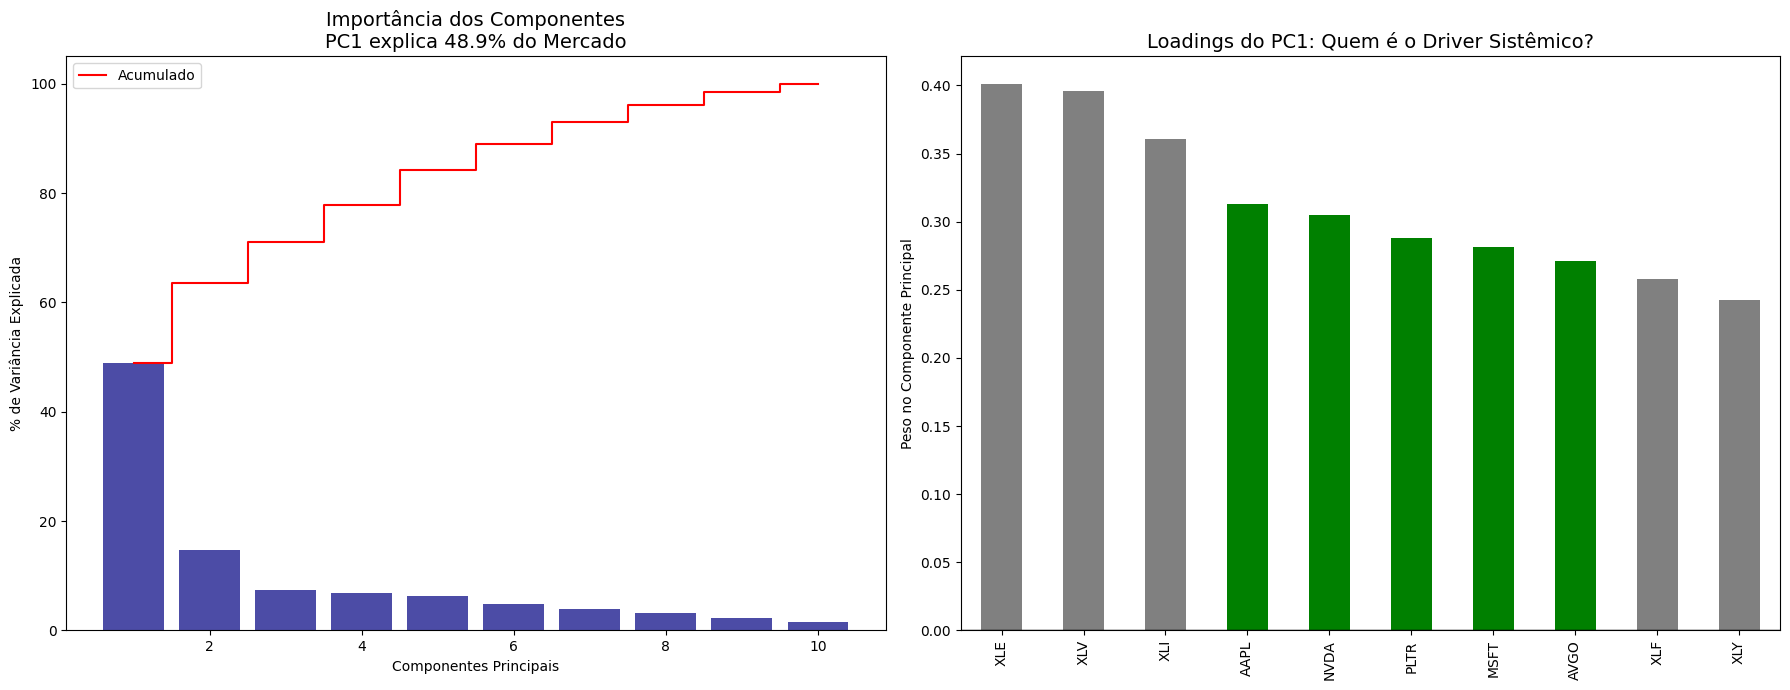


--- Resultado do PCA ---
O PC1 explica 48.89% de todo o movimento do grupo testado.
O ativo com maior dominância é: XLE com 0.4013


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- 1. Setup e Ingestão ---
ia_stocks = ["NVDA", "MSFT", "AAPL", "PLTR", "AVGO"]
setores = ["XLF", "XLI", "XLE", "XLY", "XLV"]
todos_tickers = ia_stocks + setores

print("Coletando dados para decomposição de fatores (PCA)...")
df = yf.download(todos_tickers, period="2y", auto_adjust=True, progress=False)['Close']
returns = df.pct_change().dropna()

# --- 2. Pré-processamento (Obrigatório para PCA) ---
# Padronizamos para média 0 e variância 1 para que o preço da ação não distorça o peso
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(returns)

# --- 3. Execução do PCA ---
pca = PCA()
pca.fit(scaled_returns)

# Variância Explicada
variancia_explicada = pca.explained_variance_ratio_
pc1_var = variancia_explicada[0] * 100

# Loadings do PC1 (O peso de cada ativo no fator principal)
loadings = pd.DataFrame(
    pca.components_[0], 
    index=todos_tickers, 
    columns=['Peso_no_PC1']
).sort_values(by='Peso_no_PC1', ascending=False)

# --- 4. Visualização ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico 1: Scree Plot (Onde está o risco?)
ax1.bar(range(1, len(variancia_explicada)+1), variancia_explicada * 100, color='navy', alpha=0.7)
ax1.step(range(1, len(variancia_explicada)+1), np.cumsum(variancia_explicada) * 100, where='mid', color='red', label='Acumulado')
ax1.set_title(f"Importância dos Componentes\nPC1 explica {pc1_var:.1f}% do Mercado", fontsize=14)
ax1.set_xlabel("Componentes Principais")
ax1.set_ylabel("% de Variância Explicada")
ax1.legend()

# Gráfico 2: Loadings do PC1 (Quem manda no fator?)
colors = ['green' if t in ia_stocks else 'gray' for t in loadings.index]
loadings['Peso_no_PC1'].plot(kind='bar', ax=ax2, color=colors)
ax2.set_title("Loadings do PC1: Quem é o Driver Sistêmico?", fontsize=14)
ax2.set_ylabel("Peso no Componente Principal")
ax2.axhline(0, color='black', linewidth=1)

plt.tight_layout()
plt.show()

print(f"\n--- Resultado do PCA ---")
print(f"O PC1 explica {pc1_var:.2f}% de todo o movimento do grupo testado.")
print(f"O ativo com maior dominância é: {loadings.index[0]} com {loadings.iloc[0,0]:.4f}")

#A análise de PCA revela que o risco sistêmico atual (PC1) é capturado prioritariamente pelo setor de Energia (XLE). Isso corrobora a tese de que a expansão da infraestrutura de IA atingiu um nível de maturidade onde a restrição física (energia) se tornou o principal fator de covariância do mercado. A NVIDIA e a Palantir são os motores da demanda, mas a Energia é o eixo sobre o qual o risco sistêmico gira